In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (8,6)

In [2]:
quality_df = pd.read_csv("train.csv")
quality_test = pd.read_csv("test.csv")
submission = pd.read_csv("samplesubmission.csv")

## Exploratotry Data Analysis (EDA)

In [107]:
# Linearity: The relationship between X and the mean of Y is linear.
# Homoscedasticity: The variance of residual is the same for any value of X.
# Independence: Observations are independent of each other.
# Normality: For any fixed value of X, Y is normally distributed.

In [3]:
quality_df.head()

ID        date    device  site_latitude  site_longitude  \
0  ID_JBYXJEUZ8X  2020-03-18  ANQ16PZJ       0.353465       32.560322   
1  ID_PEJJNLBUPR  2019-10-13  AB6051M4       0.390741       32.582257   
2  ID_21L8UZQO1T  2019-12-21  A0WN66FH       0.285751       32.578325   
3  ID_GNW2G8J4T8  2020-02-20     aq_41      -1.244985       29.989236   
4  ID_4XOX2V6SK0  2019-04-17     aq_41      -1.244985       29.989236   

   humidity  temp_mean  SulphurDioxide_SO2_column_number_density  \
0  0.846844  22.038542                                 -0.000138   
1  0.874493  21.545833                                       NaN   
2  0.729340  23.568655                                       NaN   
3  0.919271  16.338542                                 -0.000111   
4  0.858365  16.602083                                 -0.000127   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      1.042629   
1                                           NaN   
2                                           NaN   
3                                      0.750228   
4                                      0.792634   

   SulphurDioxide_SO2_slant_column_number_density  ...  \
0                                       -0.000143  ...   
1                                             NaN  ...   
2                                             NaN  ...   
3                                       -0.000083  ...   
4                                       -0.000101  ...   

   Cloud_cloud_top_height  Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
0             4181.792969               69589.453125              3181.793457   
1                     NaN                        NaN                      NaN   
2             4440.391113               67341.109375              3440.390869   
3                     NaN                        NaN                      NaN   
4             4842.057488               64347.788635              3842.057585   

   Cloud_cloud_optical_depth  Cloud_surface_albedo  \
0                   7.799846              0.278111   
1                        NaN                   NaN   
2                  62.496590              0.416631   
3                        NaN                   NaN   
4                   4.971117              0.277157   

   Cloud_sensor_azimuth_angle  Cloud_sensor_zenith_angle  \
0                   76.618553                   9.970293   
1                         NaN                        NaN   
2                  -97.300758                  63.690605   
3                         NaN                        NaN   
4                   74.786025                  32.583070   

   Cloud_solar_azimuth_angle  Cloud_solar_zenith_angle      pm2_5  
0                 -93.110069                 19.214193  63.853333  
1                        NaN                       NaN  32.507083  
2                -127.856804                 40.857922  80.290833  
3                        NaN                       NaN  42.601687  
4                 -57.273638                 21.864529  89.642229  

[5 rows x 71 columns]

In [4]:
quality_df.shape

(9923, 71)

In [ ]:
quality

In [21]:
quality_df.columns[quality_df.isna().any()].tolist()

['temp_mean',
 'SulphurDioxide_SO2_column_number_density',
 'SulphurDioxide_SO2_column_number_density_amf',
 'SulphurDioxide_SO2_slant_column_number_density',
 'SulphurDioxide_cloud_fraction',
 'SulphurDioxide_sensor_azimuth_angle',
 'SulphurDioxide_sensor_zenith_angle',
 'SulphurDioxide_solar_azimuth_angle',
 'SulphurDioxide_solar_zenith_angle',
 'SulphurDioxide_SO2_column_number_density_15km',
 'CarbonMonoxide_CO_column_number_density',
 'CarbonMonoxide_H2O_column_number_density',
 'CarbonMonoxide_cloud_height',
 'CarbonMonoxide_sensor_altitude',
 'CarbonMonoxide_sensor_azimuth_angle',
 'CarbonMonoxide_sensor_zenith_angle',
 'CarbonMonoxide_solar_azimuth_angle',
 'CarbonMonoxide_solar_zenith_angle',
 'NitrogenDioxide_NO2_column_number_density',
 'NitrogenDioxide_tropospheric_NO2_column_number_density',
 'NitrogenDioxide_stratospheric_NO2_column_number_density',
 'NitrogenDioxide_NO2_slant_column_number_density',
 'NitrogenDioxide_tropopause_pressure',
 'NitrogenDioxide_absorbing_aero

In [22]:
quality_df.columns

Index(['ID', 'date', 'device', 'site_latitude', 'site_longitude', 'humidity',
       'temp_mean', 'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       

<AxesSubplot:xlabel='date'>

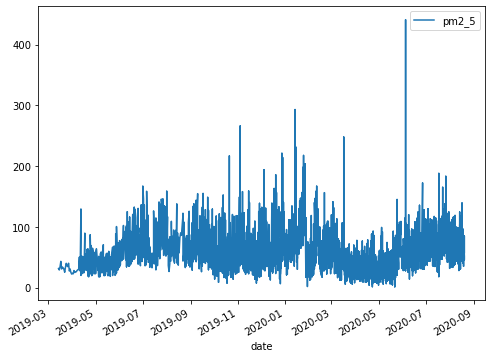

In [706]:
quality_df[['date','pm2_5']].set_index('date').plot()

No trend or seasonality to quality of air

In [206]:
quality_df['date'] = pd.to_datetime(quality_df['date'])

In [705]:
quality_df

ID       date    device  site_latitude  site_longitude  \
0     ID_JBYXJEUZ8X 2020-03-18  ANQ16PZJ       0.353465       32.560322   
1     ID_PEJJNLBUPR 2019-10-13  AB6051M4       0.390741       32.582257   
2     ID_21L8UZQO1T 2019-12-21  A0WN66FH       0.285751       32.578325   
3     ID_GNW2G8J4T8 2020-02-20     aq_41      -1.244985       29.989236   
4     ID_4XOX2V6SK0 2019-04-17     aq_41      -1.244985       29.989236   
...             ...        ...       ...            ...             ...   
9918  ID_E2O117AYG3 2020-07-20  APZ80RTM       0.306666       32.608550   
9919  ID_8CJG37XAYN 2020-02-23     aq_60       0.307780       32.651449   
9920  ID_NTRI2J528O 2020-04-17  AJCK5L86       0.343898       32.587226   
9921  ID_IBH41YUMOZ 2020-06-08     aq_76       0.357987       32.584100   
9922  ID_44EJBIBS7D 2019-10-30     aq_46       0.298750       32.615000   

      humidity  temp_mean  SulphurDioxide_SO2_column_number_density  \
0     0.846844  22.038542                                 -0.000138   
1     0.874493  21.545833                                       NaN   
2     0.729340  23.568655                                       NaN   
3     0.919271  16.338542                                 -0.000111   
4     0.858365  16.602083                                 -0.000127   
...        ...        ...                                       ...   
9918  0.736872  22.965972                                       NaN   
9919  0.721721  26.555392                                 -0.000684   
9920  0.810413  22.915625                                       NaN   
9921  0.876437  21.258333                                       NaN   
9922  0.868209  22.238333                                       NaN   

      SulphurDioxide_SO2_column_number_density_amf  \
0                                         1.042629   
1                                              NaN   
2                                              NaN   
3                                         0.750228   
4                                         0.792634   
...                                            ...   
9918                                           NaN   
9919                                      0.414260   
9920                                           NaN   
9921                                           NaN   
9922                                           NaN   

      SulphurDioxide_SO2_slant_column_number_density  ...  \
0                                          -0.000143  ...   
1                                                NaN  ...   
2                                                NaN  ...   
3                                          -0.000083  ...   
4                                          -0.000101  ...   
...                                              ...  ...   
9918                                             NaN  ...   
9919                                       -0.000283  ...   
9920                                             NaN  ...   
9921                                             NaN  ...   
9922                                             NaN  ...   

      Cloud_cloud_top_height  Cloud_cloud_base_pressure  \
0                4181.792969               69589.453125   
1                        NaN                        NaN   
2                4440.391113               67341.109375   
3                        NaN                        NaN   
4                4842.057488               64347.788635   
...                      ...                        ...   
9918             7156.016834               48356.941077   
9919            13266.058594               20344.134766   
9920             7754.737305               44284.785156   
9921             6357.190430               53044.425781   
9922             5046.156250               62448.808594   

      Cloud_cloud_base_height  Cloud_cloud_optical_depth  \
0                 3181.793457                   7.799846   
1                         NaN                       

In [713]:
quality_df.set_index('date',inplace=True)

In [207]:
quality_tmonth = quality_df.set_index('date').resample('M').sum()

In [7]:
quality_day = quality_df.set_index('date').resample('D').sum()

<AxesSubplot:xlabel='date'>

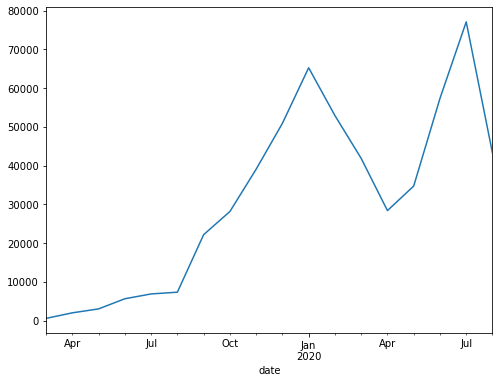

In [731]:
quality_time.pm2_5.plot() 

In [733]:
quality_df.reset_index('date',inplace=True)

In [208]:
quality_test['date'] = pd.to_datetime(quality_test['date'])

In [209]:
quality_df['day'] = quality_df['date'].dt.day
quality_df['month'] = quality_df['date'].dt.month
quality_df['year'] = quality_df['date'].dt.year

quality_test['day'] = quality_test['date'].dt.day
quality_test['month'] = quality_test['date'].dt.month
# quality_test['year'] = quality_test['date'].dt.year

In [201]:
quality_df.drop(columns='year',inplace=True)

<AxesSubplot:xlabel='date'>

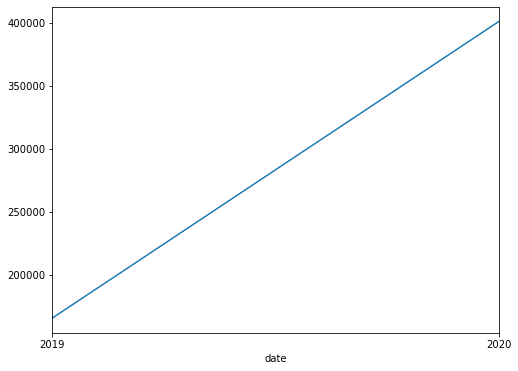

In [752]:
quality_year = quality_df.set_index('date').resample('Y').sum()
quality_year.pm2_5.plot()

<AxesSubplot:ylabel='Frequency'>

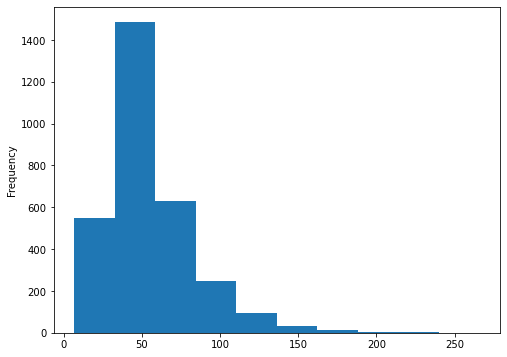

In [756]:
quality_df[quality_df['year']==2019]['pm2_5'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

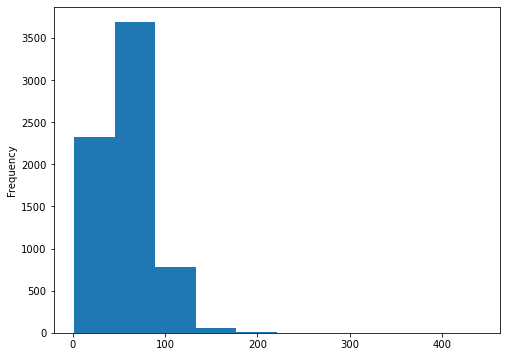

In [757]:
quality_df[quality_df['year']==2020]['pm2_5'].plot(kind='hist')

In [28]:
quality_df.device.value_counts()

aq_30       464
aq_41       453
aq_45       372
aq_43       359
aq_46       352
aq_49       351
APYZC5J7    329
AR2RHV97    329
AKSLS0FP    328
AJCK5L86    328
AB6051M4    328
ANQ16PZJ    328
AY2J2Q7Z    328
A0WN66FH    328
APZ80RTM    328
AW66FF7V    328
A95X5F9T    328
aq_29       314
aq_52       295
aq_54       284
aq_35       281
aq_36       279
aq_61       268
aq_59       261
aq_31       254
aq_47       244
aq_70       239
aq_60       235
aq_56       221
aq_74       204
aq_79       181
aq_57       161
aq_64       127
aq_76       114
Name: device, dtype: int64

<AxesSubplot:>

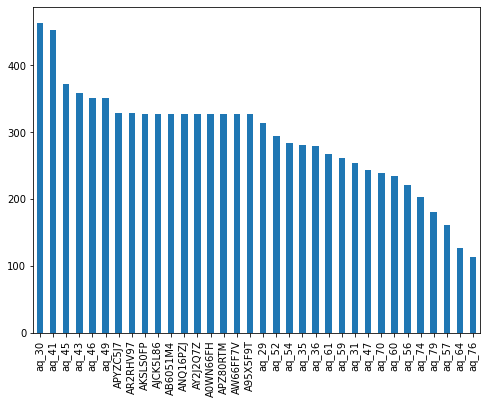

In [27]:
quality_df.device.value_counts().plot(kind='bar')

In [ ]:
#how does device affect air quality

#Question : for each device what's the quality distribution

<AxesSubplot:>

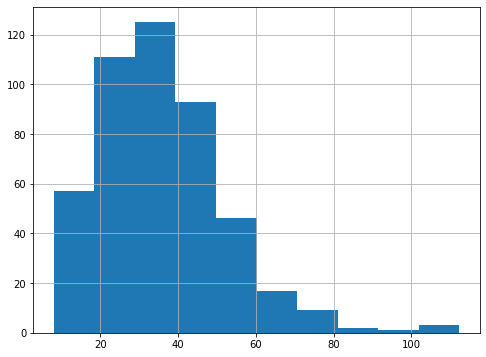

In [29]:
quality_group = quality_df.groupby('device')

quality_group.get_group('aq_30')['pm2_5'].hist()

this sensor data of air quality revolves around a mean of 35

In [35]:
quality_group.get_group('aq_41')[['site_latitude', 'site_longitude']].mean()

site_latitude     -1.244985
site_longitude    29.989236
dtype: float64

In [41]:
quality_group.mean()[['site_latitude', 'site_longitude']]

site_latitude  site_longitude
device                                 
A0WN66FH       0.285751       32.578325
A95X5F9T       0.315446       32.586709
AB6051M4       0.390741       32.582257
AJCK5L86       0.343898       32.587226
AKSLS0FP       0.265007       32.625599
ANQ16PZJ       0.353465       32.560322
APYZC5J7       0.319970       32.595548
APZ80RTM       0.306666       32.608550
AR2RHV97       0.343729       32.551314
AW66FF7V       0.379562       32.553714
AY2J2Q7Z       0.307584       32.567078
aq_29          0.307500       32.620600
aq_30          0.059604       32.460320
aq_31          0.347014       32.649360
aq_35          0.360752       32.752570
aq_36          0.354825       32.677810
aq_41         -1.244985       29.989236
aq_43          0.289040       32.589580
aq_45          0.344000       32.553000
aq_46          0.298750       32.615000
aq_47          0.351700       32.591000
aq_49          0.283680       32.600480
aq_52          0.218200       32.617600
aq_54          0.356400       32.573000
aq_56          0.310100       32.516000
aq_57          0.354700       32.502600
aq_59          0.381576       32.647109
aq_60          0.307780       32.651449
aq_61          0.373078       32.628226
aq_64          0.391478       32.625830
aq_70          0.286595       32.506107
aq_74          0.307489       32.611755
aq_76          0.357987       32.584100
aq_79          0.360209       32.610756

In [42]:
quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9923 entries, 0 to 9922
Data columns (total 71 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID                                                        9923 non-null   object 
 1   date                                                      9923 non-null   object 
 2   device                                                    9923 non-null   object 
 3   site_latitude                                             9923 non-null   float64
 4   site_longitude                                            9923 non-null   float64
 5   humidity                                                  9923 non-null   float64
 6   temp_mean                                                 9903 non-null   float64
 7   SulphurDioxide_SO2_column_number_density                  4291 non-null   float64
 8   SulphurDioxide_SO2

<AxesSubplot:>

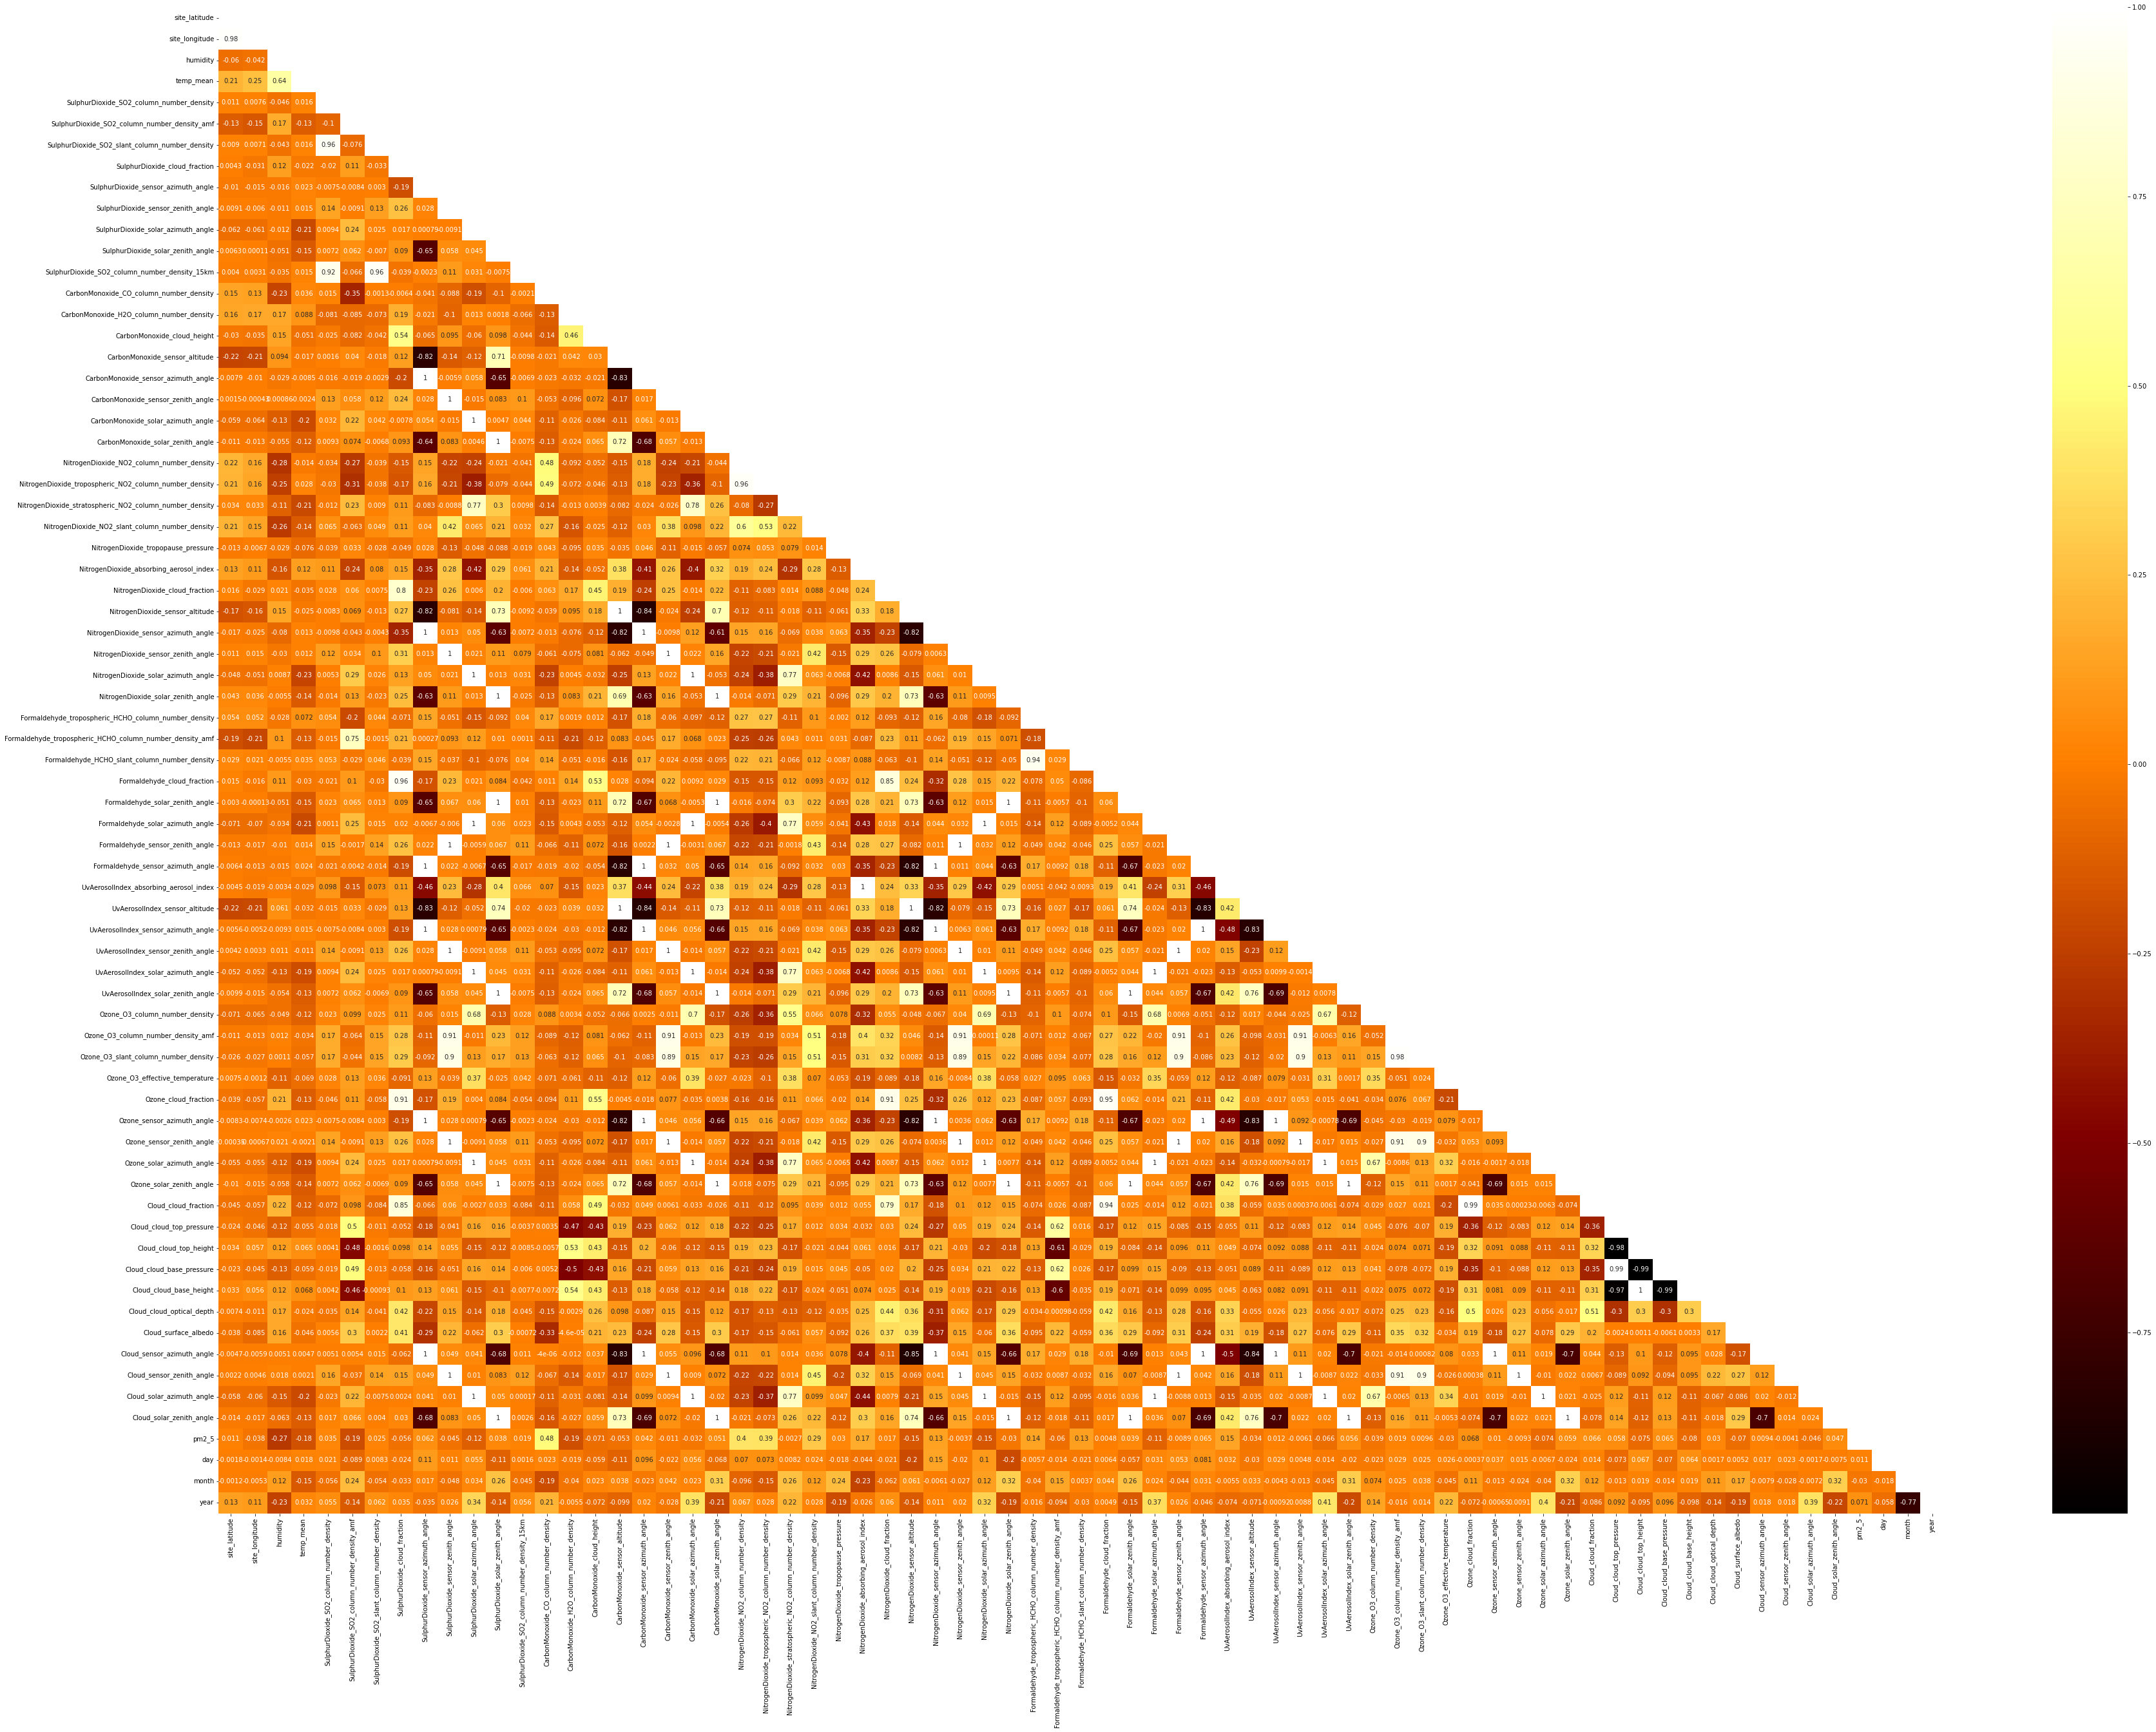

In [741]:
plt.figure(figsize=(60,43))
mask = np.zeros_like(quality_df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(quality_df.corr(),annot=True,cmap=plt.cm.afmhot,mask=mask)

A lot of correlated values in there, we'll deal with them later

## Feature Engineering

In [250]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(quality_random.drop(columns=['ID','date','pm2_5']),quality_random['pm2_5'],test_size=0.2,random_state=0)

In [251]:
X_train

device  site_latitude  humidity  temp_mean  \
8770  AKSLS0FP       0.265007  0.865153  22.319792   
2315     aq_52       0.218200  0.936022  21.232971   
9457  APZ80RTM       0.306666  0.769906  22.312153   
7561     aq_59       0.381576  0.865396  23.302431   
1127     aq_30       0.059604  0.839070  21.251389   
...        ...            ...       ...        ...   
9225  AB6051M4       0.390741  0.828069  23.482292   
4859     aq_54       0.356400  0.618586  20.662468   
3264     aq_46       0.298750  0.786738  23.855159   
9845     aq_76       0.357987  0.716659  23.425000   
2732     aq_54       0.356400  0.908521  21.121528   

      SulphurDioxide_SO2_column_number_density  \
8770                                 -0.000186   
2315                                 -0.000373   
9457                                  0.000208   
7561                                  0.000640   
1127                                 -0.000168   
...                                        ...   
9225                                  0.000164   
4859                                 -0.000102   
3264                                 -0.000060   
9845                                 -0.000088   
2732                                 -0.000122   

      SulphurDioxide_SO2_column_number_density_amf  \
8770                                      0.654397   
2315                                      0.941603   
9457                                      0.821581   
7561                                      0.915730   
1127                                      0.603508   
...                                            ...   
9225                                      0.708224   
4859                                      0.816873   
3264                                      0.687493   
9845                                      0.692089   
2732                                      0.491367   

      SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
8770                       0.165057                                 -1.0   
2315                       0.052523                                  1.0   
9457                       0.131386                                 -1.0   
7561                       0.248049                                 -1.0   
1127                       0.242647                                  1.0   
...                             ...                                  ...   
9225                       0.078954                                 -1.0   
4859                       0.181755                                 -1.0   
3264                       0.249697                                 -1.0   
9845                       0.228364                                 -1.0   
2732                       0.279265                                 -1.0   

      SulphurDioxide_sensor_zenith_angle  SulphurDioxide_solar_azimuth_angle  \
8770                           37.599557                         -123.063684   
2315                           50.516903                          -30.598022   
9457                           26.927464                          -48.830185   
7561                           64.089508                          -66.555481   
1127                           62.364143                         -147.214279   
...                                  ...                                 ...   
9225                           38.508659                          -51.251522   
4859                           58.838600                         -129.657327   
3264                            2.435565                         -127.517225   
9845                           36.992992                          -52.291325   
2732                           63.687691                         -109.542725   

      ...  Ozone_O3_effective_temperature  Cloud_cloud_top_pressure  \
8770  ...                      223.092373              73587.969854   
2315  ...                      227.266525              39906.425781   
9457  ...             

In [235]:
X_train.device.unique()

array(['AKSLS0FP', 'aq_52', 'APZ80RTM', 'aq_59', 'aq_30', 'aq_41',
       'aq_56', 'A95X5F9T', 'aq_29', 'aq_49', 'A0WN66FH', 'aq_43',
       'aq_61', 'aq_36', 'AY2J2Q7Z', 'AJCK5L86', 'aq_46', 'APYZC5J7',
       'aq_76', 'aq_54', 'aq_79', 'aq_47', 'AR2RHV97', 'AB6051M4',
       'AW66FF7V', 'aq_70', 'ANQ16PZJ', 'aq_74', 'aq_45', 'aq_35',
       'aq_57', 'aq_31', 'aq_64', 'aq_60'], dtype=object)

In [234]:
quality_test.device.unique()

36

In [239]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()
hot = OneHotEncoder()

onehot_train = one_hot.fit_transform(np.array(X_train.device).reshape(-1,1))
onehot_test = one_hot.transform(np.array(X_test.device).reshape(-1,1))
onehot_quality = hot.fit_transform(np.array(quality_test.device).reshape(-1,1))

In [226]:
one_hot.get_feature_names(['device'])

array(['device_A0WN66FH', 'device_A95X5F9T', 'device_AB6051M4',
       'device_AJCK5L86', 'device_AKSLS0FP', 'device_ANQ16PZJ',
       'device_APYZC5J7', 'device_APZ80RTM', 'device_AR2RHV97',
       'device_AW66FF7V', 'device_AY2J2Q7Z', 'device_aq_29',
       'device_aq_30', 'device_aq_31', 'device_aq_35', 'device_aq_36',
       'device_aq_41', 'device_aq_43', 'device_aq_45', 'device_aq_46',
       'device_aq_47', 'device_aq_49', 'device_aq_52', 'device_aq_54',
       'device_aq_56', 'device_aq_57', 'device_aq_59', 'device_aq_60',
       'device_aq_61', 'device_aq_64', 'device_aq_70', 'device_aq_74',
       'device_aq_76', 'device_aq_79'], dtype=object)

In [241]:
df = pd.DataFrame(onehot_train.toarray(),columns=one_hot.get_feature_names(['device']))
df_t = pd.DataFrame(onehot_test.toarray(),columns=one_hot.get_feature_names(['device']))
qual = pd.DataFrame(onehot_quality.toarray(),columns=hot.get_feature_names(['device']))

In [256]:
X= pd.concat([X_train,df],axis=1)
X_t = pd.concat([X_test,df_t],axis=1)
#quality_test = pd.concat([quality_test,qual],axis=1)

In [259]:
quality_test

ID       date    device  site_latitude  site_longitude  \
0     ID_UOH62J0XHX 2020-10-02     aq_43       0.289040       32.589580   
1     ID_4OPWSB0UHJ 2020-12-07     aq_54       0.356400       32.573000   
2     ID_3SLMNNG1Z3 2020-11-16     aq_59       0.381576       32.647109   
3     ID_MFUHTXYPM4 2020-09-05  AW66FF7V       0.379562       32.553714   
4     ID_TY1DAND8ZP 2020-12-15     aq_45       0.344000       32.553000   
...             ...        ...       ...            ...             ...   
4249  ID_NYKGOYFBKZ 2020-08-25     aq_76       0.357987       32.584100   
4250  ID_IWO4EVLHSQ 2020-08-21  AB6051M4       0.390741       32.582257   
4251  ID_G1M1IMY9WU 2020-11-07  AB6051M4       0.390741       32.582257   
4252  ID_DXV65Q1QXI 2020-09-10     aq_61       0.373078       32.628226   
4253  ID_RY4ONQKO9E 2020-10-03     aq_30       0.059604       32.460320   

      humidity  temp_mean  SulphurDioxide_SO2_column_number_density  \
0     0.756840  23.849653                                  0.000124   
1     0.810854  22.075347                                       NaN   
2     0.883253  20.050694                                       NaN   
3     0.782583  22.248958                                  0.000176   
4     0.770116  22.565217                                       NaN   
...        ...        ...                                       ...   
4249  0.786575  23.790833                                       NaN   
4250  0.828441  21.801389                                       NaN   
4251  0.859490  21.851042                                       NaN   
4252  0.833803  21.948864                                       NaN   
4253  0.783191  22.004514                                  0.000073   

      SulphurDioxide_SO2_column_number_density_amf  \
0                                         0.839054   
1                                              NaN   
2                                              NaN   
3                                         0.730853   
4                                              NaN   
...                                            ...   
4249                                           NaN   
4250                                           NaN   
4251                                           NaN   
4252                                           NaN   
4253                                      0.745486   

      SulphurDioxide_SO2_slant_column_number_density  ...  device_aq_59  \
0                                           0.000104  ...           0.0   
1                                                NaN  ...           0.0   
2                                                NaN  ...           1.0   
3                                           0.000129  ...           0.0   
4                                                NaN  ...           0.0   
...                                              ...  ...           ...   
4249                                             NaN  ...           0.0   
4250                                             NaN  ...           0.0   
4251                                             NaN  ...           0.0   
4252                                             NaN  ...           0.0   
4253                                        0.000054  ...           0.0   

      device_aq_60  device_aq_61  device_aq_64  device_aq_70  device_aq_74  \
0              0.0           0.0           0.0           0.0           0.0   
1              0.0           0.0           0.0           0.0           0.0   
2              0.0           0.0           0.0           0.0           0.0   
3              0.0           0.0           0.0           0.0           0.0   
4              0.0           0.0           0.0           0.0           0.0   
...            ...           ...           ...           ...           ...   
4249           0.0           0.0           0.0           0.0           0.0   
4250           0.0           0.0           0.0           0.0           0.0   
4251       

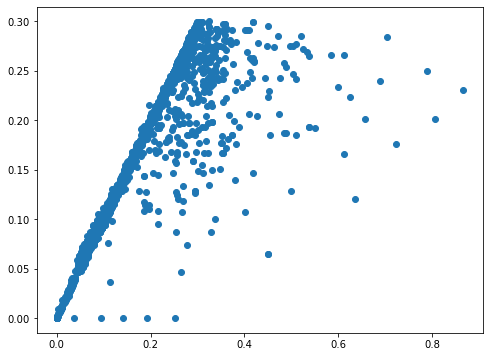

In [42]:
plt.scatter(quality_df['Ozone_cloud_fraction'],quality_df['SulphurDioxide_cloud_fraction'])

In [30]:
def correlated_features(data,threshold):
    corr_features = set()
    corr_matrix = quality_df.corr()
    for col in range(len(corr_matrix)):
        for cols in range(col):
            if abs(corr_matrix.iloc[col,cols])>threshold:
                colname = corr_matrix.columns[col]
                corr_features.add(colname)
    return corr_features

In [43]:
corr_features = list(correlated_features(quality_df,0.9))
corr_features

['NitrogenDioxide_tropospheric_NO2_column_number_density',
 'Formaldehyde_solar_azimuth_angle',
 'Cloud_solar_azimuth_angle',
 'Ozone_solar_azimuth_angle',
 'Formaldehyde_solar_zenith_angle',
 'Ozone_O3_column_number_density_amf',
 'Ozone_sensor_zenith_angle',
 'NitrogenDioxide_sensor_azimuth_angle',
 'UvAerosolIndex_solar_zenith_angle',
 'Formaldehyde_sensor_azimuth_angle',
 'Ozone_sensor_azimuth_angle',
 'Ozone_solar_zenith_angle',
 'Cloud_sensor_zenith_angle',
 'UvAerosolIndex_sensor_azimuth_angle',
 'Formaldehyde_sensor_zenith_angle',
 'SulphurDioxide_SO2_column_number_density_15km',
 'site_longitude',
 'CarbonMonoxide_solar_zenith_angle',
 'CarbonMonoxide_sensor_zenith_angle',
 'UvAerosolIndex_absorbing_aerosol_index',
 'Cloud_solar_zenith_angle',
 'CarbonMonoxide_sensor_azimuth_angle',
 'SulphurDioxide_SO2_slant_column_number_density',
 'Formaldehyde_HCHO_slant_column_number_density',
 'Formaldehyde_cloud_fraction',
 'Ozone_cloud_fraction',
 'Cloud_cloud_base_pressure',
 'UvAeros

In [44]:
len(corr_features)

40

In [45]:
quality_df.drop(columns=corr_features,inplace=True)

In [46]:
quality_test.drop(columns=corr_features,inplace=True)

<AxesSubplot:>

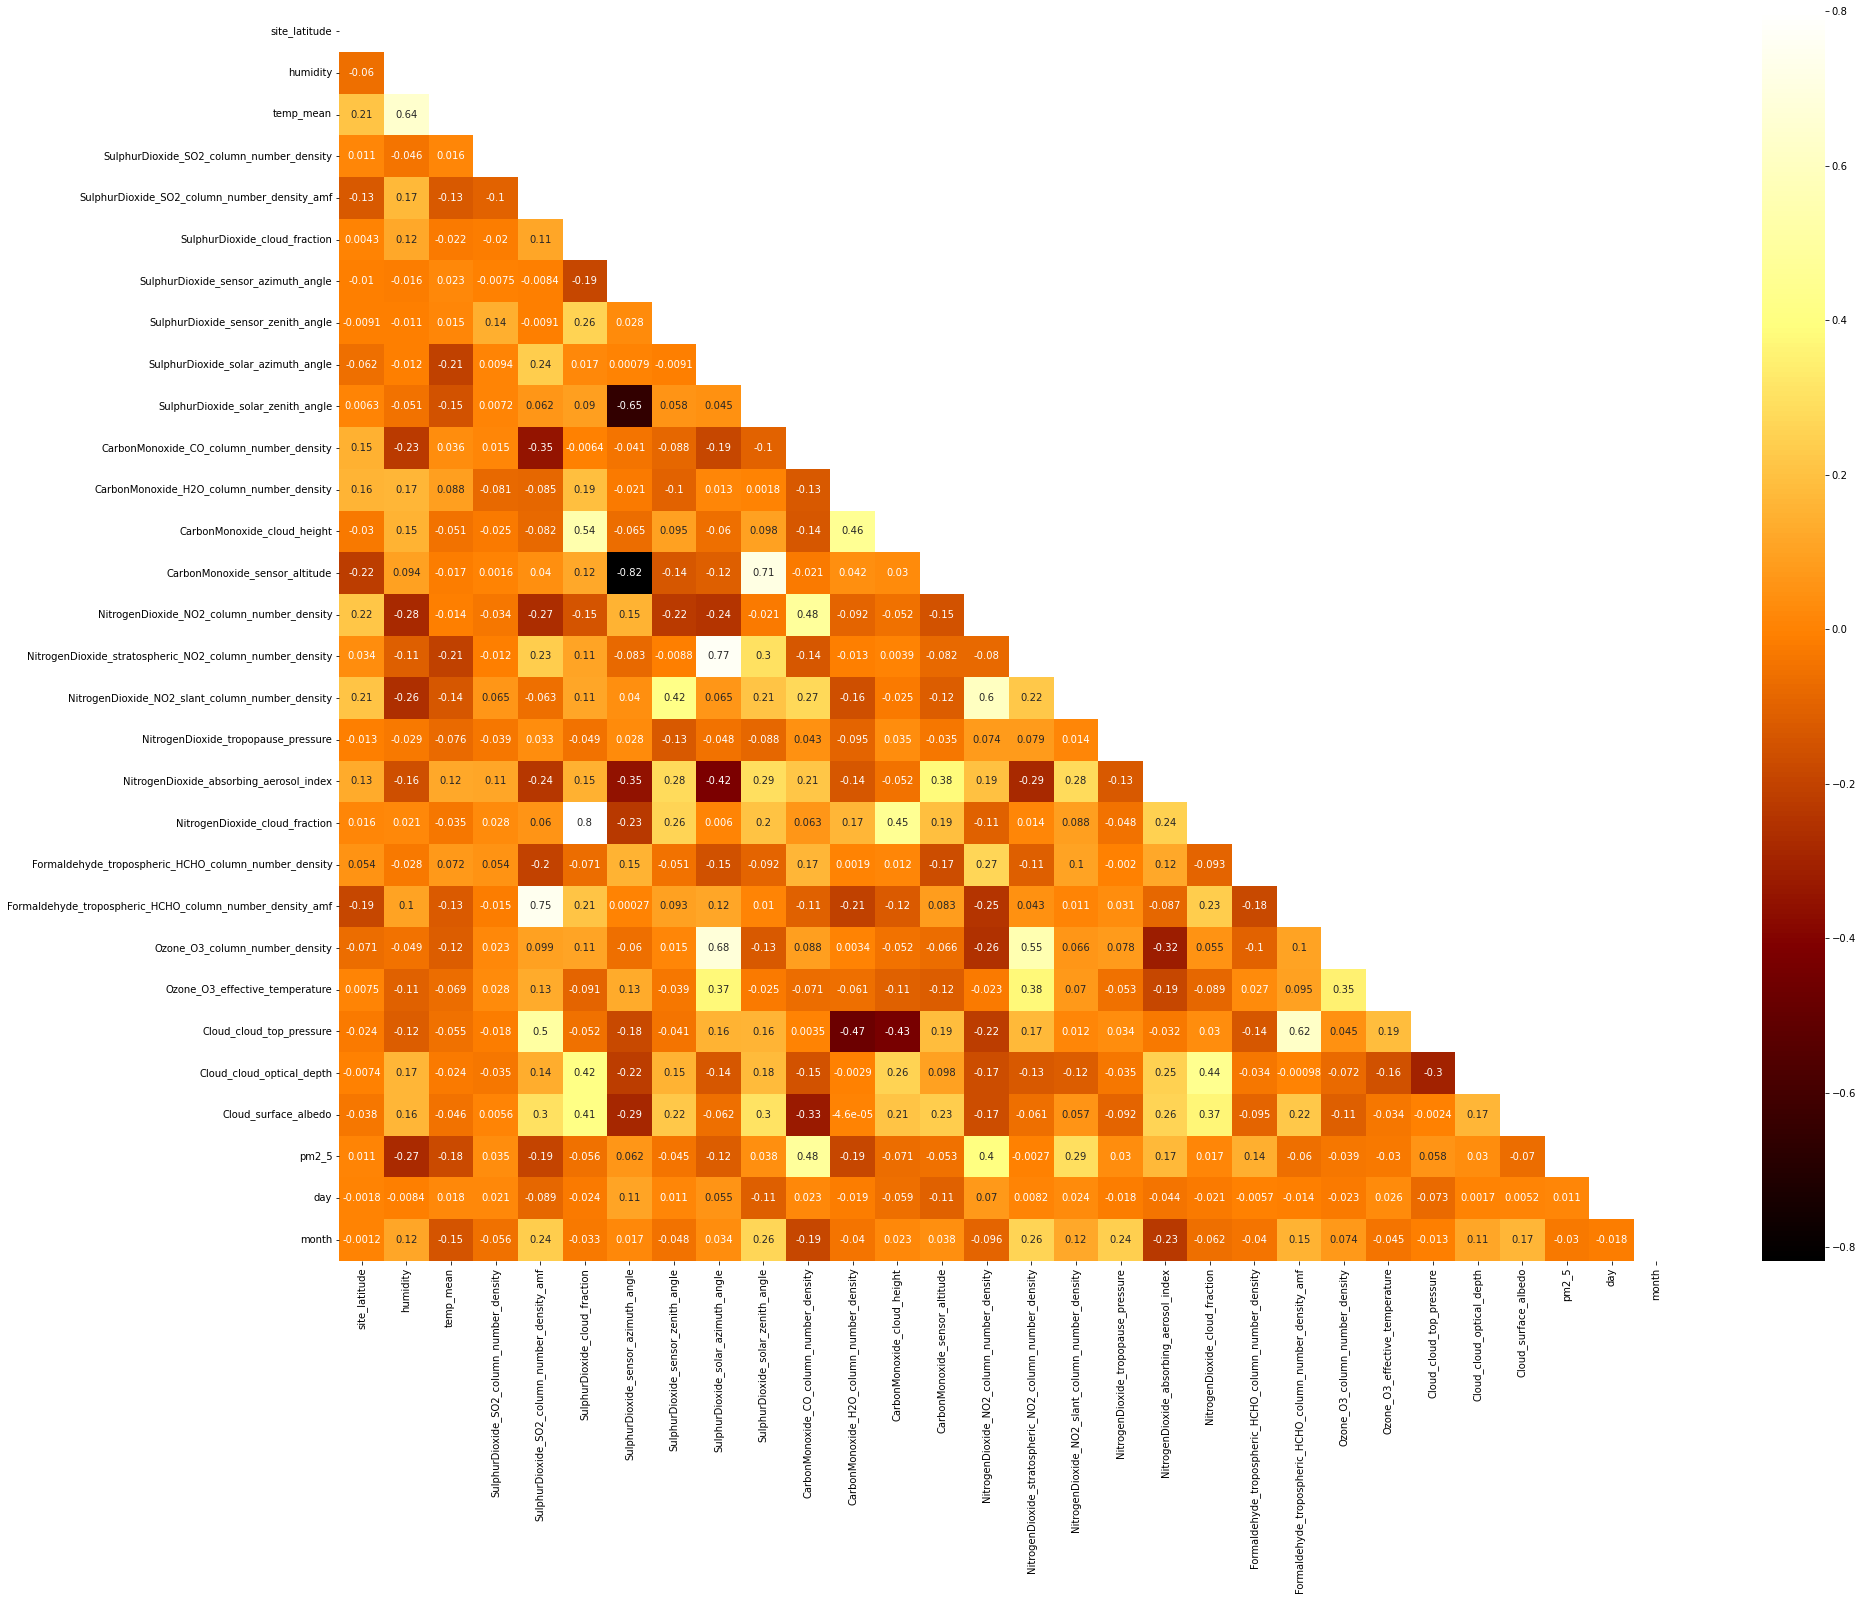

In [47]:
plt.figure(figsize=(30,23))
mask = np.zeros_like(quality_df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(quality_df.corr(),annot=True,cmap=plt.cm.afmhot,mask=mask)

In [89]:
quality_df

ID        date    device  site_latitude  humidity  temp_mean  \
0     ID_JBYXJEUZ8X  2020-03-18  ANQ16PZJ       0.353465  0.846844  22.038542   
1     ID_PEJJNLBUPR  2019-10-13  AB6051M4       0.390741  0.874493  21.545833   
2     ID_21L8UZQO1T  2019-12-21  A0WN66FH       0.285751  0.729340  23.568655   
3     ID_GNW2G8J4T8  2020-02-20     aq_41      -1.244985  0.919271  16.338542   
4     ID_4XOX2V6SK0  2019-04-17     aq_41      -1.244985  0.858365  16.602083   
...             ...         ...       ...            ...       ...        ...   
9918  ID_E2O117AYG3  2020-07-20  APZ80RTM       0.306666  0.736872  22.965972   
9919  ID_8CJG37XAYN  2020-02-23     aq_60       0.307780  0.721721  26.555392   
9920  ID_NTRI2J528O  2020-04-17  AJCK5L86       0.343898  0.810413  22.915625   
9921  ID_IBH41YUMOZ  2020-06-08     aq_76       0.357987  0.876437  21.258333   
9922  ID_44EJBIBS7D  2019-10-30     aq_46       0.298750  0.868209  22.238333   

      SulphurDioxide_SO2_column_number_density  \
0                                    -0.000138   
1                                          NaN   
2                                          NaN   
3                                    -0.000111   
4                                    -0.000127   
...                                        ...   
9918                                       NaN   
9919                                 -0.000684   
9920                                       NaN   
9921                                       NaN   
9922                                       NaN   

      SulphurDioxide_SO2_column_number_density_amf  \
0                                         1.042629   
1                                              NaN   
2                                              NaN   
3                                         0.750228   
4                                         0.792634   
...                                            ...   
9918                                           NaN   
9919                                      0.414260   
9920                                           NaN   
9921                                           NaN   
9922                                           NaN   

      SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  ...  \
0                          0.291358                            76.594910  ...   
1                               NaN                                  NaN  ...   
2                               NaN                                  NaN  ...   
3                          0.000000                            75.789885  ...   
4                          0.087338                            74.787279  ...   
...                             ...                                  ...  ...   
9918                            NaN                                  NaN  ...   
9919                       0.249911                           -97.272911  ...   
9920                            NaN                                  NaN  ...   
9921                            NaN                                  NaN  ...   
9922                            NaN                                  NaN  ...   

      NitrogenDioxide_NO2_column_number_density  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                      0.000038   
4                                      0.000032   
...                                         ...   
9918                                        NaN   
9919                                        NaN   
9920                                        NaN   
9921                                        NaN   
9922                                        NaN   

      NitrogenDioxide_NO2_slant_column_number_density  \
0                                                 NaN   
1                                                 NaN   
2                                    

In [762]:
quality_df.columns[quality_df.isna().any()]

Index(['temp_mean', 'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_stratospheric_NO2_column_number_density',
       'NitrogenDioxide_NO2_slant_column_number_density',
       'NitrogenDioxide_tropopause_pressure',
       'NitrogenDioxide_absorbing_aerosol_index',
       'Formaldehyde_tropospheric_HCHO_column_number_density',
       'Formaldehyde_tropospheric_HCHO_column_number_density_amf',
       'Ozone_O3_column_number_density', 'Ozone_O3_effective_temperature',
       'Cloud_cloud_top_pressure', 'Cloud_cloud_opti

<AxesSubplot:>

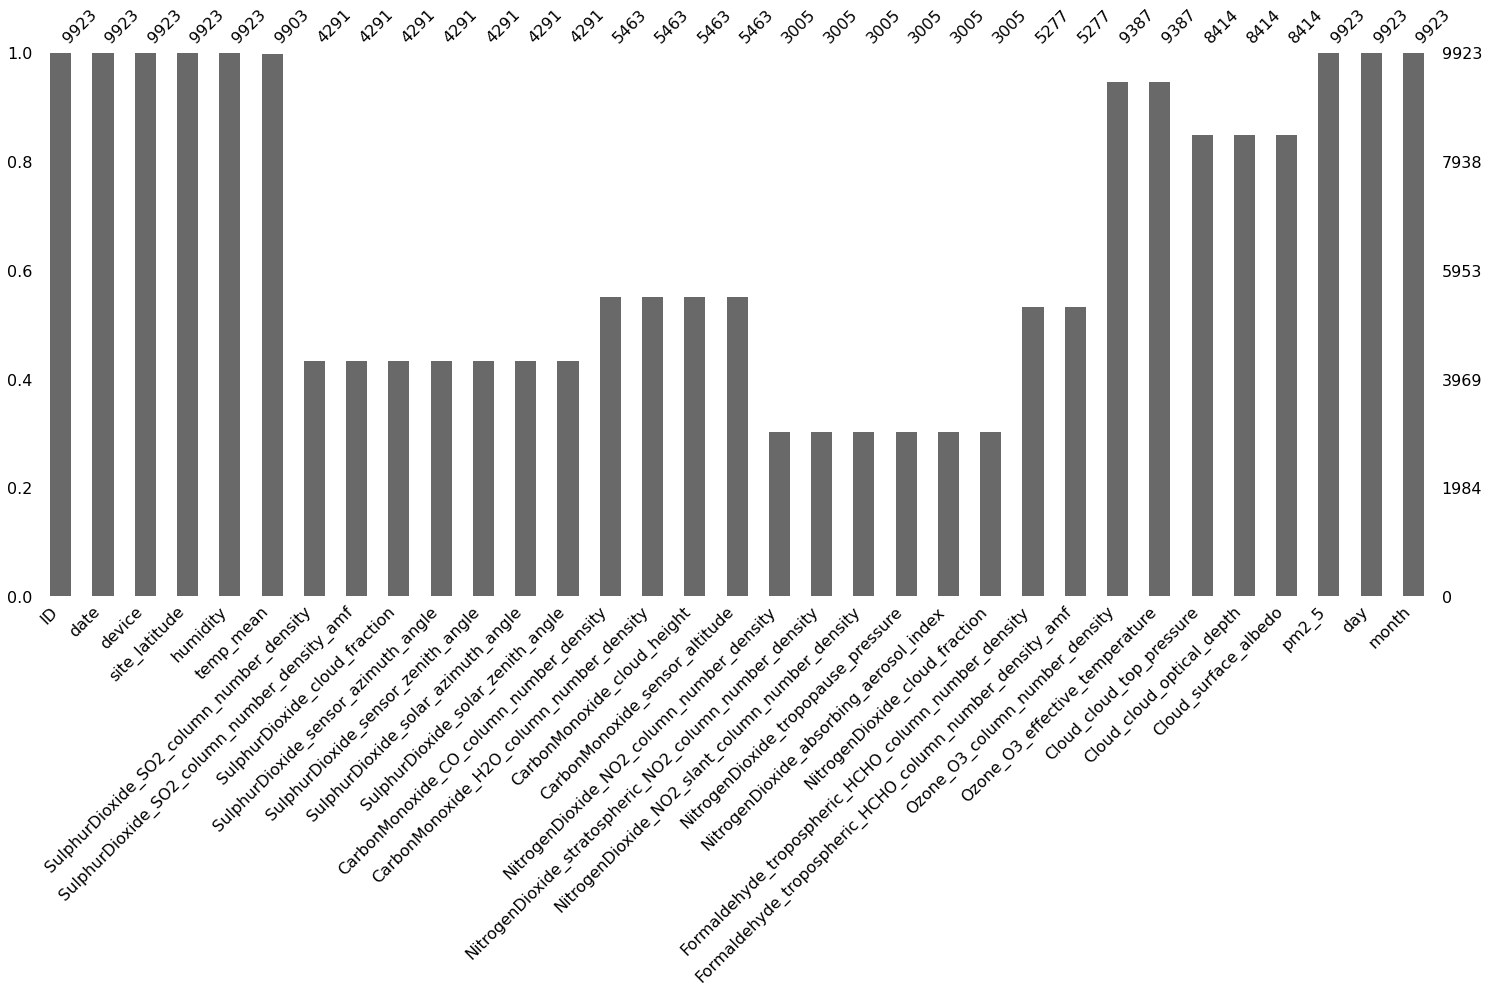

In [48]:
import missingno as msno
msno.bar(quality_df)

In [94]:
quality_df.isna().sum()

ID                                                         0
date                                                       0
device                                                     0
site_latitude                                              0
humidity                                                   0
temp_mean                                                 20
SulphurDioxide_SO2_column_number_density                5632
SulphurDioxide_SO2_column_number_density_amf            5632
SulphurDioxide_cloud_fraction                           5632
SulphurDioxide_sensor_azimuth_angle                     5632
SulphurDioxide_sensor_zenith_angle                      5632
SulphurDioxide_solar_azimuth_angle                      5632
CarbonMonoxide_CO_column_number_density                 4460
CarbonMonoxide_H2O_column_number_density                4460
CarbonMonoxide_cloud_height                             4460
NitrogenDioxide_NO2_column_number_density               6918
NitrogenDioxide_NO2_slan

<AxesSubplot:>

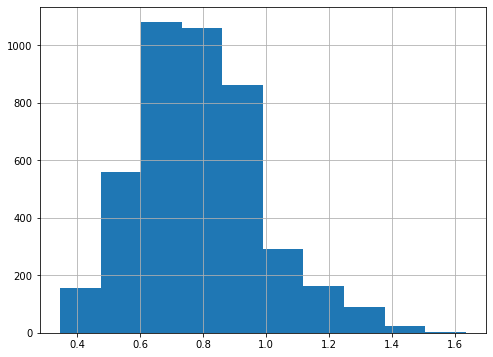

In [137]:
#MAR, MNAR, MCAR 

quality_df['SulphurDioxide_SO2_column_number_density_amf'].hist()

In [109]:
quality_df['Cloud_surface_albedo'].isna().sum()

1509

In [130]:
quality_df.loc[quality_df['temp_mean'].isna(),'temp_mean'] = sample

In [145]:
quality_df.loc[quality_df['Ozone_O3_effective_temperature'].isna(),'Ozone_O3_effective_temperature'] = sample_ozone

In [768]:
quality_df

date             ID    device  site_latitude  humidity  temp_mean  \
0    2020-03-18  ID_JBYXJEUZ8X  ANQ16PZJ       0.353465  0.846844  22.038542   
1    2019-10-13  ID_PEJJNLBUPR  AB6051M4       0.390741  0.874493  21.545833   
2    2019-12-21  ID_21L8UZQO1T  A0WN66FH       0.285751  0.729340  23.568655   
3    2020-02-20  ID_GNW2G8J4T8     aq_41      -1.244985  0.919271  16.338542   
4    2019-04-17  ID_4XOX2V6SK0     aq_41      -1.244985  0.858365  16.602083   
...         ...            ...       ...            ...       ...        ...   
9918 2020-07-20  ID_E2O117AYG3  APZ80RTM       0.306666  0.736872  22.965972   
9919 2020-02-23  ID_8CJG37XAYN     aq_60       0.307780  0.721721  26.555392   
9920 2020-04-17  ID_NTRI2J528O  AJCK5L86       0.343898  0.810413  22.915625   
9921 2020-06-08  ID_IBH41YUMOZ     aq_76       0.357987  0.876437  21.258333   
9922 2019-10-30  ID_44EJBIBS7D     aq_46       0.298750  0.868209  22.238333   

      SulphurDioxide_SO2_column_number_density  \
0                                    -0.000138   
1                                          NaN   
2                                          NaN   
3                                    -0.000111   
4                                    -0.000127   
...                                        ...   
9918                                       NaN   
9919                                 -0.000684   
9920                                       NaN   
9921                                       NaN   
9922                                       NaN   

      SulphurDioxide_SO2_column_number_density_amf  \
0                                         1.042629   
1                                              NaN   
2                                              NaN   
3                                         0.750228   
4                                         0.792634   
...                                            ...   
9918                                           NaN   
9919                                      0.414260   
9920                                           NaN   
9921                                           NaN   
9922                                           NaN   

      SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  ...  \
0                          0.291358                            76.594910  ...   
1                               NaN                                  NaN  ...   
2                               NaN                                  NaN  ...   
3                          0.000000                            75.789885  ...   
4                          0.087338                            74.787279  ...   
...                             ...                                  ...  ...   
9918                            NaN                                  NaN  ...   
9919                       0.249911                           -97.272911  ...   
9920                            NaN                                  NaN  ...   
9921                            NaN                                  NaN  ...   
9922                            NaN                                  NaN  ...   

      Formaldehyde_tropospheric_HCHO_column_number_density  \
0                                              0.000121      
1                                                   NaN      
2                                                   NaN      
3                                              0.000047      
4                                              0.000039      
...                                                 ...      
9918                                                NaN      
9919                                           0.000194      
9920                                           0.000128      
9921                                                NaN      
9922                                                NaN      

      Formaldehyde_tropospheric_HCHO_column_number_density_amf  \
0               

In [49]:
missing_cols = quality_df.columns[quality_df.isna().any()].tolist()
missingtest_cols = quality_test.columns[quality_test.isna().any()].tolist()

In [148]:
quality_df[['SulphurDioxide_SO2_column_number_density','SulphurDioxide_SO2_column_number_density_amf']]

SulphurDioxide_SO2_column_number_density  \
0                                    -0.000138   
1                                          NaN   
2                                          NaN   
3                                    -0.000111   
4                                    -0.000127   
...                                        ...   
9918                                       NaN   
9919                                 -0.000684   
9920                                       NaN   
9921                                       NaN   
9922                                       NaN   

      SulphurDioxide_SO2_column_number_density_amf  
0                                         1.042629  
1                                              NaN  
2                                              NaN  
3                                         0.750228  
4                                         0.792634  
...                                            ...  
9918                                           NaN  
9919                                      0.414260  
9920                                           NaN  
9921                                           NaN  
9922                                           NaN  

[9923 rows x 2 columns]

In [149]:
quality_df

ID        date    device  site_latitude  humidity  temp_mean  \
0     ID_JBYXJEUZ8X  2020-03-18  ANQ16PZJ       0.353465  0.846844  22.038542   
1     ID_PEJJNLBUPR  2019-10-13  AB6051M4       0.390741  0.874493  21.545833   
2     ID_21L8UZQO1T  2019-12-21  A0WN66FH       0.285751  0.729340  23.568655   
3     ID_GNW2G8J4T8  2020-02-20     aq_41      -1.244985  0.919271  16.338542   
4     ID_4XOX2V6SK0  2019-04-17     aq_41      -1.244985  0.858365  16.602083   
...             ...         ...       ...            ...       ...        ...   
9918  ID_E2O117AYG3  2020-07-20  APZ80RTM       0.306666  0.736872  22.965972   
9919  ID_8CJG37XAYN  2020-02-23     aq_60       0.307780  0.721721  26.555392   
9920  ID_NTRI2J528O  2020-04-17  AJCK5L86       0.343898  0.810413  22.915625   
9921  ID_IBH41YUMOZ  2020-06-08     aq_76       0.357987  0.876437  21.258333   
9922  ID_44EJBIBS7D  2019-10-30     aq_46       0.298750  0.868209  22.238333   

      SulphurDioxide_SO2_column_number_density  \
0                                    -0.000138   
1                                          NaN   
2                                          NaN   
3                                    -0.000111   
4                                    -0.000127   
...                                        ...   
9918                                       NaN   
9919                                 -0.000684   
9920                                       NaN   
9921                                       NaN   
9922                                       NaN   

      SulphurDioxide_SO2_column_number_density_amf  \
0                                         1.042629   
1                                              NaN   
2                                              NaN   
3                                         0.750228   
4                                         0.792634   
...                                            ...   
9918                                           NaN   
9919                                      0.414260   
9920                                           NaN   
9921                                           NaN   
9922                                           NaN   

      SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  ...  \
0                          0.291358                            76.594910  ...   
1                               NaN                                  NaN  ...   
2                               NaN                                  NaN  ...   
3                          0.000000                            75.789885  ...   
4                          0.087338                            74.787279  ...   
...                             ...                                  ...  ...   
9918                            NaN                                  NaN  ...   
9919                       0.249911                           -97.272911  ...   
9920                            NaN                                  NaN  ...   
9921                            NaN                                  NaN  ...   
9922                            NaN                                  NaN  ...   

      NitrogenDioxide_NO2_column_number_density  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                      0.000038   
4                                      0.000032   
...                                         ...   
9918                                        NaN   
9919                                        NaN   
9920                                        NaN   
9921                                        NaN   
9922                                        NaN   

      NitrogenDioxide_NO2_slant_column_number_density  \
0                                                 NaN   
1                                                 NaN   
2                                    

In [770]:
for col in missing_cols:
    print(col)
    print(quality_df[col].min())
    print()

temp_mean
0.0

SulphurDioxide_SO2_column_number_density
-0.0009964540367947

SulphurDioxide_SO2_column_number_density_amf
0.3458935618400954

SulphurDioxide_cloud_fraction
0.0

SulphurDioxide_sensor_azimuth_angle
-105.7135188752411

SulphurDioxide_sensor_zenith_angle
0.1009343490004539

SulphurDioxide_solar_azimuth_angle
-159.89857482910156

SulphurDioxide_solar_zenith_angle
9.75671019583942

CarbonMonoxide_CO_column_number_density
0.0192687828093767

CarbonMonoxide_H2O_column_number_density
790.6172541846687

CarbonMonoxide_cloud_height
-200.15249633789065

NitrogenDioxide_NO2_column_number_density
-1.4839032504769257e-05

NitrogenDioxide_stratospheric_NO2_column_number_density
2.380584350568089e-05

NitrogenDioxide_NO2_slant_column_number_density
4.318994615459815e-05

NitrogenDioxide_tropopause_pressure
7311.868615797176

NitrogenDioxide_absorbing_aerosol_index
-3.368976354598999

Formaldehyde_tropospheric_HCHO_column_number_density
-0.0005954566295258

Formaldehyde_tropospheric_HCH

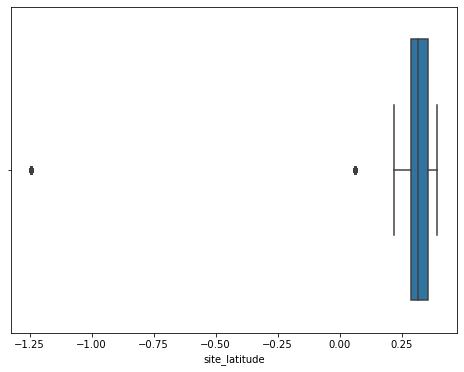

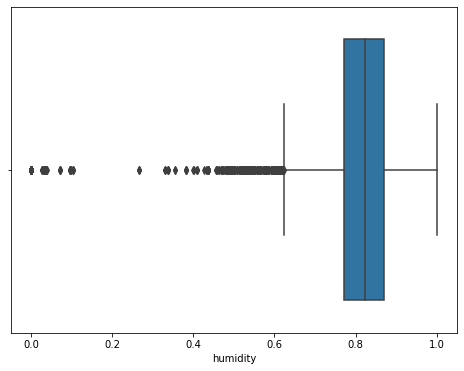

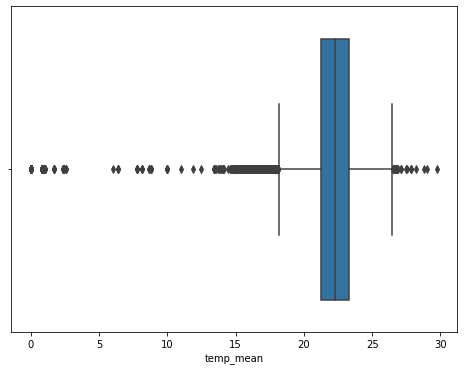

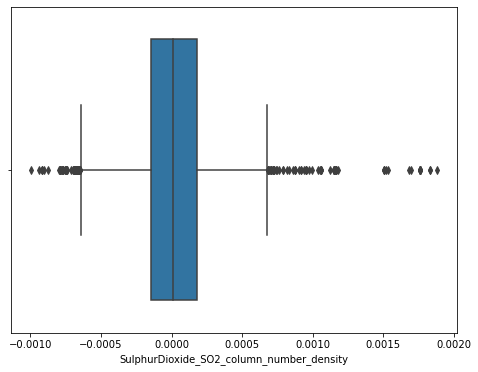

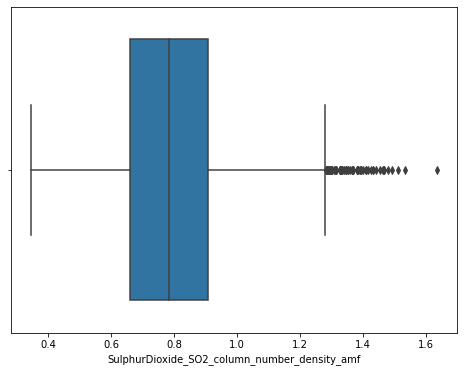

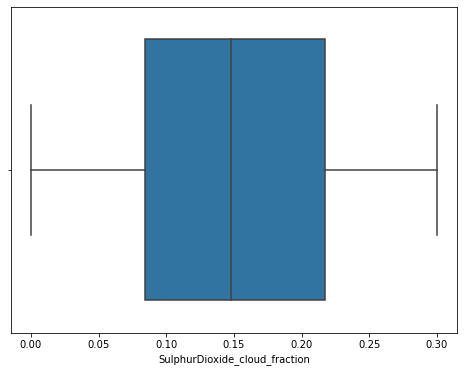

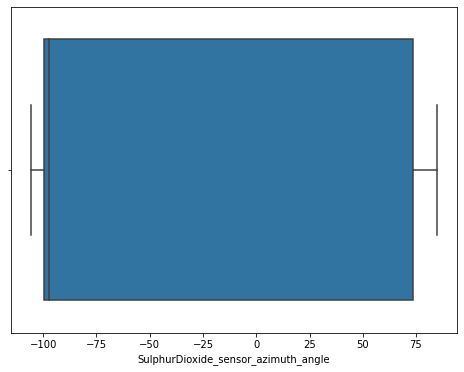

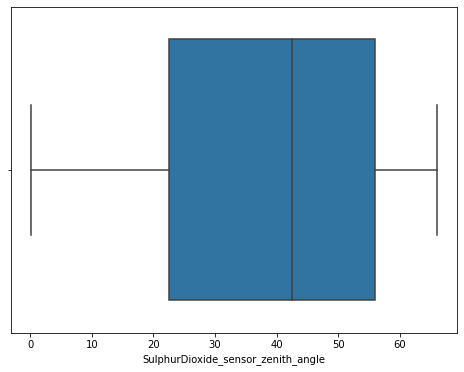

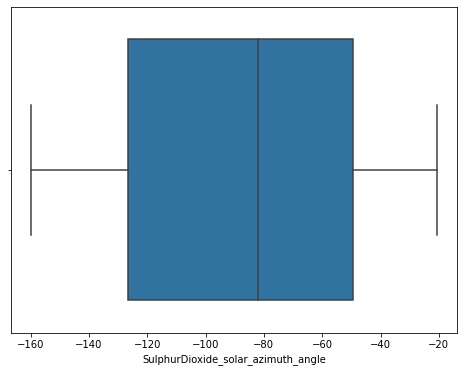

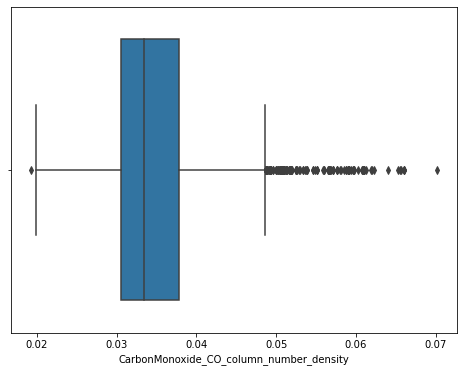

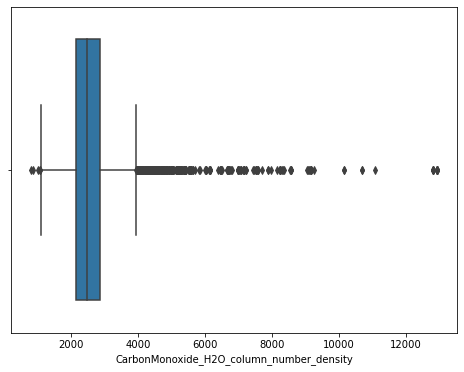

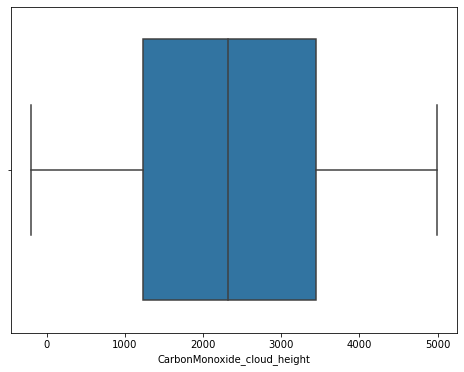

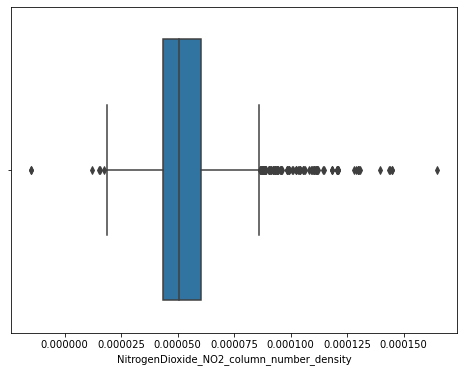

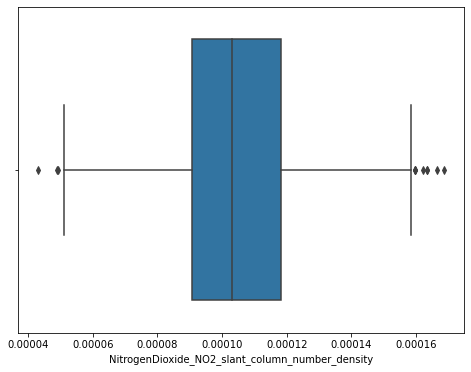

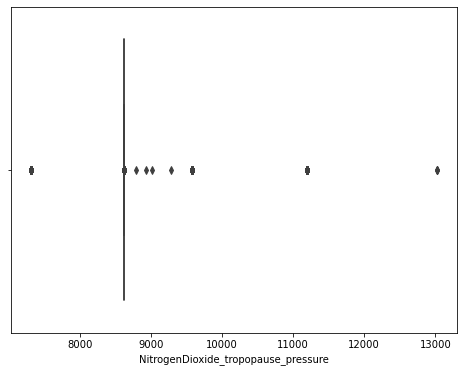

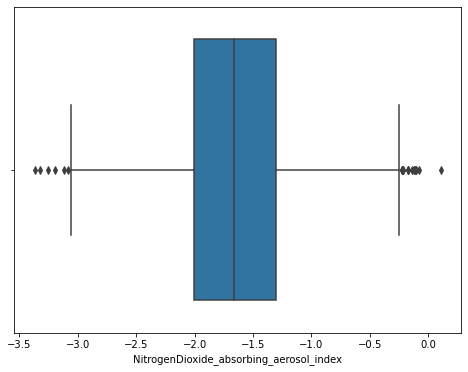

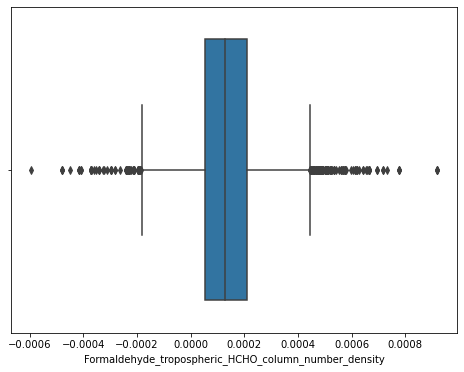

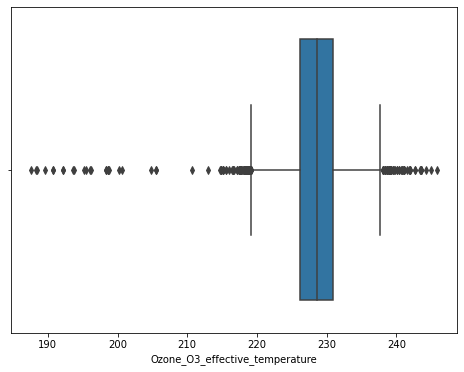

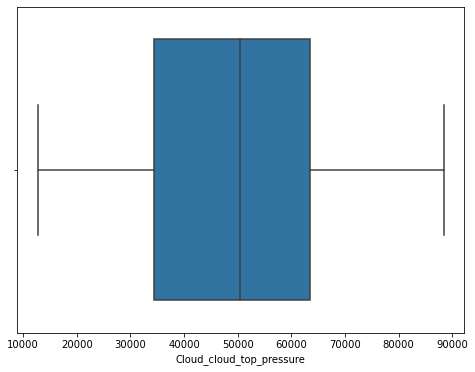

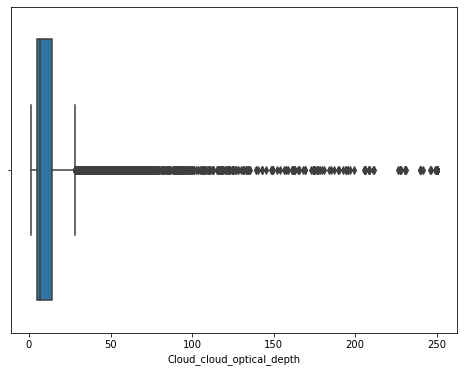

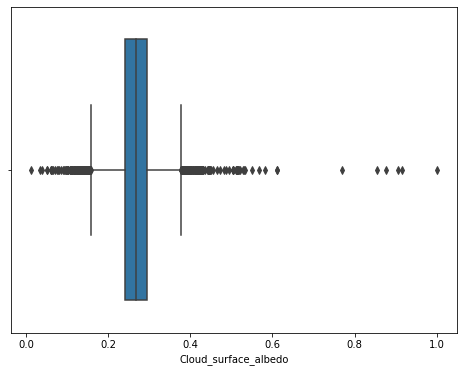

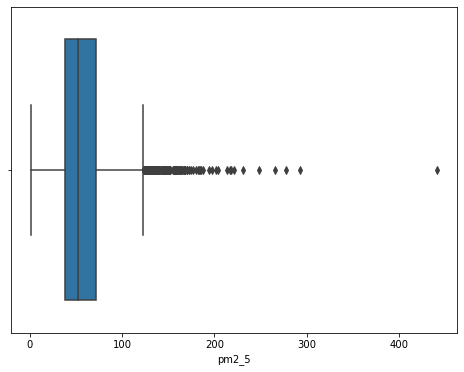

In [150]:
for col in quality_df.drop(columns=['ID','date','device']).columns:
    plt.figure()
    sns.boxplot(col,data=quality_df)

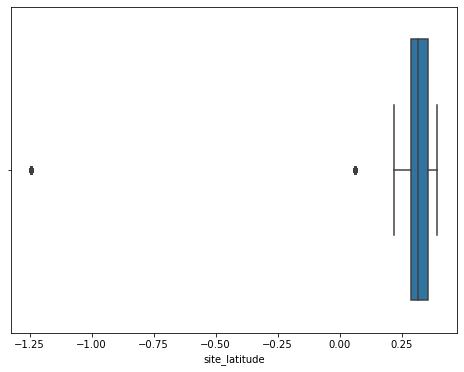

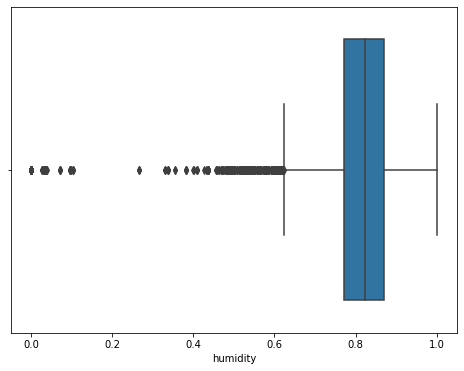

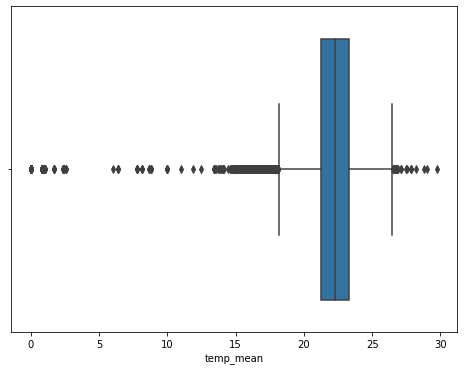

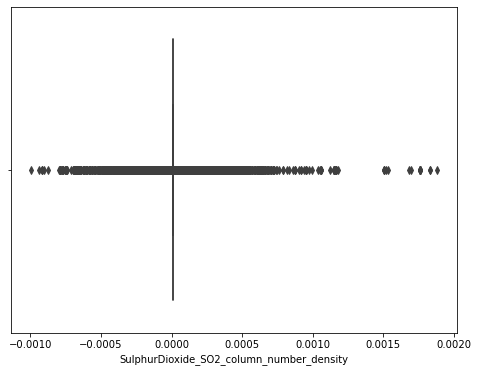

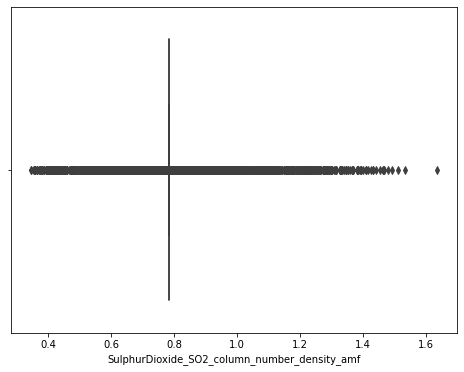

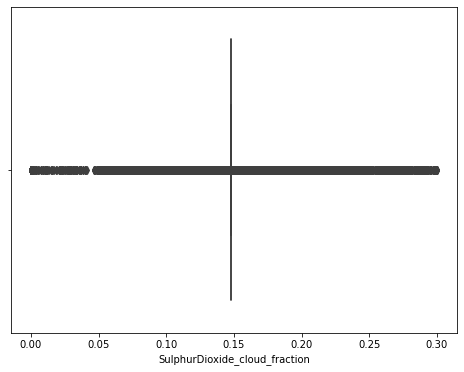

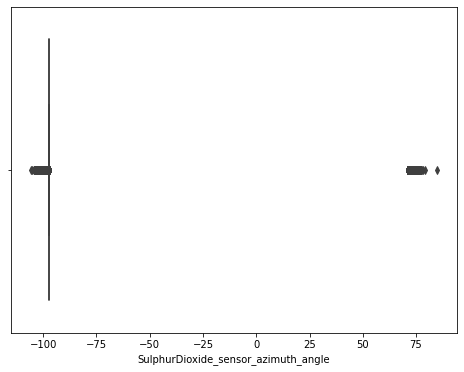

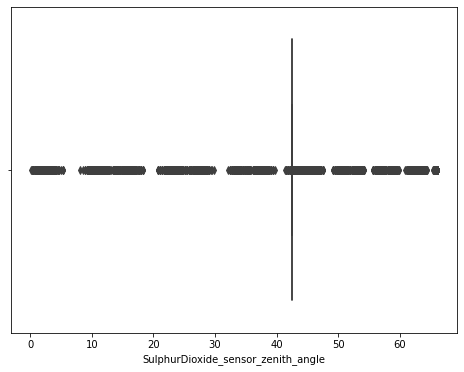

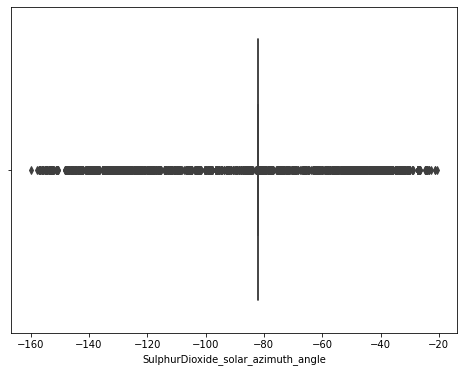

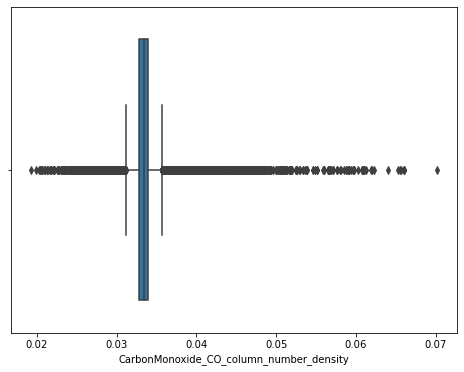

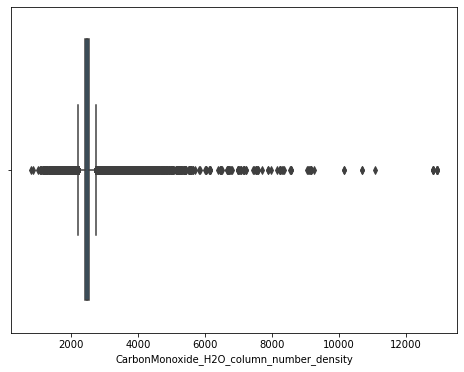

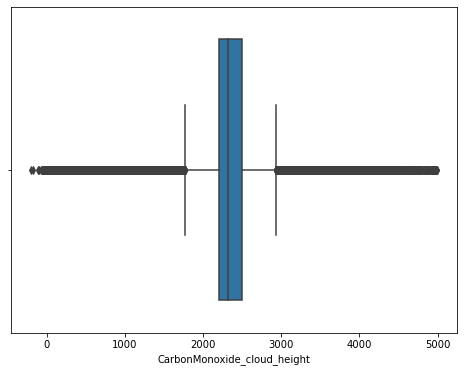

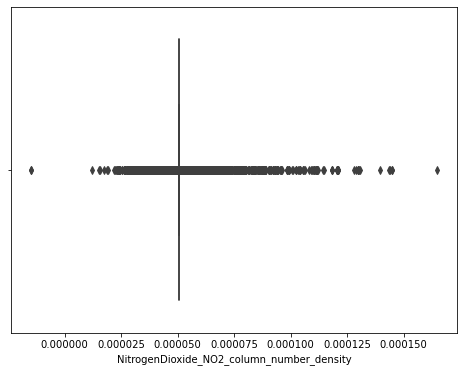

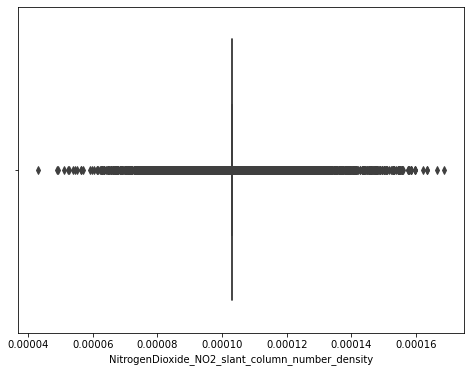

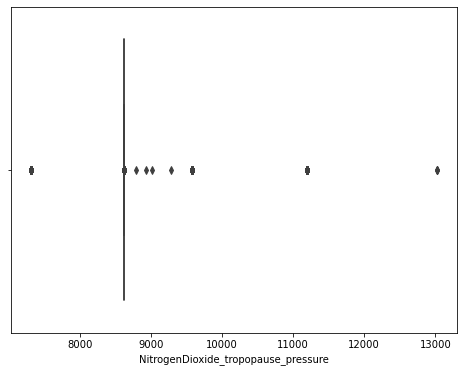

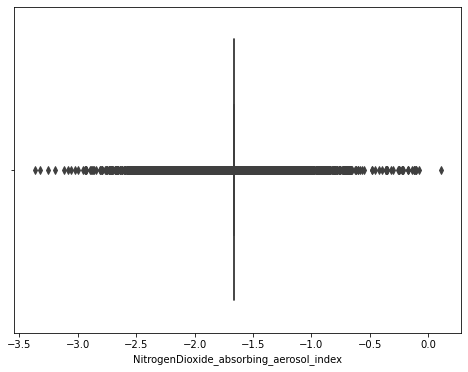

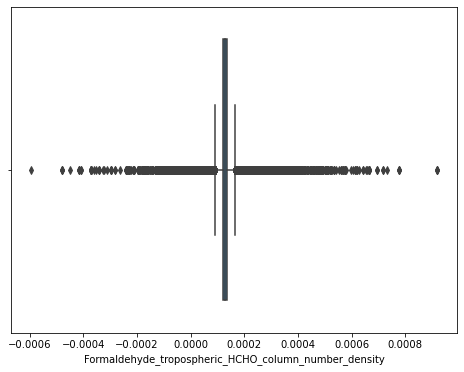

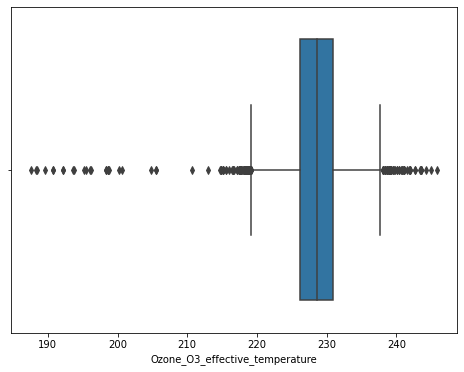

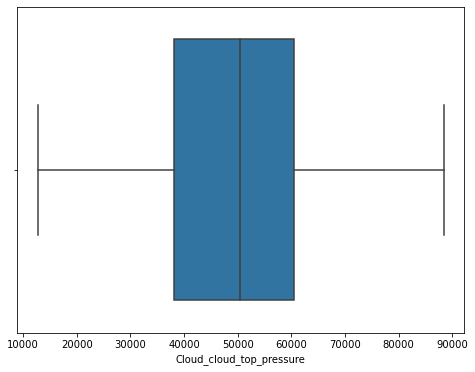

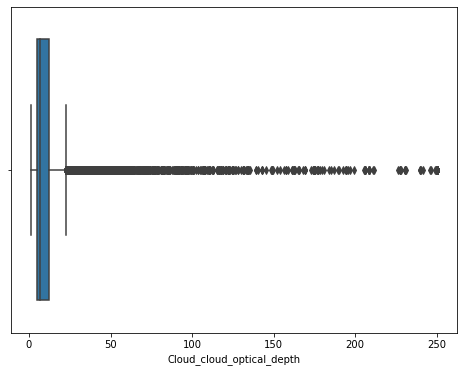

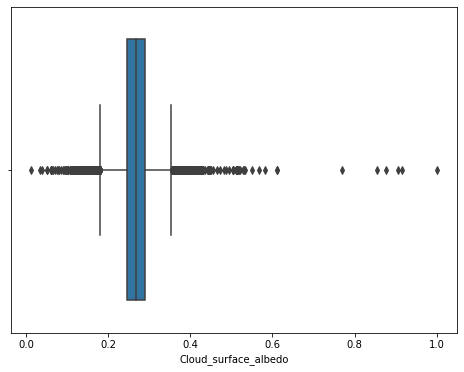

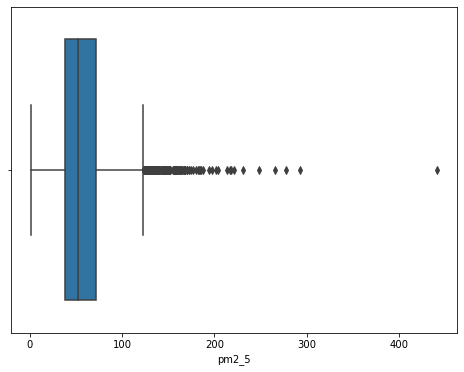

In [200]:
for col in quality_df.drop(columns=['ID','date','device']).columns:
    plt.figure()
    sns.boxplot(col,data=df)

In [197]:
# this isn't used anymore as data becam distorted on application
"""def missing_values(data):
    df = data.copy()
    for col in missing_cols:
        df[col].where(df[col].isnull()==False,df[col].median(),inplace=True,axis=0)
    return df"""

In [54]:
quality_df.where??

In [55]:
quality_df.replace??

In [212]:
missing_cols

['SulphurDioxide_SO2_column_number_density',
 'SulphurDioxide_SO2_column_number_density_amf',
 'SulphurDioxide_cloud_fraction',
 'SulphurDioxide_sensor_azimuth_angle',
 'SulphurDioxide_sensor_zenith_angle',
 'SulphurDioxide_solar_azimuth_angle',
 'CarbonMonoxide_CO_column_number_density',
 'CarbonMonoxide_H2O_column_number_density',
 'CarbonMonoxide_cloud_height',
 'NitrogenDioxide_NO2_column_number_density',
 'NitrogenDioxide_NO2_slant_column_number_density',
 'NitrogenDioxide_tropopause_pressure',
 'NitrogenDioxide_absorbing_aerosol_index',
 'Formaldehyde_tropospheric_HCHO_column_number_density',
 'Cloud_cloud_top_pressure',
 'Cloud_cloud_optical_depth',
 'Cloud_surface_albedo']

In [151]:
quality_df.describe()

site_latitude     humidity    temp_mean  \
count    9923.000000  9923.000000  9923.000000   
mean        0.242512     0.790819    21.572717   
std         0.332311     0.157910     4.057650   
min        -1.244985     0.000000     0.000000   
25%         0.289040     0.770865    21.233026   
50%         0.315446     0.822951    22.271875   
75%         0.354700     0.869333    23.314912   
max         0.391478     1.000000    29.735000   

       SulphurDioxide_SO2_column_number_density  \
count                               4291.000000   
mean                                   0.000025   
std                                    0.000299   
min                                   -0.000996   
25%                                   -0.000149   
50%                                    0.000010   
75%                                    0.000182   
max                                    0.001880   

       SulphurDioxide_SO2_column_number_density_amf  \
count                                   4291.000000   
mean                                       0.791470   
std                                        0.197640   
min                                        0.345894   
25%                                        0.659173   
50%                                        0.785107   
75%                                        0.906811   
max                                        1.633184   

       SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
count                    4291.000000                          4291.000000   
mean                        0.146898                           -17.585282   
std                         0.085867                            86.751706   
min                         0.000000                          -105.713519   
25%                         0.084368                           -99.640536   
50%                         0.148113                           -97.301544   
75%                         0.216913                            73.653023   
max                         0.299840                            84.742798   

       SulphurDioxide_sensor_zenith_angle  SulphurDioxide_solar_azimuth_angle  \
count                         4291.000000                         4291.000000   
mean                            37.885657                          -86.494908   
std                             19.323026                           39.626550   
min                              0.100934                         -159.898575   
25%                             22.521445                         -126.766060   
50%                             42.489365                          -81.916598   
75%                             55.985201                          -49.345819   
max                             66.024800                          -20.702623   

       CarbonMonoxide_CO_column_number_density  ...  \
count                              5463.000000  ...   
mean                                  0.034763  ...   
std                                   0.006469  ...   
min                                   0.019269  ...   
25%                                   0.030534  ...   
50%                                   0.033478  ...   
75%                                   0.037784  ...   
max                                   0.070127  ...   

       NitrogenDioxide_NO2_column_number_density  \
count                                3005.000000   
mean                                    0.000054   
std                                     0.000016   
min                                    -0.000015   
25%                                     0.000043   
50%                                     0.000051   
75%                                     0.000061   
max                                     0.000165   

       NitrogenDioxide_NO2_slant_column_number_density  \
count                                      3005.000000   
mean                                          0.000105   
std                                  

In [50]:
cont_cols = [col for col in quality_df.drop(columns=['ID','date','device']).columns]

In [204]:
cont_cols

['site_latitude',
 'humidity',
 'temp_mean',
 'SulphurDioxide_SO2_column_number_density',
 'SulphurDioxide_SO2_column_number_density_amf',
 'SulphurDioxide_cloud_fraction',
 'SulphurDioxide_sensor_azimuth_angle',
 'SulphurDioxide_sensor_zenith_angle',
 'SulphurDioxide_solar_azimuth_angle',
 'CarbonMonoxide_CO_column_number_density',
 'CarbonMonoxide_H2O_column_number_density',
 'CarbonMonoxide_cloud_height',
 'NitrogenDioxide_NO2_column_number_density',
 'NitrogenDioxide_NO2_slant_column_number_density',
 'NitrogenDioxide_tropopause_pressure',
 'NitrogenDioxide_absorbing_aerosol_index',
 'Formaldehyde_tropospheric_HCHO_column_number_density',
 'Ozone_O3_effective_temperature',
 'Cloud_cloud_top_pressure',
 'Cloud_cloud_optical_depth',
 'Cloud_surface_albedo',
 'pm2_5']

In [80]:
def random_input(data,columns):
    df = data.copy()
    for col in columns:
        sample = df[col].drop(df[df[col].isna()].index).sample(df[col].isna().sum(),random_state=42,replace=True)
        sample.index = df[df[col].isna()].index
        df.loc[df[col].isna(),col] = sample
        
    return df

In [51]:
quality_df.isna().sum()

ID                                                             0
date                                                           0
device                                                         0
site_latitude                                                  0
humidity                                                       0
temp_mean                                                     20
SulphurDioxide_SO2_column_number_density                    5632
SulphurDioxide_SO2_column_number_density_amf                5632
SulphurDioxide_cloud_fraction                               5632
SulphurDioxide_sensor_azimuth_angle                         5632
SulphurDioxide_sensor_zenith_angle                          5632
SulphurDioxide_solar_azimuth_angle                          5632
SulphurDioxide_solar_zenith_angle                           5632
CarbonMonoxide_CO_column_number_density                     4460
CarbonMonoxide_H2O_column_number_density                    4460
CarbonMonoxide_cloud_heig

In [75]:
quality_df['sulphur_null'] = 0
quality_df['cloud_null'] =0
quality_df['nitrogen_null']=0 
quality_df['carbon_null'] =0


quality_test['sulphur_null'] = 0
quality_test['cloud_null'] =0
quality_test['nitrogen_null']=0 
quality_test['carbon_null'] =0

In [76]:
#Creating Features for null values
quality_df.sulphur_null.where(quality_df.SulphurDioxide_solar_zenith_angle.isna()==False,1,inplace=True)
quality_df.carbon_null.where(quality_df.CarbonMonoxide_CO_column_number_density.isna()==False,1,inplace=True)
quality_df.nitrogen_null.where(quality_df.NitrogenDioxide_cloud_fraction.isna()==False,1,inplace=True)
quality_df.cloud_null.where(quality_df.Cloud_cloud_top_pressure.isna()==False,1,inplace=True)

quality_test.sulphur_null.where(quality_test.SulphurDioxide_solar_zenith_angle.isna()==False,1,inplace=True)
quality_test.carbon_null.where(quality_test.CarbonMonoxide_CO_column_number_density.isna()==False,1,inplace=True)
quality_test.nitrogen_null.where(quality_test.NitrogenDioxide_cloud_fraction.isna()==False,1,inplace=True)
quality_test.cloud_null.where(quality_test.Cloud_cloud_top_pressure.isna()==False,1,inplace=True)

In [77]:
quality_df

ID       date    device  site_latitude  humidity  temp_mean  \
0     ID_JBYXJEUZ8X 2020-03-18  ANQ16PZJ       0.353465  0.846844  22.038542   
1     ID_PEJJNLBUPR 2019-10-13  AB6051M4       0.390741  0.874493  21.545833   
2     ID_21L8UZQO1T 2019-12-21  A0WN66FH       0.285751  0.729340  23.568655   
3     ID_GNW2G8J4T8 2020-02-20     aq_41      -1.244985  0.919271  16.338542   
4     ID_4XOX2V6SK0 2019-04-17     aq_41      -1.244985  0.858365  16.602083   
...             ...        ...       ...            ...       ...        ...   
9918  ID_E2O117AYG3 2020-07-20  APZ80RTM       0.306666  0.736872  22.965972   
9919  ID_8CJG37XAYN 2020-02-23     aq_60       0.307780  0.721721  26.555392   
9920  ID_NTRI2J528O 2020-04-17  AJCK5L86       0.343898  0.810413  22.915625   
9921  ID_IBH41YUMOZ 2020-06-08     aq_76       0.357987  0.876437  21.258333   
9922  ID_44EJBIBS7D 2019-10-30     aq_46       0.298750  0.868209  22.238333   

      SulphurDioxide_SO2_column_number_density  \
0                                    -0.000138   
1                                          NaN   
2                                          NaN   
3                                    -0.000111   
4                                    -0.000127   
...                                        ...   
9918                                       NaN   
9919                                 -0.000684   
9920                                       NaN   
9921                                       NaN   
9922                                       NaN   

      SulphurDioxide_SO2_column_number_density_amf  \
0                                         1.042629   
1                                              NaN   
2                                              NaN   
3                                         0.750228   
4                                         0.792634   
...                                            ...   
9918                                           NaN   
9919                                      0.414260   
9920                                           NaN   
9921                                           NaN   
9922                                           NaN   

      SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  ...  \
0                          0.291358                            76.594910  ...   
1                               NaN                                  NaN  ...   
2                               NaN                                  NaN  ...   
3                          0.000000                            75.789885  ...   
4                          0.087338                            74.787279  ...   
...                             ...                                  ...  ...   
9918                            NaN                                  NaN  ...   
9919                       0.249911                           -97.272911  ...   
9920                            NaN                                  NaN  ...   
9921                            NaN                                  NaN  ...   
9922                            NaN                                  NaN  ...   

      Cloud_cloud_top_pressure  Cloud_cloud_optical_depth  \
0                 61535.804688                   7.799846   
1                          NaN                        NaN   
2                 59516.625000                  62.496590   
3                          NaN                        NaN   
4                 56771.306869                   4.971117   
...                        ...                        ...   
9918              42753.455465                   3.419584   
9919              17351.443359                  10.198909   
9920              38779.808594                   5.724823   
9921              46614.285156                  49.711514   
9922              55070.222656                  12.753333   

      Cloud_surface_albedo      pm2_5  day  month  sulphur_null  cloud_null  \
0                 0.2

In [78]:
quality_test

ID       date    device  site_latitude  humidity  temp_mean  \
0     ID_UOH62J0XHX 2020-10-02     aq_43       0.289040  0.756840  23.849653   
1     ID_4OPWSB0UHJ 2020-12-07     aq_54       0.356400  0.810854  22.075347   
2     ID_3SLMNNG1Z3 2020-11-16     aq_59       0.381576  0.883253  20.050694   
3     ID_MFUHTXYPM4 2020-09-05  AW66FF7V       0.379562  0.782583  22.248958   
4     ID_TY1DAND8ZP 2020-12-15     aq_45       0.344000  0.770116  22.565217   
...             ...        ...       ...            ...       ...        ...   
4249  ID_NYKGOYFBKZ 2020-08-25     aq_76       0.357987  0.786575  23.790833   
4250  ID_IWO4EVLHSQ 2020-08-21  AB6051M4       0.390741  0.828441  21.801389   
4251  ID_G1M1IMY9WU 2020-11-07  AB6051M4       0.390741  0.859490  21.851042   
4252  ID_DXV65Q1QXI 2020-09-10     aq_61       0.373078  0.833803  21.948864   
4253  ID_RY4ONQKO9E 2020-10-03     aq_30       0.059604  0.783191  22.004514   

      SulphurDioxide_SO2_column_number_density  \
0                                     0.000124   
1                                          NaN   
2                                          NaN   
3                                     0.000176   
4                                          NaN   
...                                        ...   
4249                                       NaN   
4250                                       NaN   
4251                                       NaN   
4252                                       NaN   
4253                                  0.000073   

      SulphurDioxide_SO2_column_number_density_amf  \
0                                         0.839054   
1                                              NaN   
2                                              NaN   
3                                         0.730853   
4                                              NaN   
...                                            ...   
4249                                           NaN   
4250                                           NaN   
4251                                           NaN   
4252                                           NaN   
4253                                      0.745486   

      SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  ...  \
0                          0.063487                            74.430419  ...   
1                               NaN                                  NaN  ...   
2                               NaN                                  NaN  ...   
3                          0.085770                            75.361610  ...   
4                               NaN                                  NaN  ...   
...                             ...                                  ...  ...   
4249                            NaN                                  NaN  ...   
4250                            NaN                                  NaN  ...   
4251                            NaN                                  NaN  ...   
4252                            NaN                                  NaN  ...   
4253                       0.215744                            72.122757  ...   

      Ozone_O3_effective_temperature  Cloud_cloud_top_pressure  \
0                         230.743772              36716.141728   
1                         224.808807              63086.023438   
2                         232.470734              46783.820820   
3                         227.634369              45528.261719   
4                         222.180544              65512.797785   
...                              ...                       ...   
4249                      230.492095              52109.843750   
4250                      217.583267              29895.648437   
4251                      228.925003              31481.298828   
4252                      228.060974              82490.293714   
4253                      236.549957              31672.103516   

      Cloud_cloud_optical_depth  Cloud_s

In [81]:
quality_random = random_input(quality_df,missing_cols)
quality_testr = random_input(quality_test,missingtest_cols)

In [84]:
quality_random.isna().sum()

ID                                                          0
date                                                        0
device                                                      0
site_latitude                                               0
humidity                                                    0
temp_mean                                                   0
SulphurDioxide_SO2_column_number_density                    0
SulphurDioxide_SO2_column_number_density_amf                0
SulphurDioxide_cloud_fraction                               0
SulphurDioxide_sensor_azimuth_angle                         0
SulphurDioxide_sensor_zenith_angle                          0
SulphurDioxide_solar_azimuth_angle                          0
SulphurDioxide_solar_zenith_angle                           0
CarbonMonoxide_CO_column_number_density                     0
CarbonMonoxide_H2O_column_number_density                    0
CarbonMonoxide_cloud_height                                 0
CarbonMo

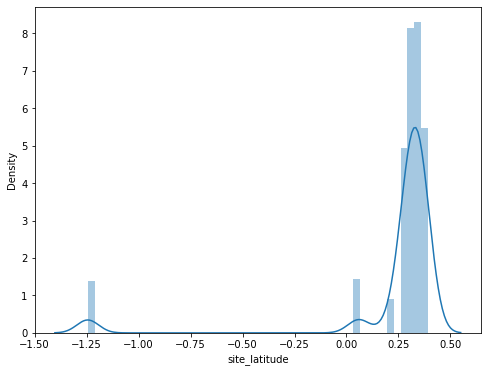

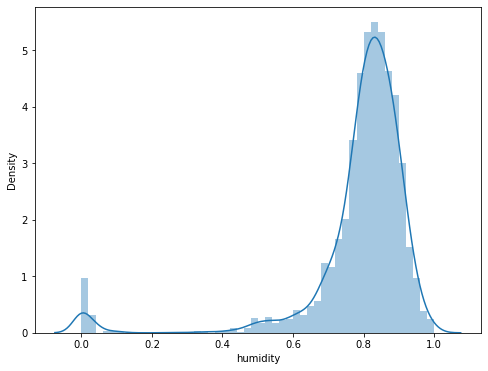

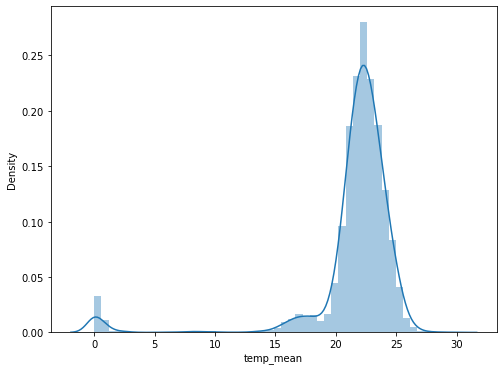

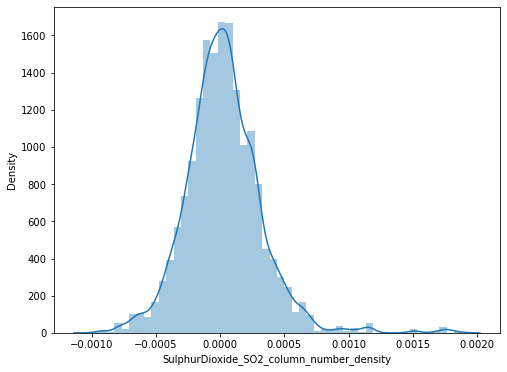

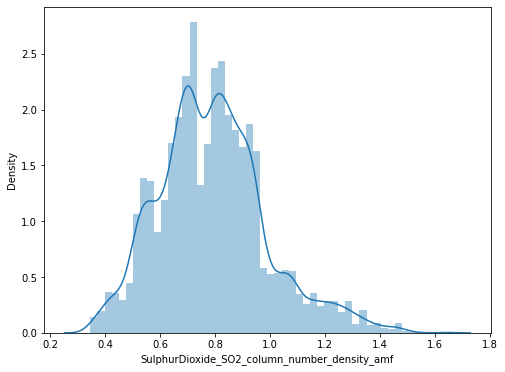

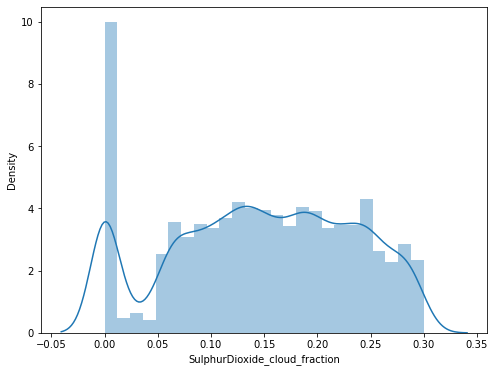

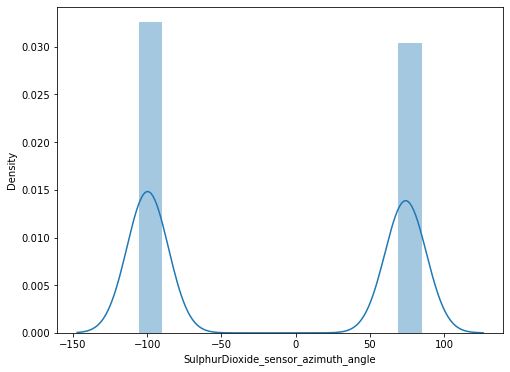

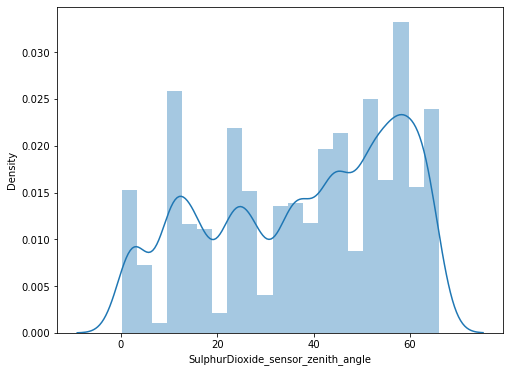

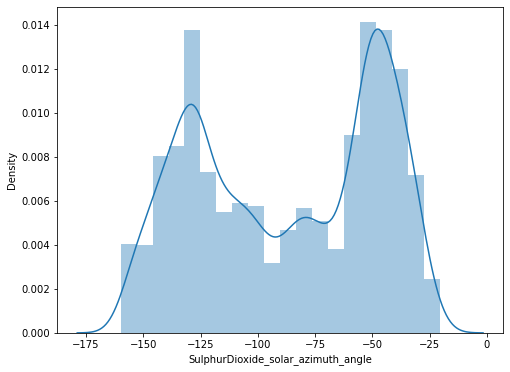

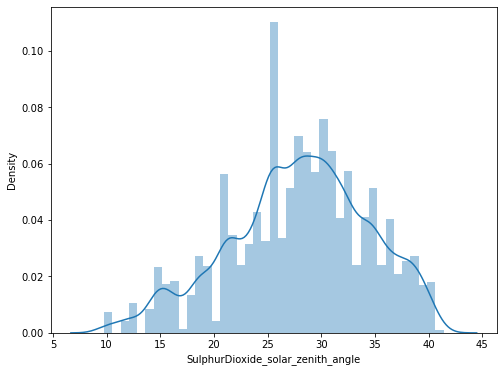

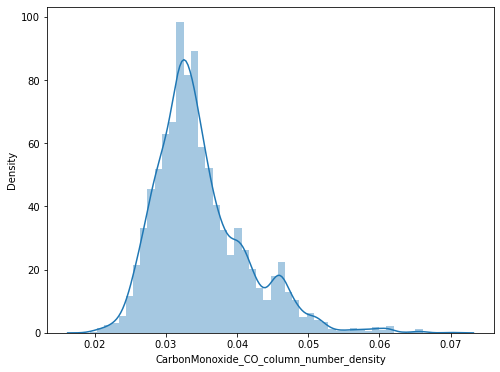

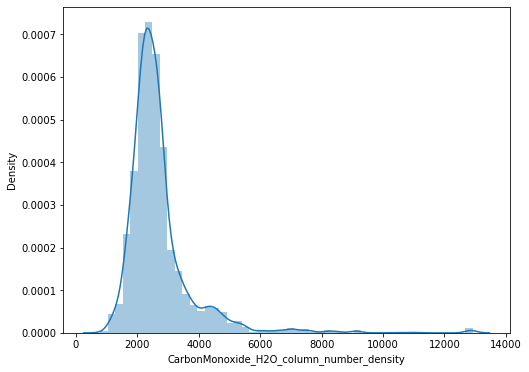

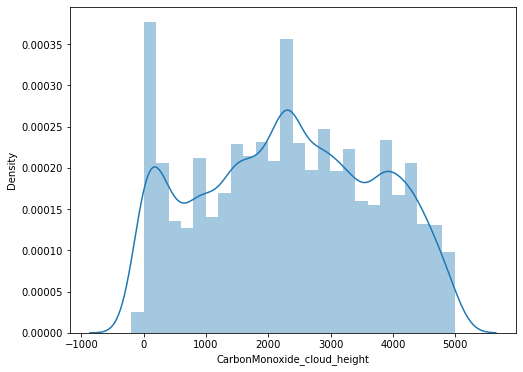

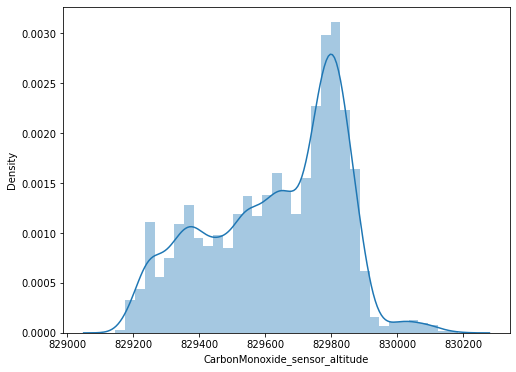

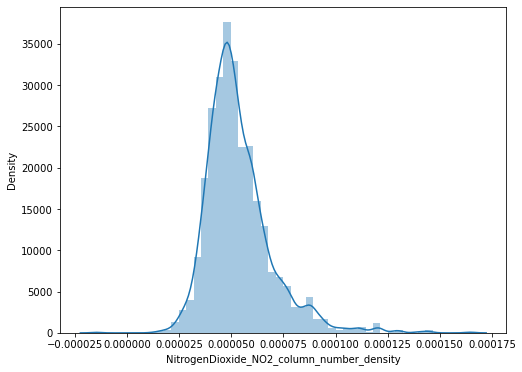

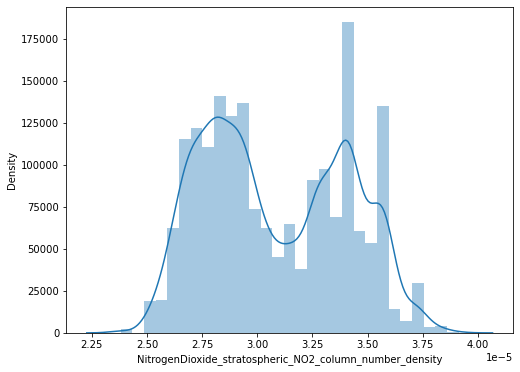

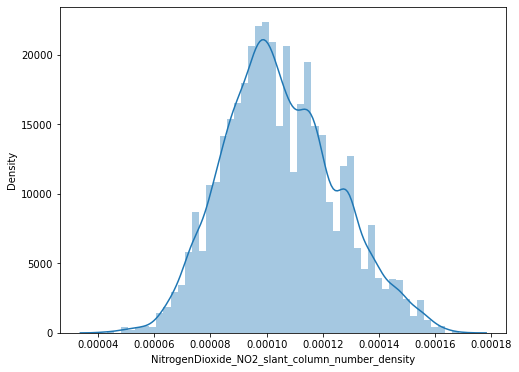

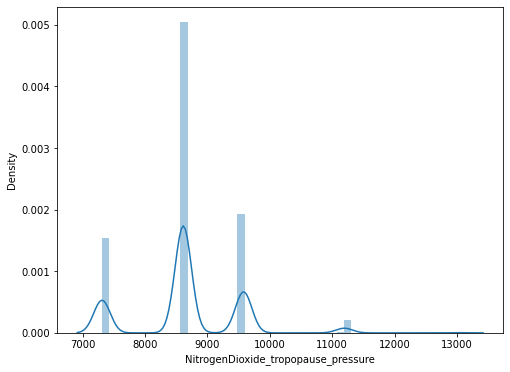

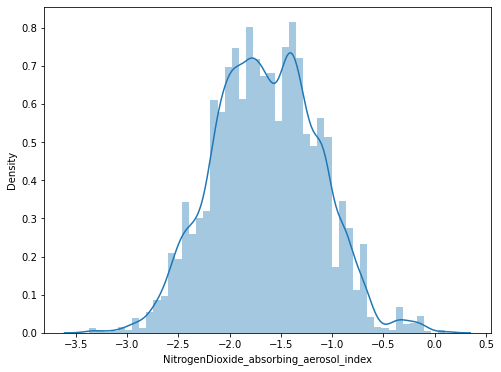

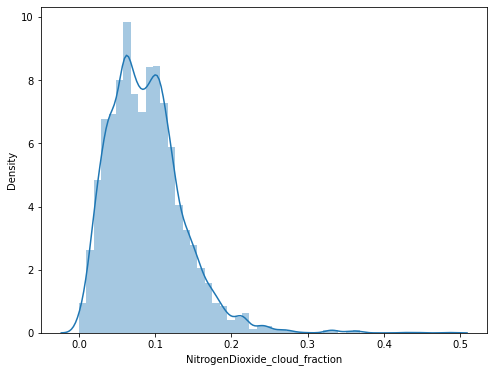

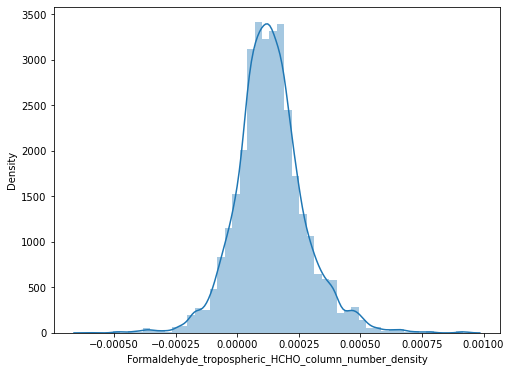

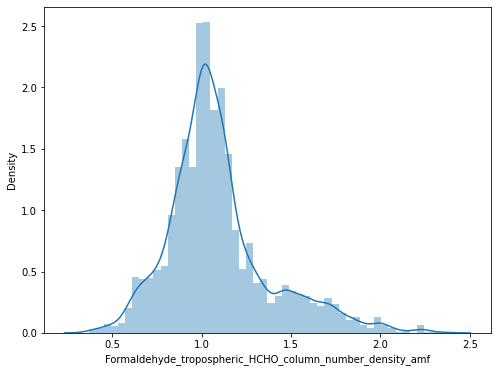

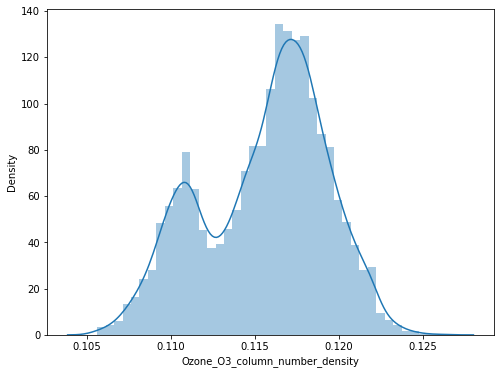

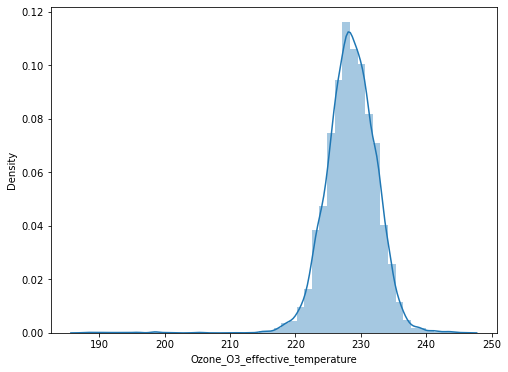

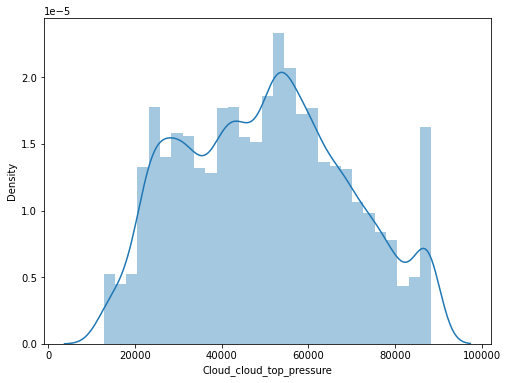

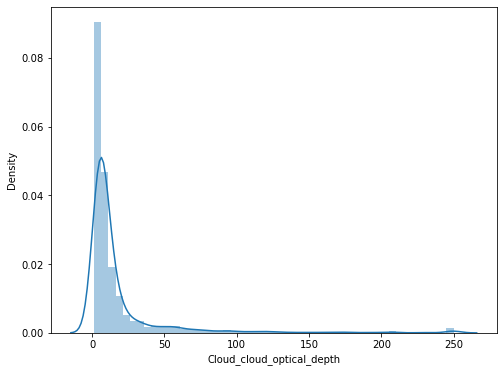

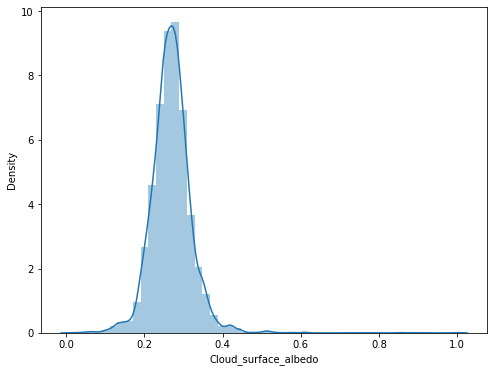

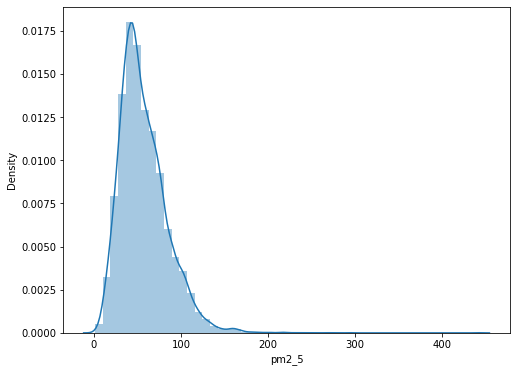

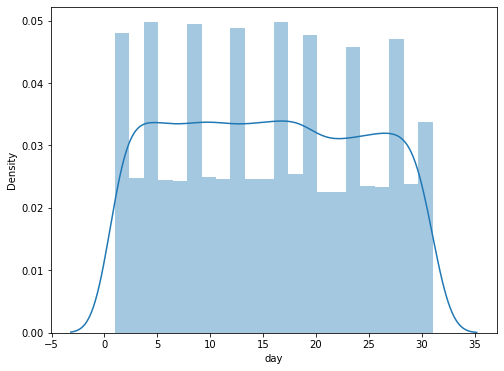

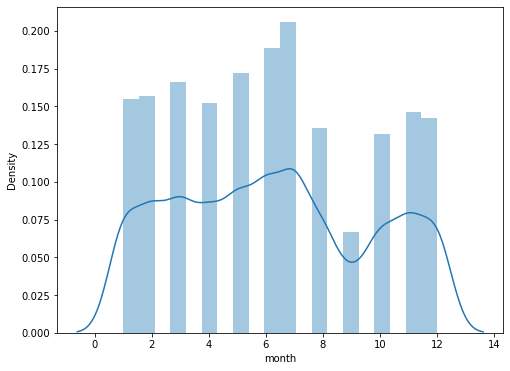

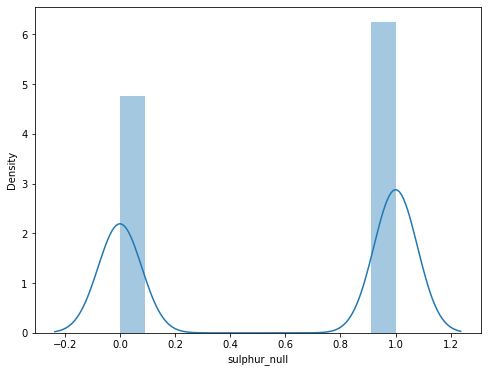

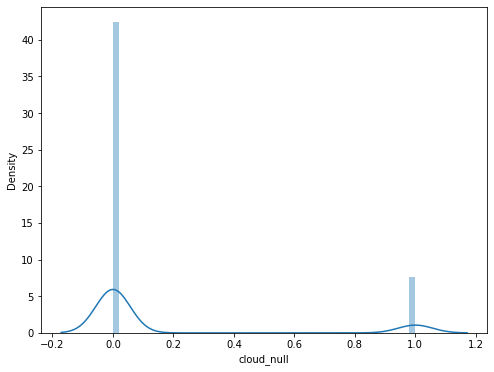

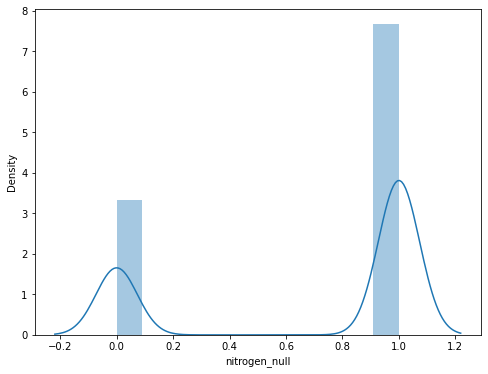

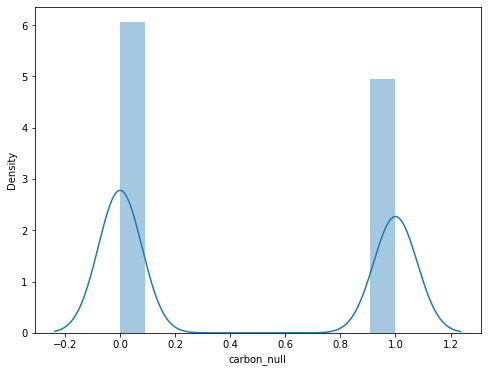

In [86]:
for col in quality_random.drop(columns=['ID','date','device']).columns:
    plt.figure()
    sns.distplot(quality_random[col])

<AxesSubplot:ylabel='Frequency'>

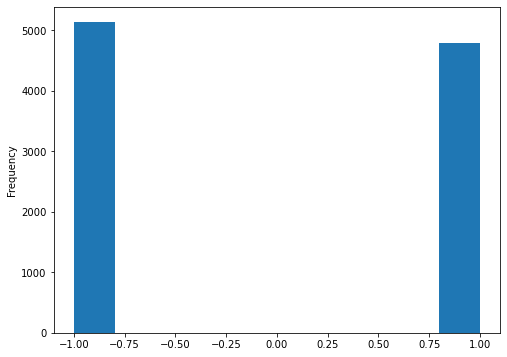

In [94]:
quality_random.SulphurDioxide_sensor_azimuth_angle.plot(kind='hist')

In [93]:
quality_random.loc[quality_random.SulphurDioxide_sensor_azimuth_angle<0,'SulphurDioxide_sensor_azimuth_angle']=-1
quality_random.loc[quality_random.SulphurDioxide_sensor_azimuth_angle>0,'SulphurDioxide_sensor_azimuth_angle'] = 1

In [95]:
quality_testr.loc[quality_testr.SulphurDioxide_sensor_azimuth_angle<0,'SulphurDioxide_sensor_azimuth_angle']=-1
quality_testr.loc[quality_testr.SulphurDioxide_sensor_azimuth_angle>0,'SulphurDioxide_sensor_azimuth_angle'] = 1

In [85]:
#test_missing = quality_test.columns[quality_test.isna().any()].tolist()

In [410]:
#quality_test = random_input(quality_test,test_missing)

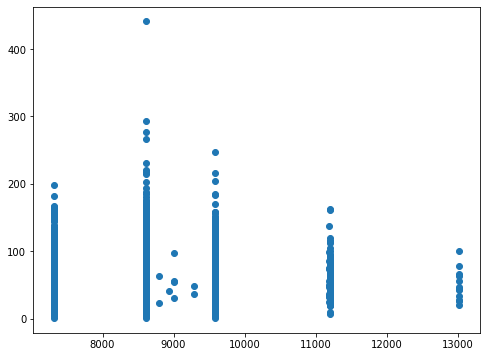

In [97]:
plt.scatter(quality_random.NitrogenDioxide_tropopause_pressure,quality_random.pm2_5)

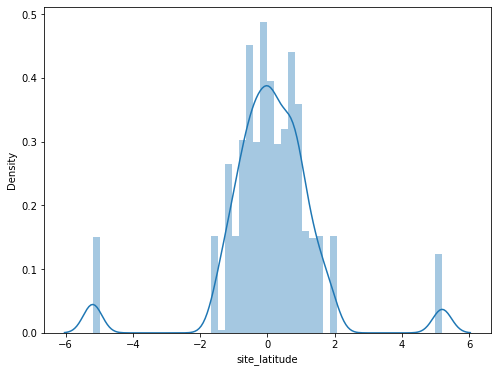

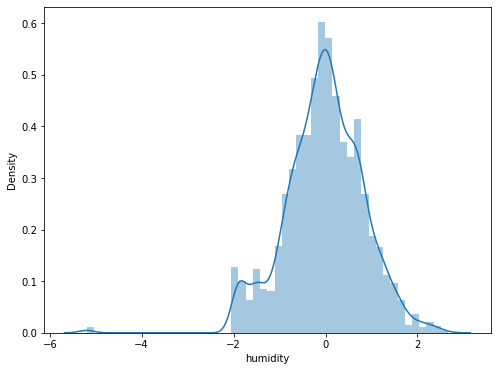

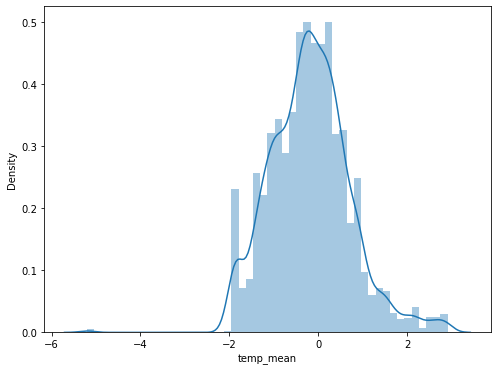

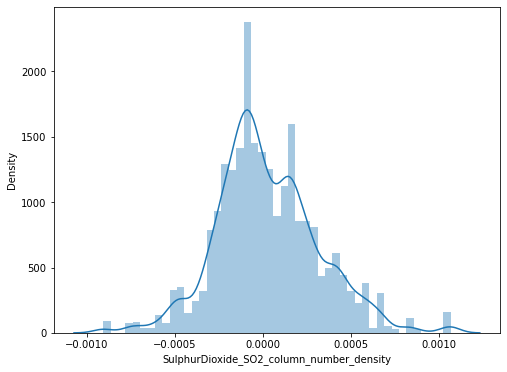

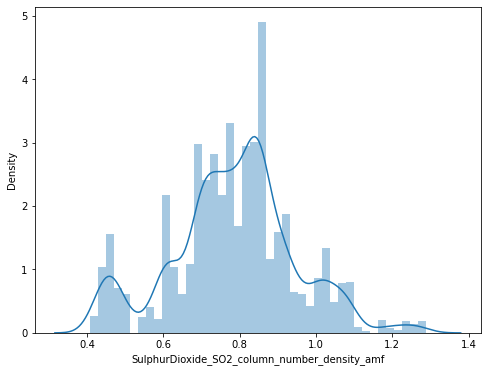

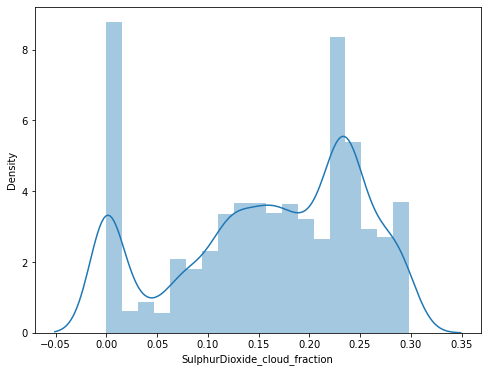

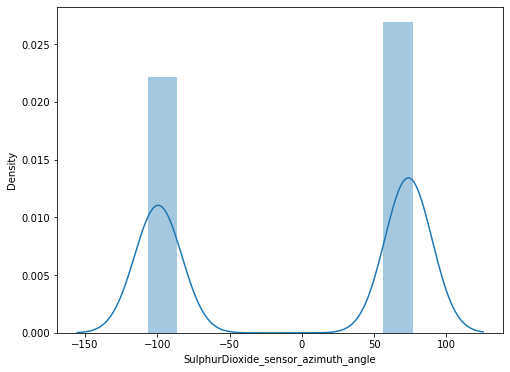

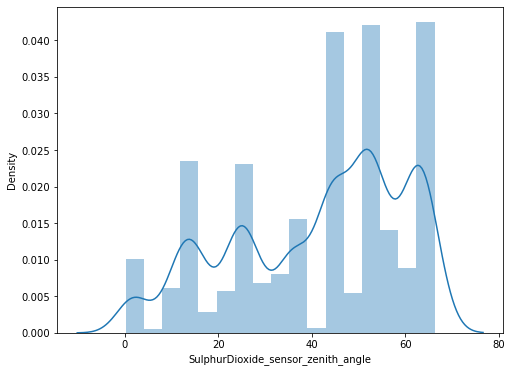

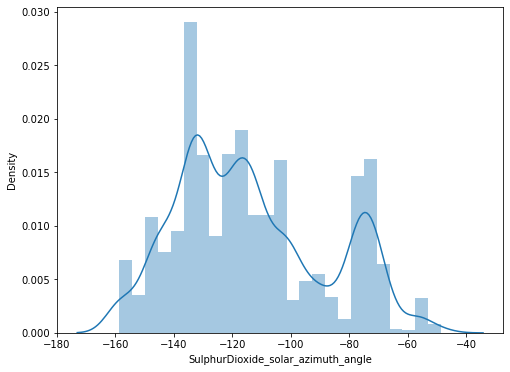

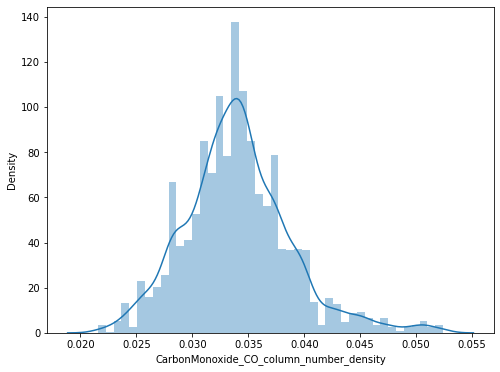

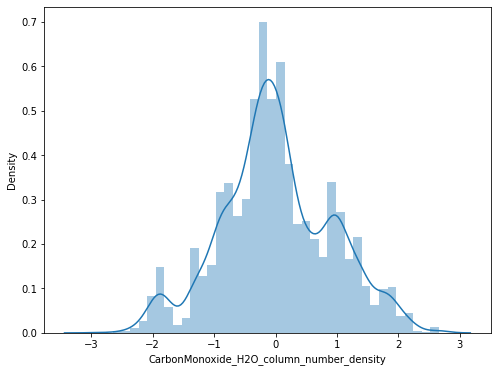

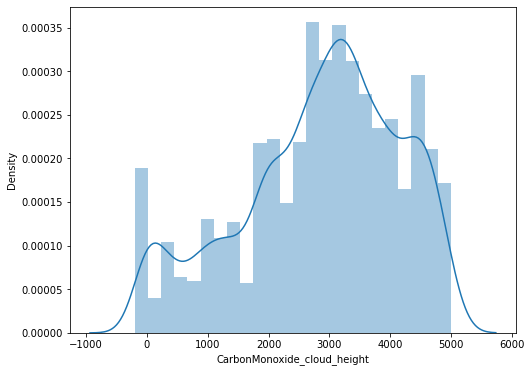

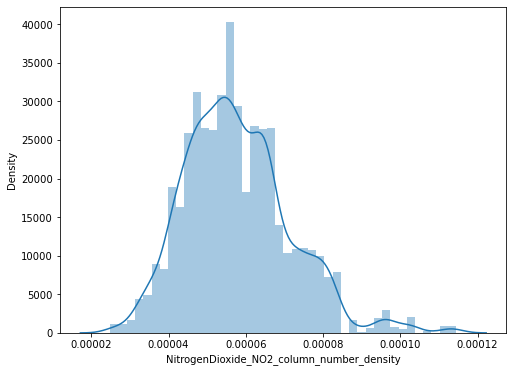

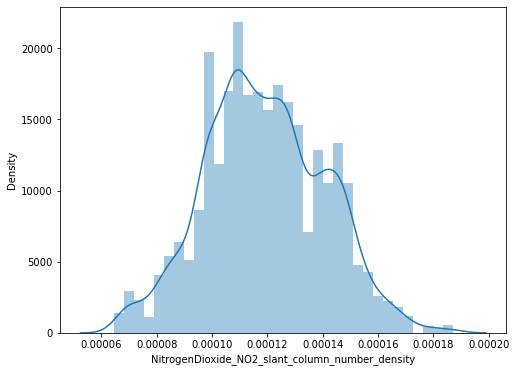

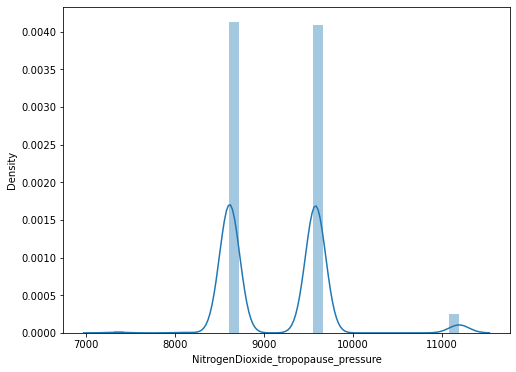

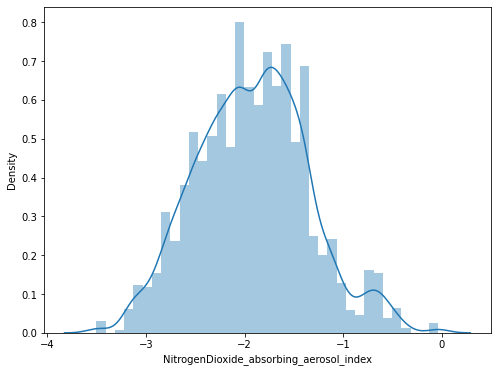

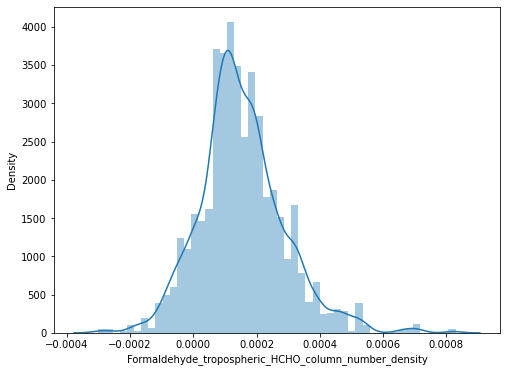

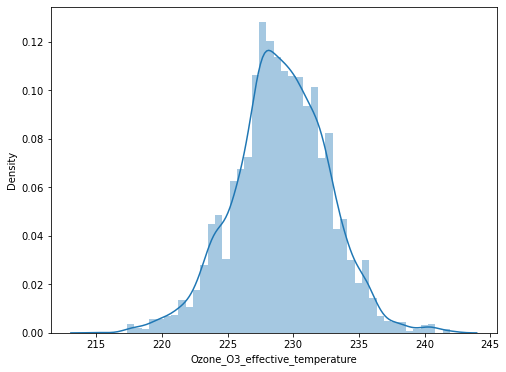

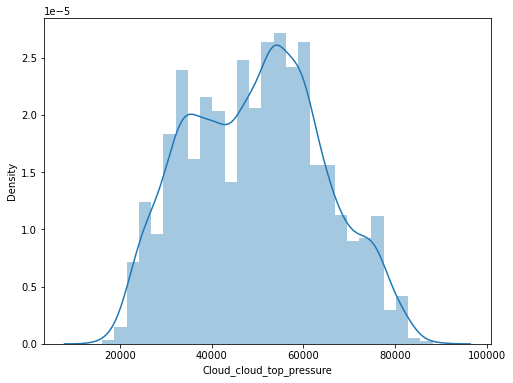

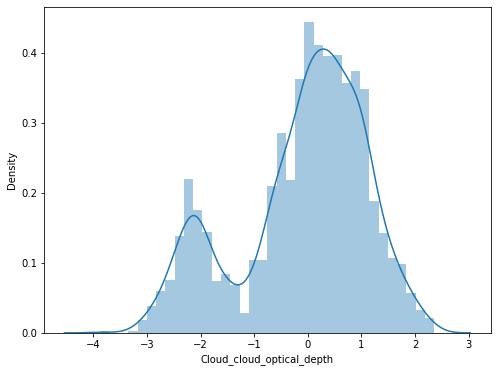

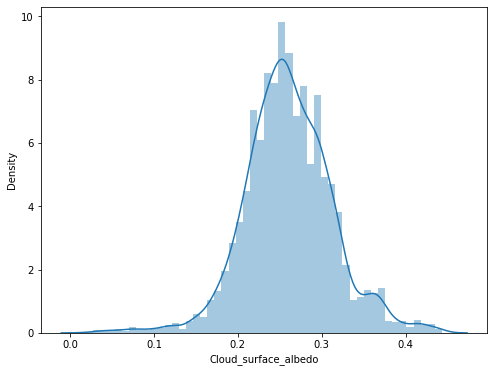

In [444]:
for col in quality_test.drop(columns=['ID','date','device']).columns:
    plt.figure()
    sns.distplot(quality_test[col])

In [98]:
transform_cols = ['site_latitude', 'temp_mean','humidity','CarbonMonoxide_H2O_column_number_density',
                  'Cloud_cloud_optical_depth','Ozone_O3_effective_temperature']

In [99]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(quality_random.drop(columns=['ID','date','device','pm2_5']),quality_random['pm2_5'],test_size=0.2,random_state=0)

In [100]:
from sklearn.preprocessing import QuantileTransformer

quantileT = QuantileTransformer(n_quantiles = 500,output_distribution='normal')

for col in transform_cols:
    X_train[col] = quantileT.fit_transform(np.array(X_train[col]).reshape(-1,1))
    X_test[col] = quantileT.transform(np.array(X_test[col]).reshape(-1,1))
    quality_testr[col] = quantileT.transform(np.array(quality_testr[col]).reshape(-1,1))

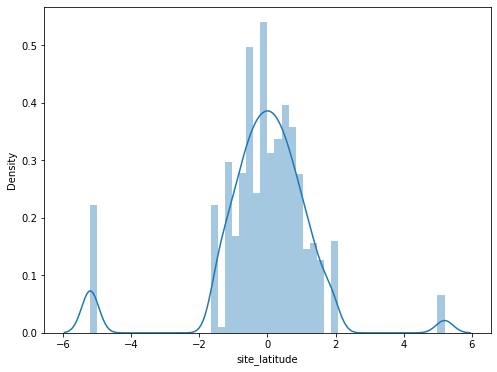

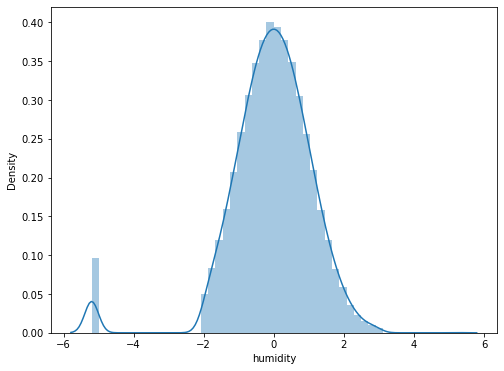

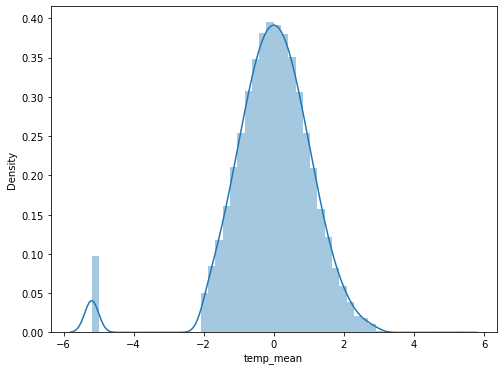

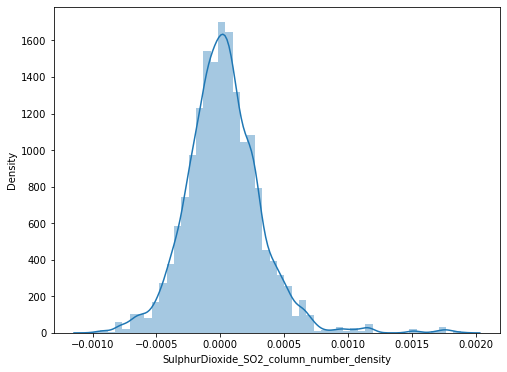

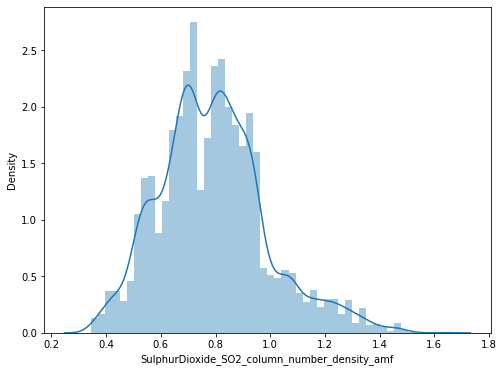

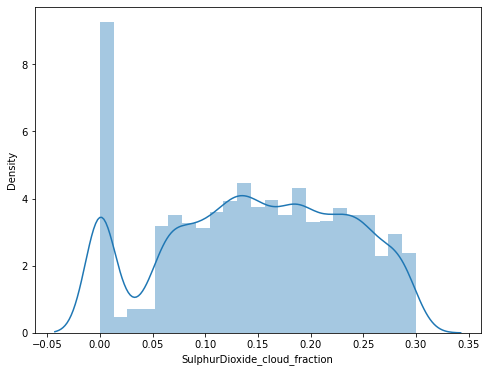

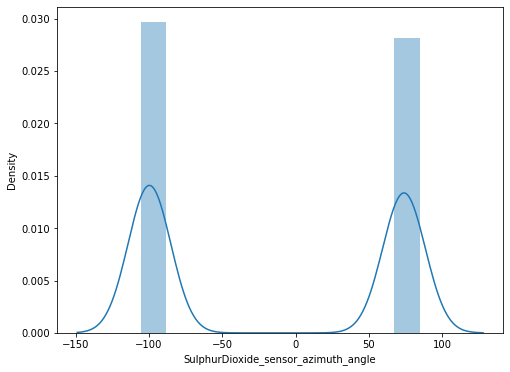

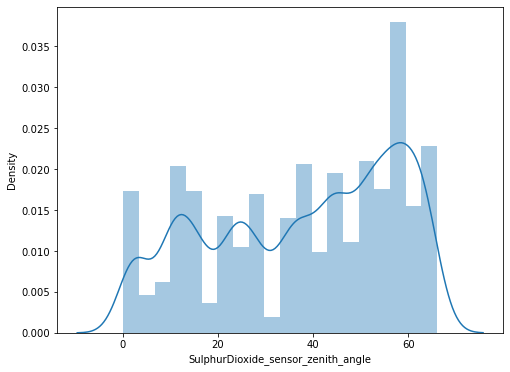

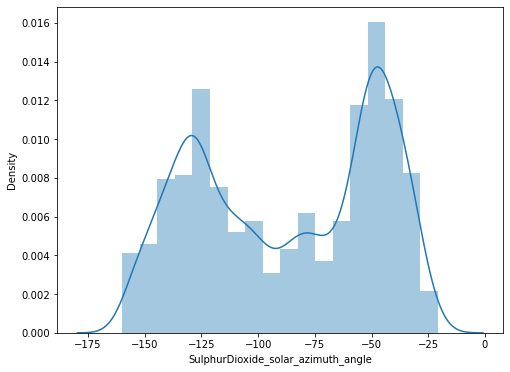

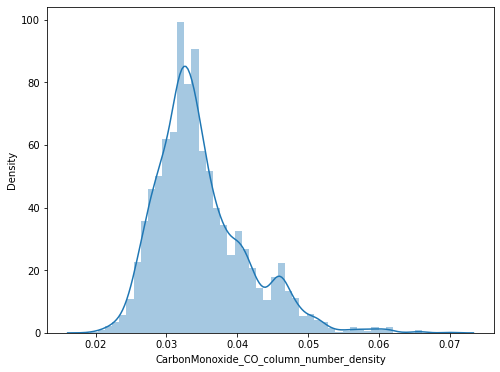

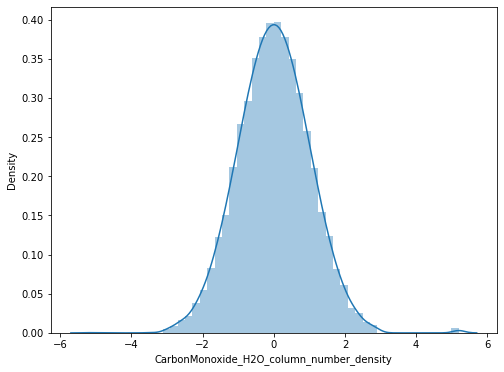

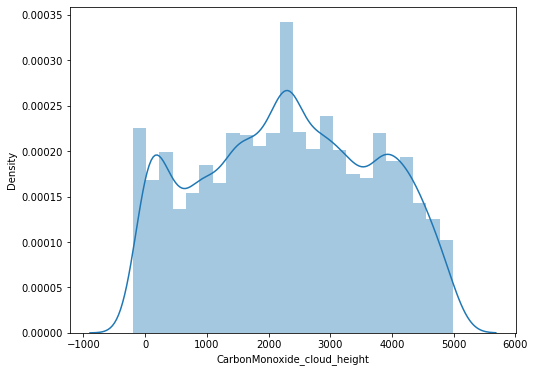

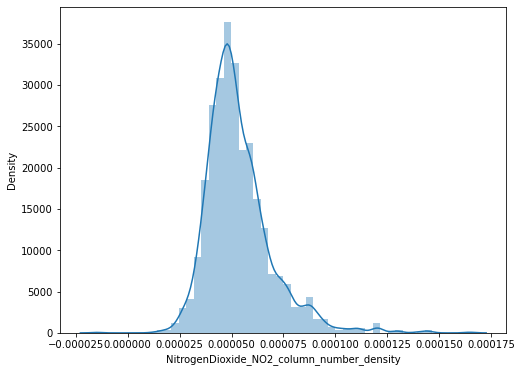

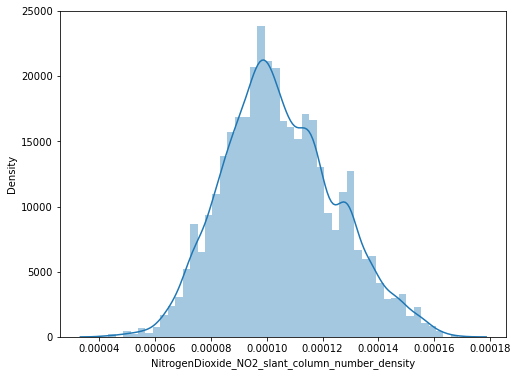

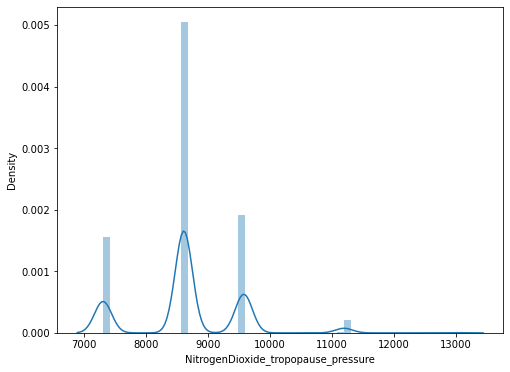

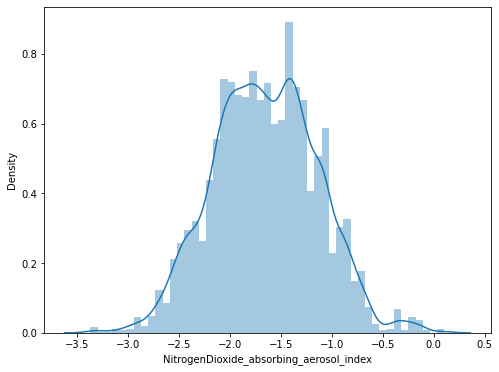

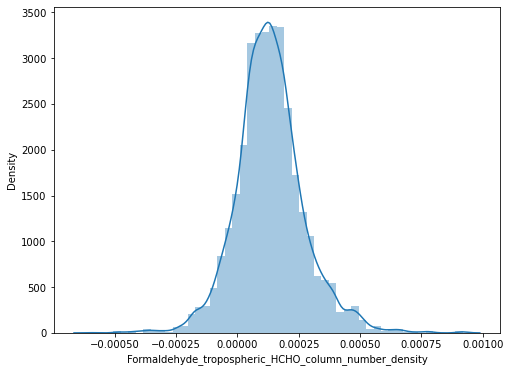

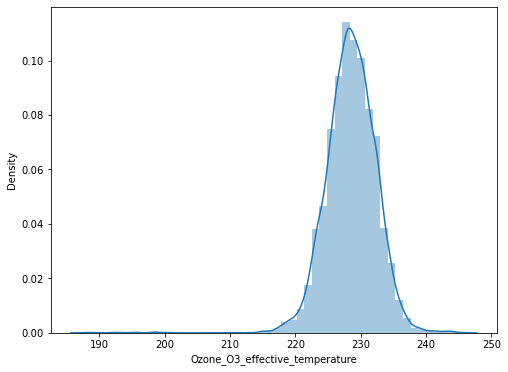

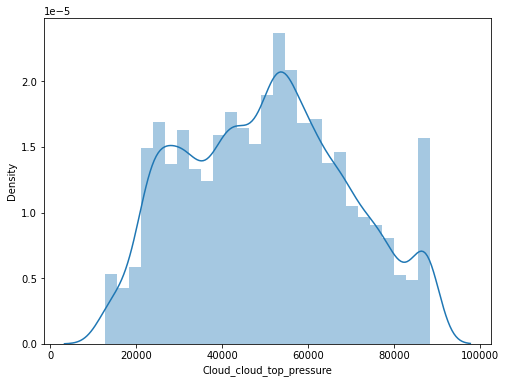

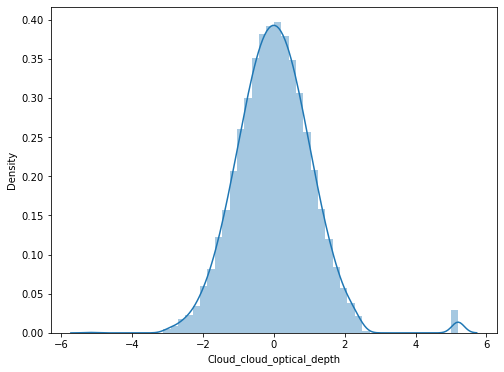

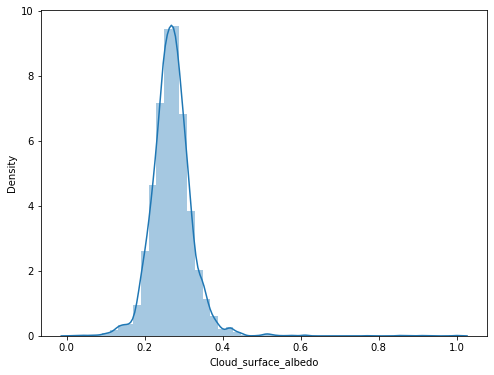

In [442]:
for col in X_train.columns:
    plt.figure()
    sns.distplot(X_train[col])

In [102]:
def outlier_removal(data,columns):
    df_ = data.copy()
    for col in columns[1:-1]:
        high = df_[col].quantile(0.95)
        low = df_[col].quantile(0.05)
        df_.loc[df_[col]>high,col]=high
        df_.loc[df_[col]<low,col]=low
    return df_

In [106]:
cont_cols.remove('pm2_5')
cont_cols.remove('day')
cont_cols.remove('month')
cont_cols.remove('SulphurDioxide_sensor_azimuth_angle')

In [107]:
X_trainout= outlier_removal(X_train,cont_cols)
X_testout= outlier_removal(X_test,cont_cols)
quality_testout = outlier_removal(quality_test,cont_cols)

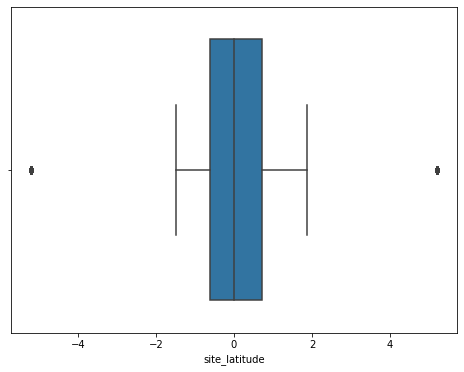

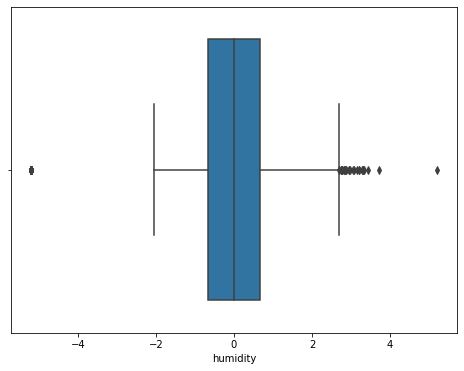

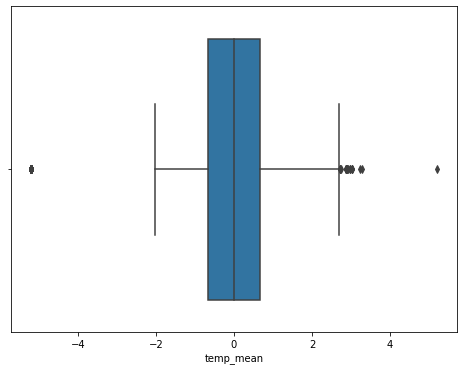

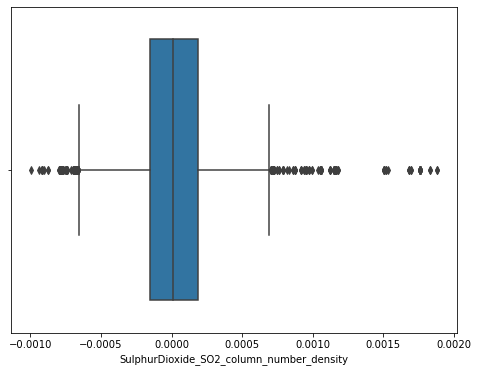

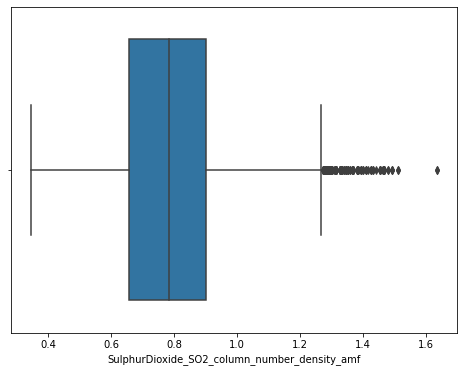

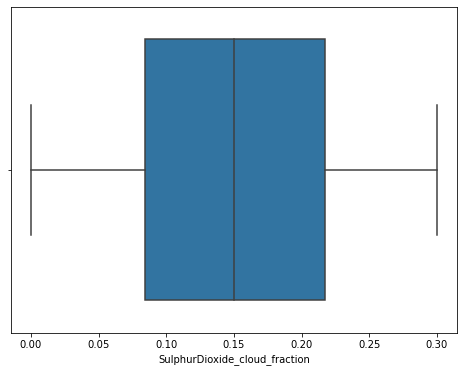

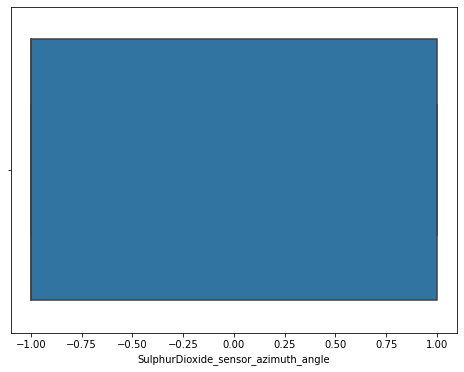

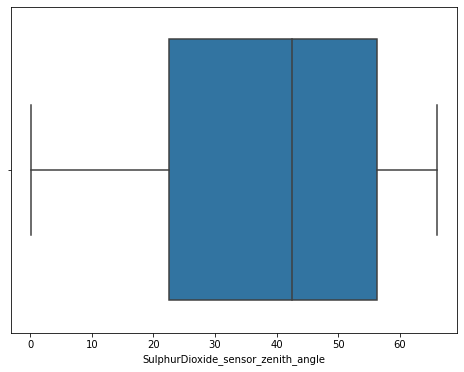

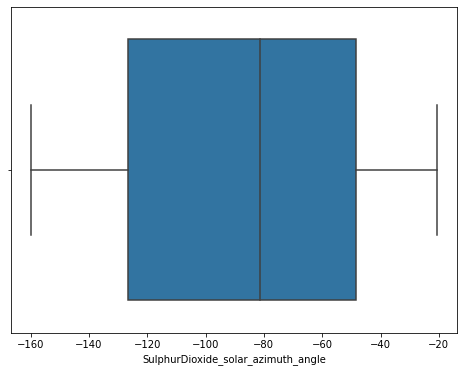

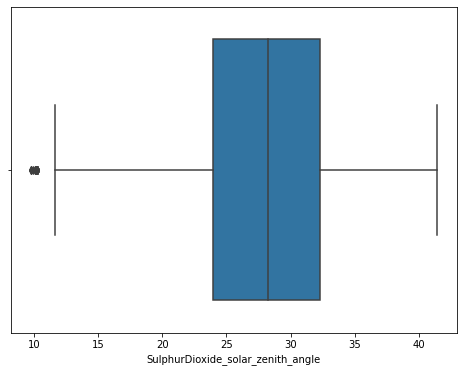

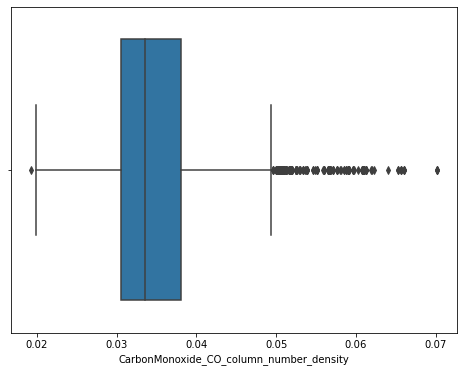

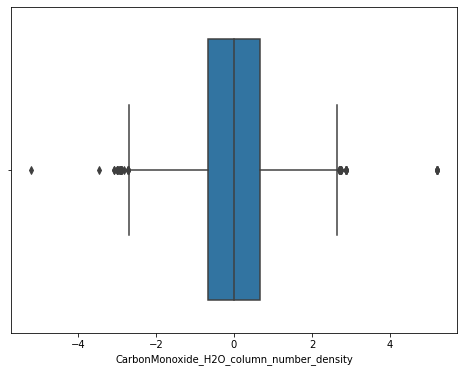

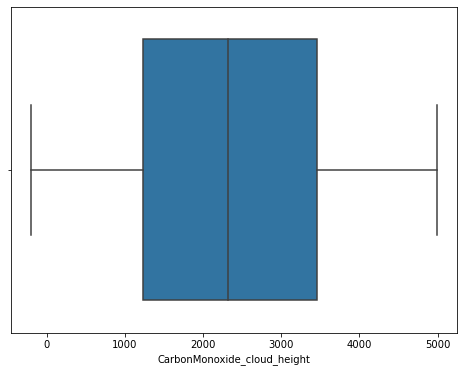

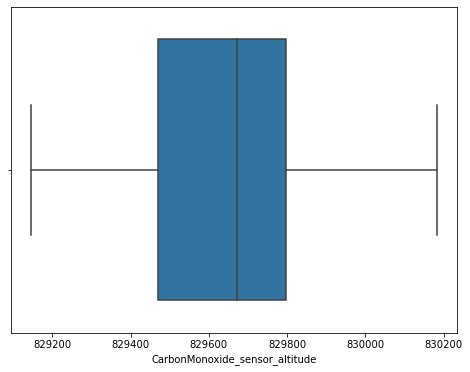

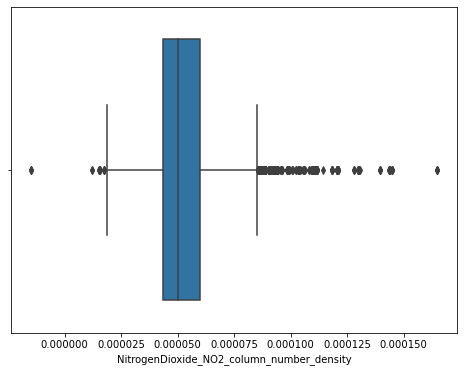

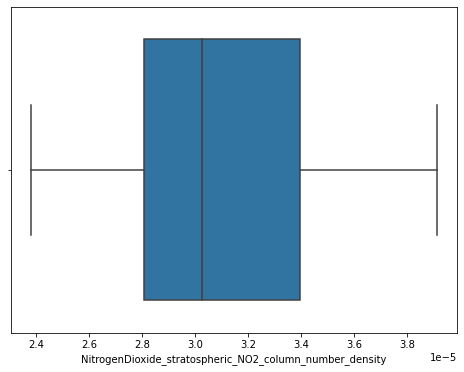

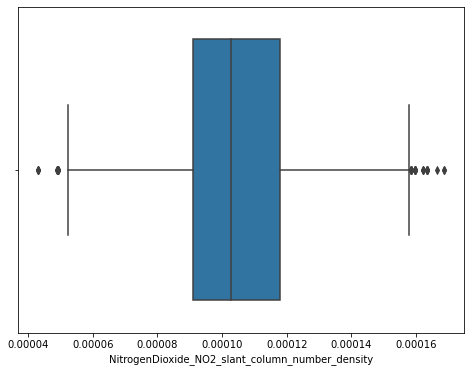

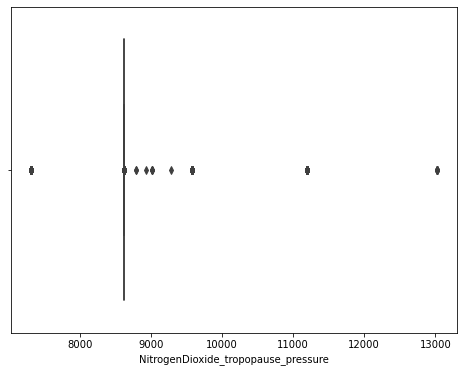

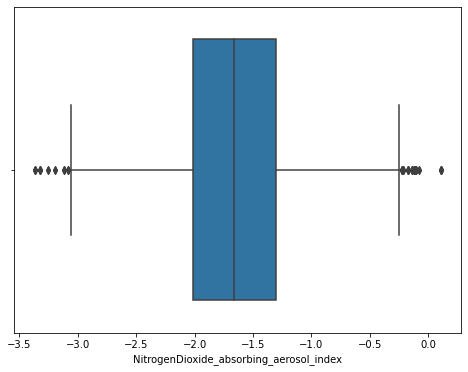

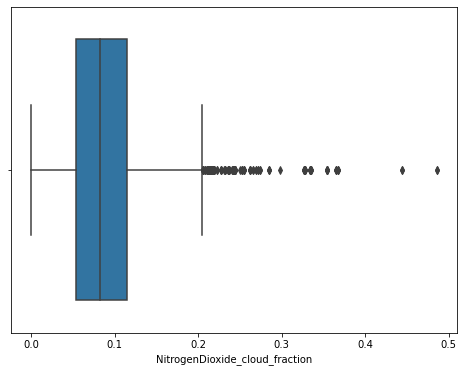

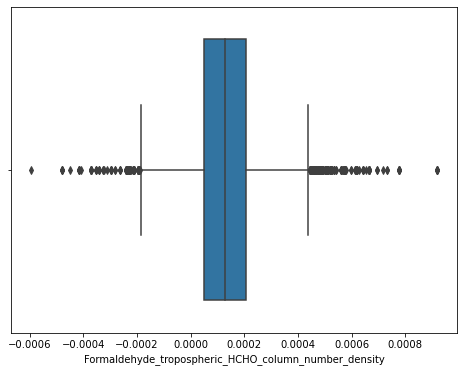

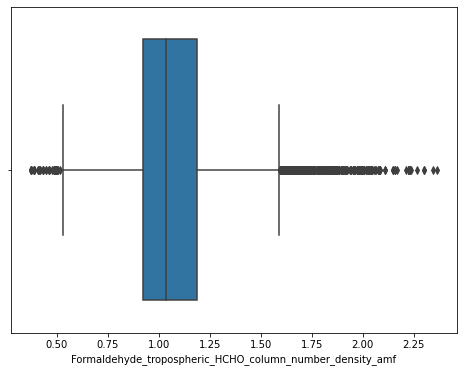

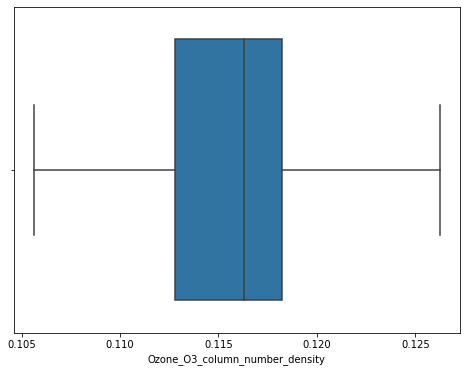

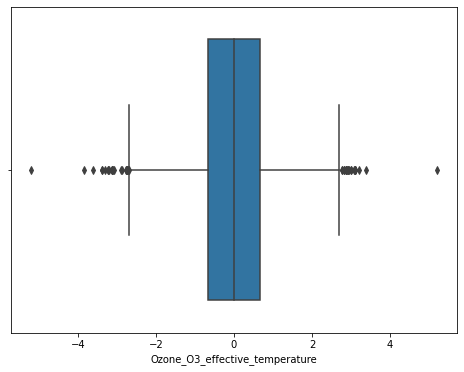

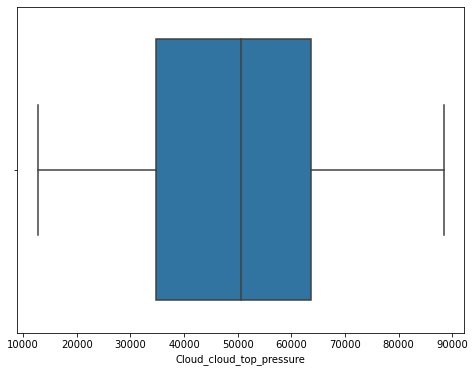

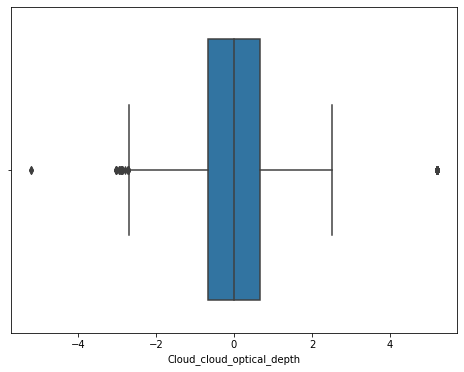

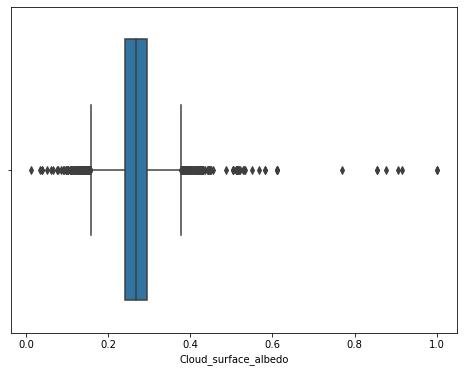

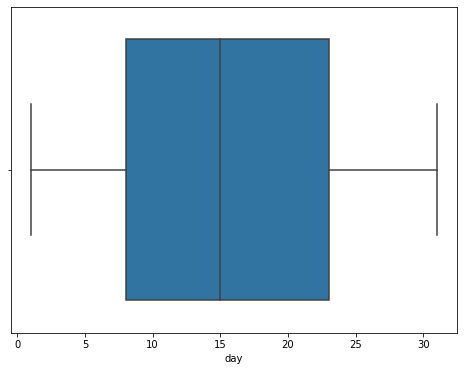

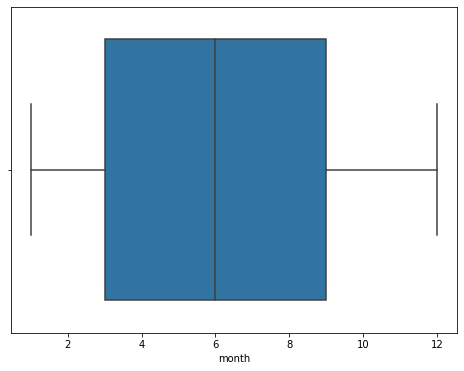

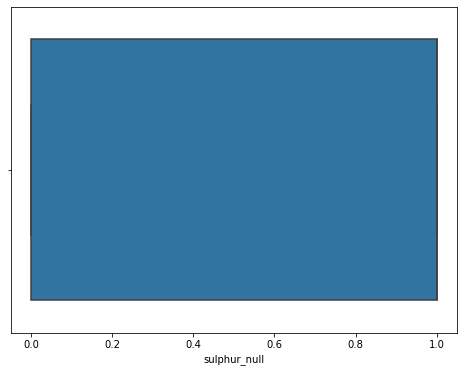

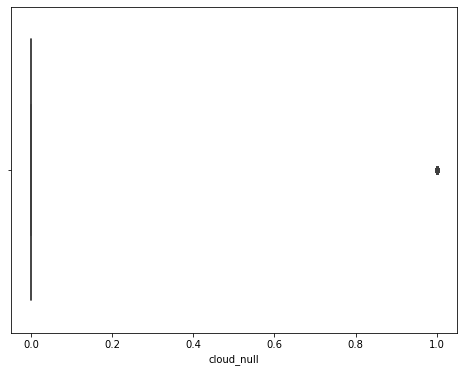

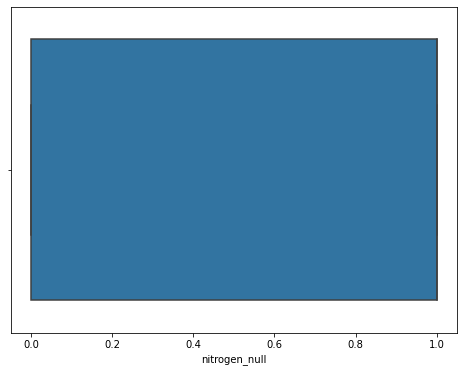

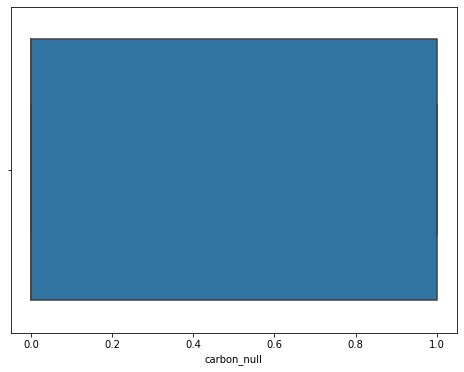

In [103]:
for col in X_train.columns:
    plt.figure()
    sns.boxplot(col,data=X_train)

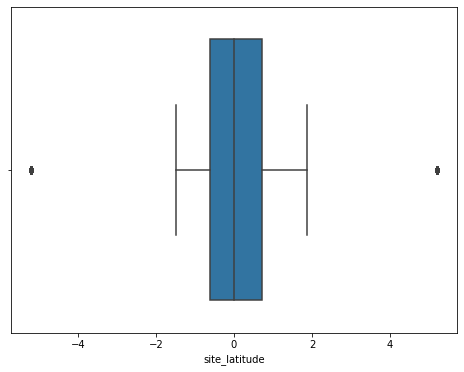

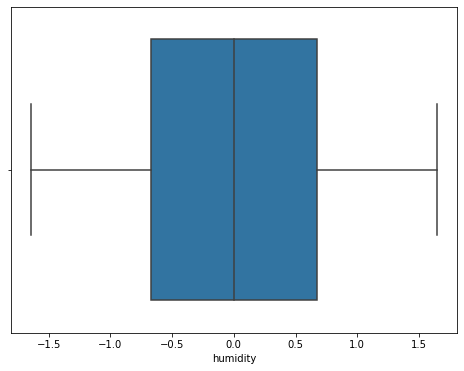

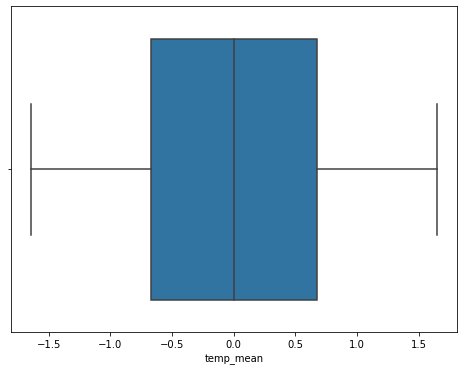

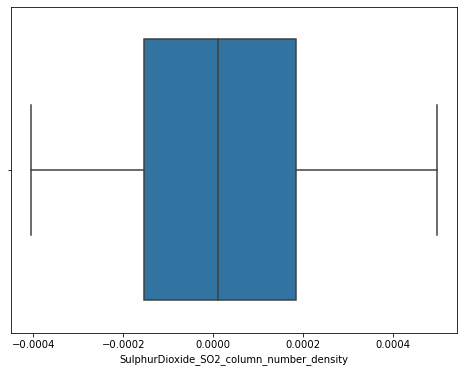

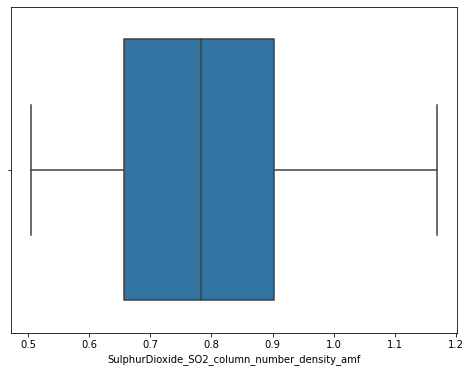

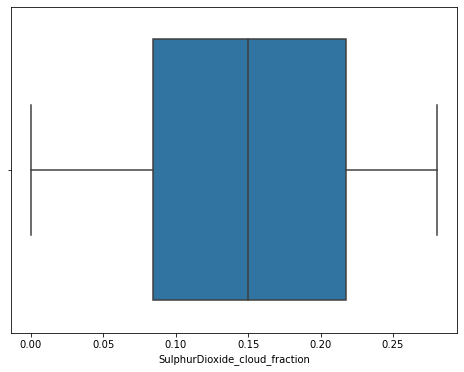

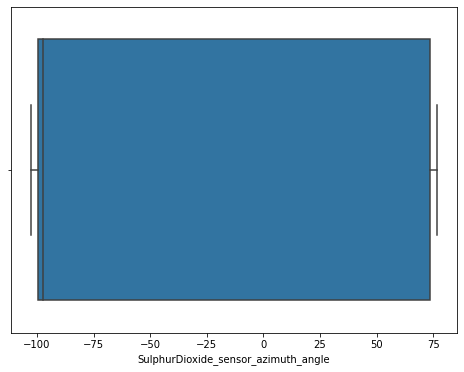

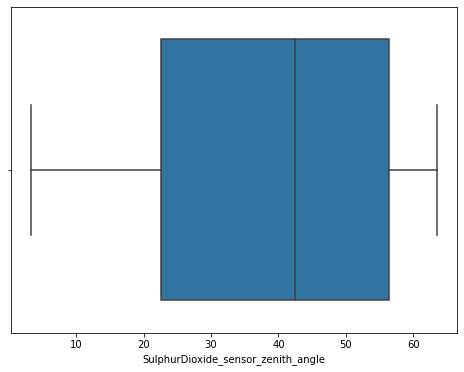

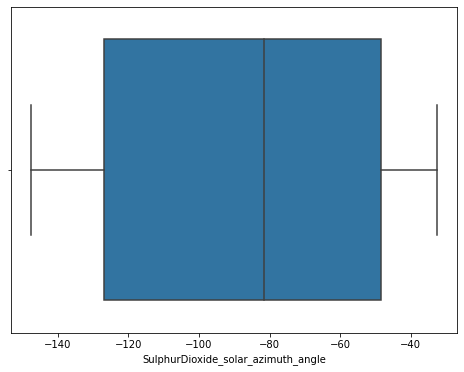

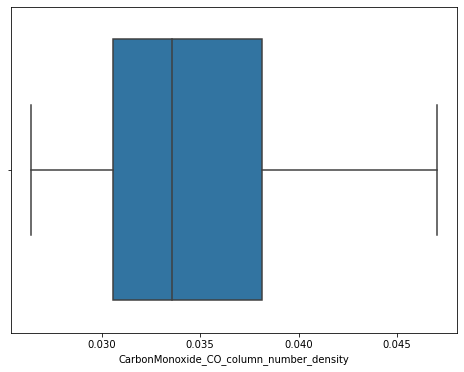

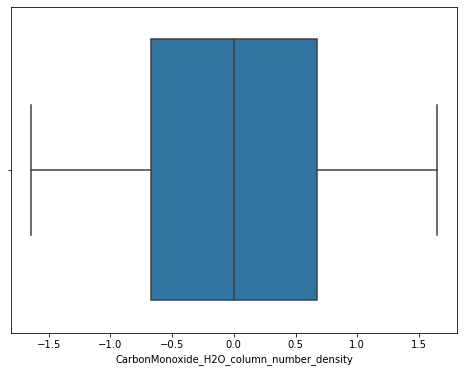

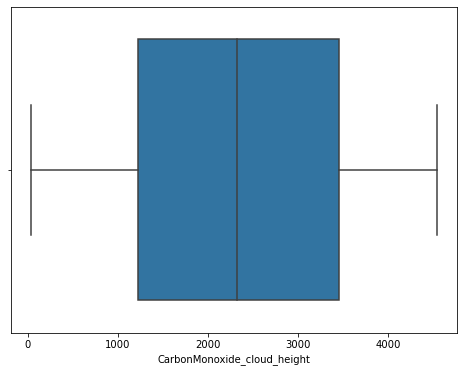

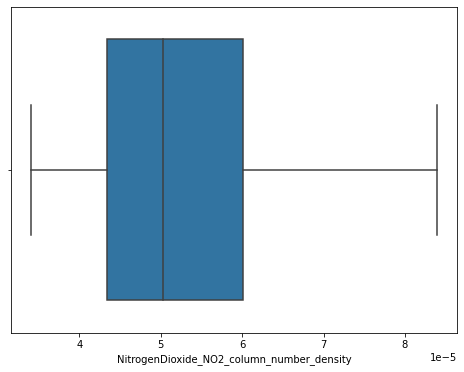

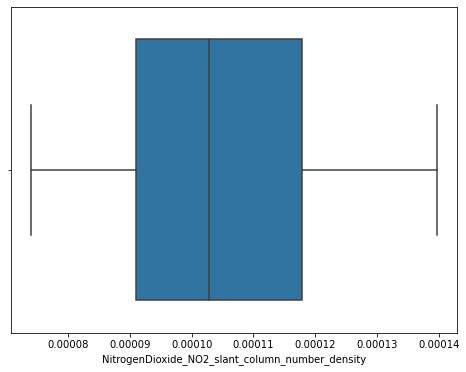

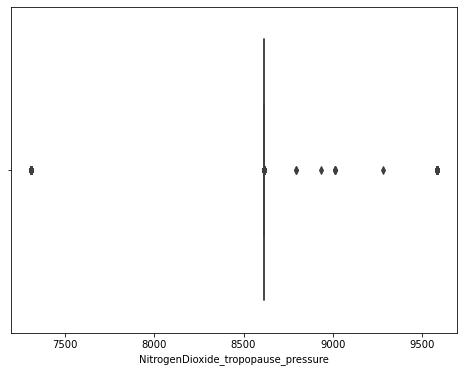

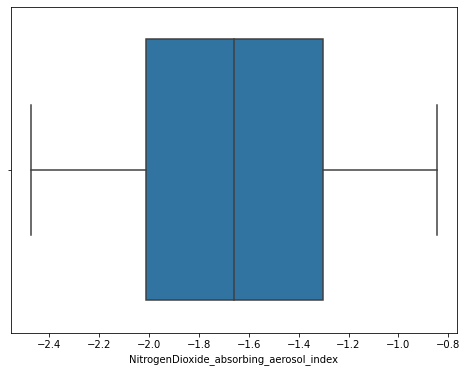

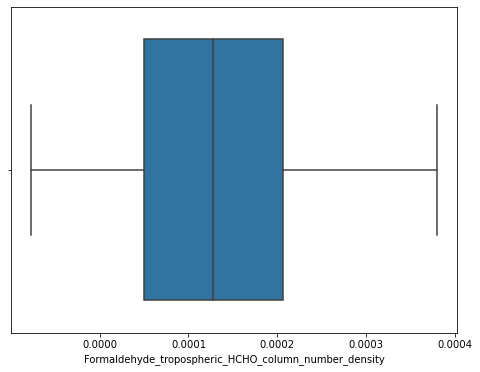

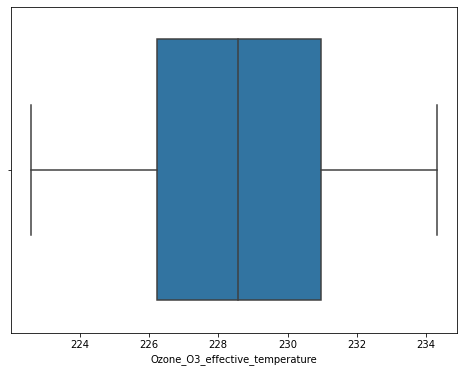

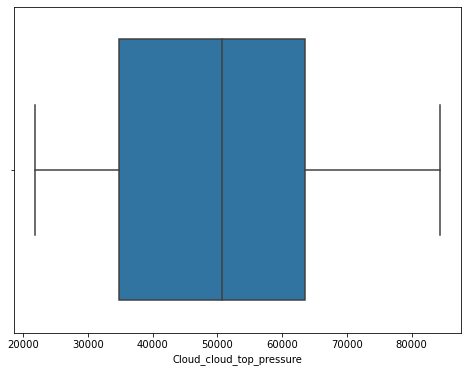

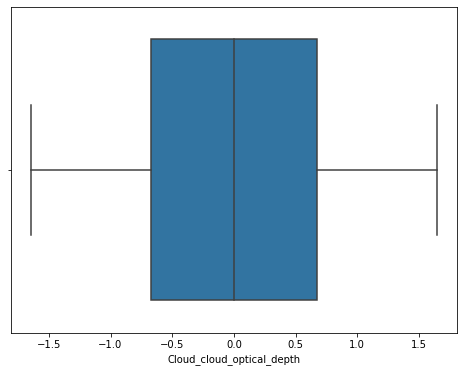

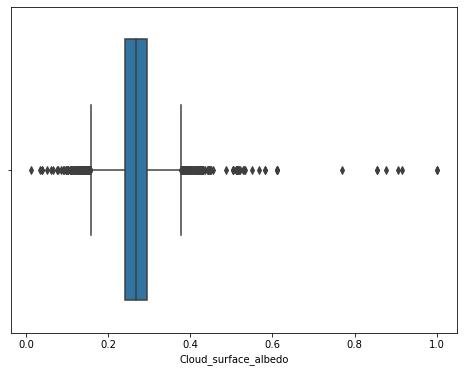

In [465]:
for col in X_trainout.columns:
    plt.figure()
    sns.boxplot(col,data=X_trainoutlier)

In [679]:
#Create new Features

ln = (13.7895*np.log(0.01*X_traincat['humidity']*np.exp(17.25*X_traincat['temp_mean']/(234.04 + X_traincat['temp_mean']))))

X_traincat['dew'] = ln/(1-(0.0567*ln))

ln_test = (13.7895*np.log(0.01*X_testcat['humidity']*np.exp(17.25*X_testcat['temp_mean']/(234.04 + X_testcat['temp_mean']))))

X_testcat['dew'] = ln_test/(1-(0.0567*ln_test))

ln_qual = (13.7895*np.log(0.01*quality_testcat['humidity']*np.exp(17.25*quality_testcat['temp_mean']/(234.04 + quality_testcat['temp_mean']))))

quality_testcat['dew'] = ln_qual/(1-(0.0567*ln_qual))

In [680]:
X_traincat

site_latitude  humidity  temp_mean  \
8770      -1.088095  0.618110   0.044345   
2315      -1.236069  1.644330  -0.659635   
9457      -0.424306 -0.690714   0.036046   
7561       1.570786  0.620539   0.667903   
1127      -1.474747  0.222520  -0.647894   
...             ...       ...        ...   
9225       1.879911  0.074551   0.798276   
4859       0.815424 -1.493759  -0.988732   
3264      -0.516922 -0.481712   1.034259   
9845       0.887612 -1.075871   0.755718   
2732       0.815424  1.309975  -0.727583   

      SulphurDioxide_SO2_column_number_density_amf  \
8770                                      0.654397   
2315                                      0.941603   
9457                                      0.821581   
7561                                      0.915730   
1127                                      0.603508   
...                                            ...   
9225                                      0.708224   
4859                                      0.816873   
3264                                      0.687493   
9845                                      0.692089   
2732                                      0.504770   

      CarbonMonoxide_CO_column_number_density  \
8770                                 0.034206   
2315                                 0.035033   
9457                                 0.045806   
7561                                 0.030319   
1127                                 0.027074   
...                                       ...   
9225                                 0.037061   
4859                                 0.031967   
3264                                 0.031057   
9845                                 0.047013   
2732                                 0.027409   

      CarbonMonoxide_H2O_column_number_density  Cloud_surface_albedo  \
8770                                 -0.218052              0.230527   
2315                                 -0.973459              0.273963   
9457                                 -0.581175              0.283574   
7561                                  0.105517              0.359705   
1127                                 -0.593114              0.253428   
...                                        ...                   ...   
9225                                  1.644536              0.279331   
4859                                 -1.037246              0.301667   
3264                                  0.226902              0.236432   
9845                                 -0.384341              0.232737   
2732                                  1.328290              0.287606   

            dew  
8770 -14.091060  
2315 -13.486772  
9457        NaN  
7561 -14.063119  
1127 -14.602676  
...         ...  
9225 -14.958253  
4859        NaN  
3264        NaN  
9845        NaN  
2732 -13.656902  

[7938 rows x 8 columns]

In [681]:
X_train = X_traincat
X_test = X_testcat

In [682]:
X_train.columns

Index(['site_latitude', 'humidity', 'temp_mean',
       'SulphurDioxide_SO2_column_number_density_amf',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density', 'Cloud_surface_albedo',
       'dew'],
      dtype='object')

In [158]:
X_trainout['humidity_roll30'] = X_trainout.humidity.rolling(30).mean()
X_trainout['temp_roll30'] = X_trainout.temp_mean.rolling(30).mean()

X_trainout['humidity_roll60'] = X_trainout.humidity.rolling(60).mean()
X_trainout['temp_roll60'] = X_trainout.temp_mean.rolling(60).mean()

X_testout['humidity_roll30'] = X_testout.humidity.rolling(30).mean()
X_testout['temp_roll30'] = X_testout.temp_mean.rolling(30).mean()

X_testout['humidity_roll60'] = X_testout.humidity.rolling(60).mean()
X_testout['temp_roll60'] = X_testout.temp_mean.rolling(60).mean()

quality_testout['humidity_roll30'] = quality_testout.humidity.rolling(30).mean()
quality_testout['temp_roll30'] = quality_testout.temp_mean.rolling(30).mean()

quality_testout['humidity_roll60'] = quality_testout.humidity.rolling(60).mean()
quality_testout['temp_roll60'] = quality_testout.temp_mean.rolling(60).mean()

In [832]:
X_train

site_latitude  humidity  temp_mean  \
8770      -1.088095  0.618110   0.044345   
2315      -1.236069  1.752695  -0.659909   
9457      -0.424306 -0.690714   0.036046   
7561       1.570786  0.620539   0.666726   
1127      -1.474747  0.222520  -0.648610   
...             ...       ...        ...   
9225       1.879911  0.074551   0.798276   
4859       0.815424 -1.493759  -0.988001   
3264      -0.516922 -0.481712   1.034024   
9845       0.887612 -1.075871   0.755868   
2732       0.815424  1.309975  -0.728636   

      SulphurDioxide_SO2_column_number_density  \
8770                                 -0.000186   
2315                                 -0.000373   
9457                                  0.000208   
7561                                  0.000640   
1127                                 -0.000168   
...                                        ...   
9225                                  0.000164   
4859                                 -0.000102   
3264                                 -0.000060   
9845                                 -0.000088   
2732                                 -0.000122   

      SulphurDioxide_SO2_column_number_density_amf  \
8770                                      0.654397   
2315                                      0.941603   
9457                                      0.821581   
7561                                      0.915730   
1127                                      0.603508   
...                                            ...   
9225                                      0.708224   
4859                                      0.816873   
3264                                      0.687493   
9845                                      0.692089   
2732                                      0.491367   

      SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
8770                       0.165057                           -99.680591   
2315                       0.052523                            72.876770   
9457                       0.131386                          -100.643250   
7561                       0.248049                           -97.262772   
1127                       0.242647                            71.652473   
...                             ...                                  ...   
9225                       0.078954                           -99.612030   
4859                       0.181755                           -97.704356   
3264                       0.249697                          -102.815596   
9845                       0.228364                           -99.751305   
2732                       0.279265                           -97.308090   

      SulphurDioxide_sensor_zenith_angle  SulphurDioxide_solar_azimuth_angle  \
8770                           37.599557                         -123.063684   
2315                           50.516903                          -30.598022   
9457                           26.927464                          -48.830185   
7561                           64.089508                          -66.555481   
1127                           62.364143                         -147.214279   
...                                  ...                                 ...   
9225                           38.508659                          -51.251522   
4859                           58.838600                         -129.657327   
3264                            2.435565                         -127.517225   
9845                           36.992992                          -52.291325   
2732                           63.687691                         -109.542725   

      SulphurDioxide_solar_zenith_angle  ...  Ozone_O3_effective_temperature  \
8770                          36.020879  ...                       -1.513607   
2315                          27.053802  ...                       -0.379236   
9457                          30.700247  ...                       -0.553279   
7561                          36.

<AxesSubplot:>

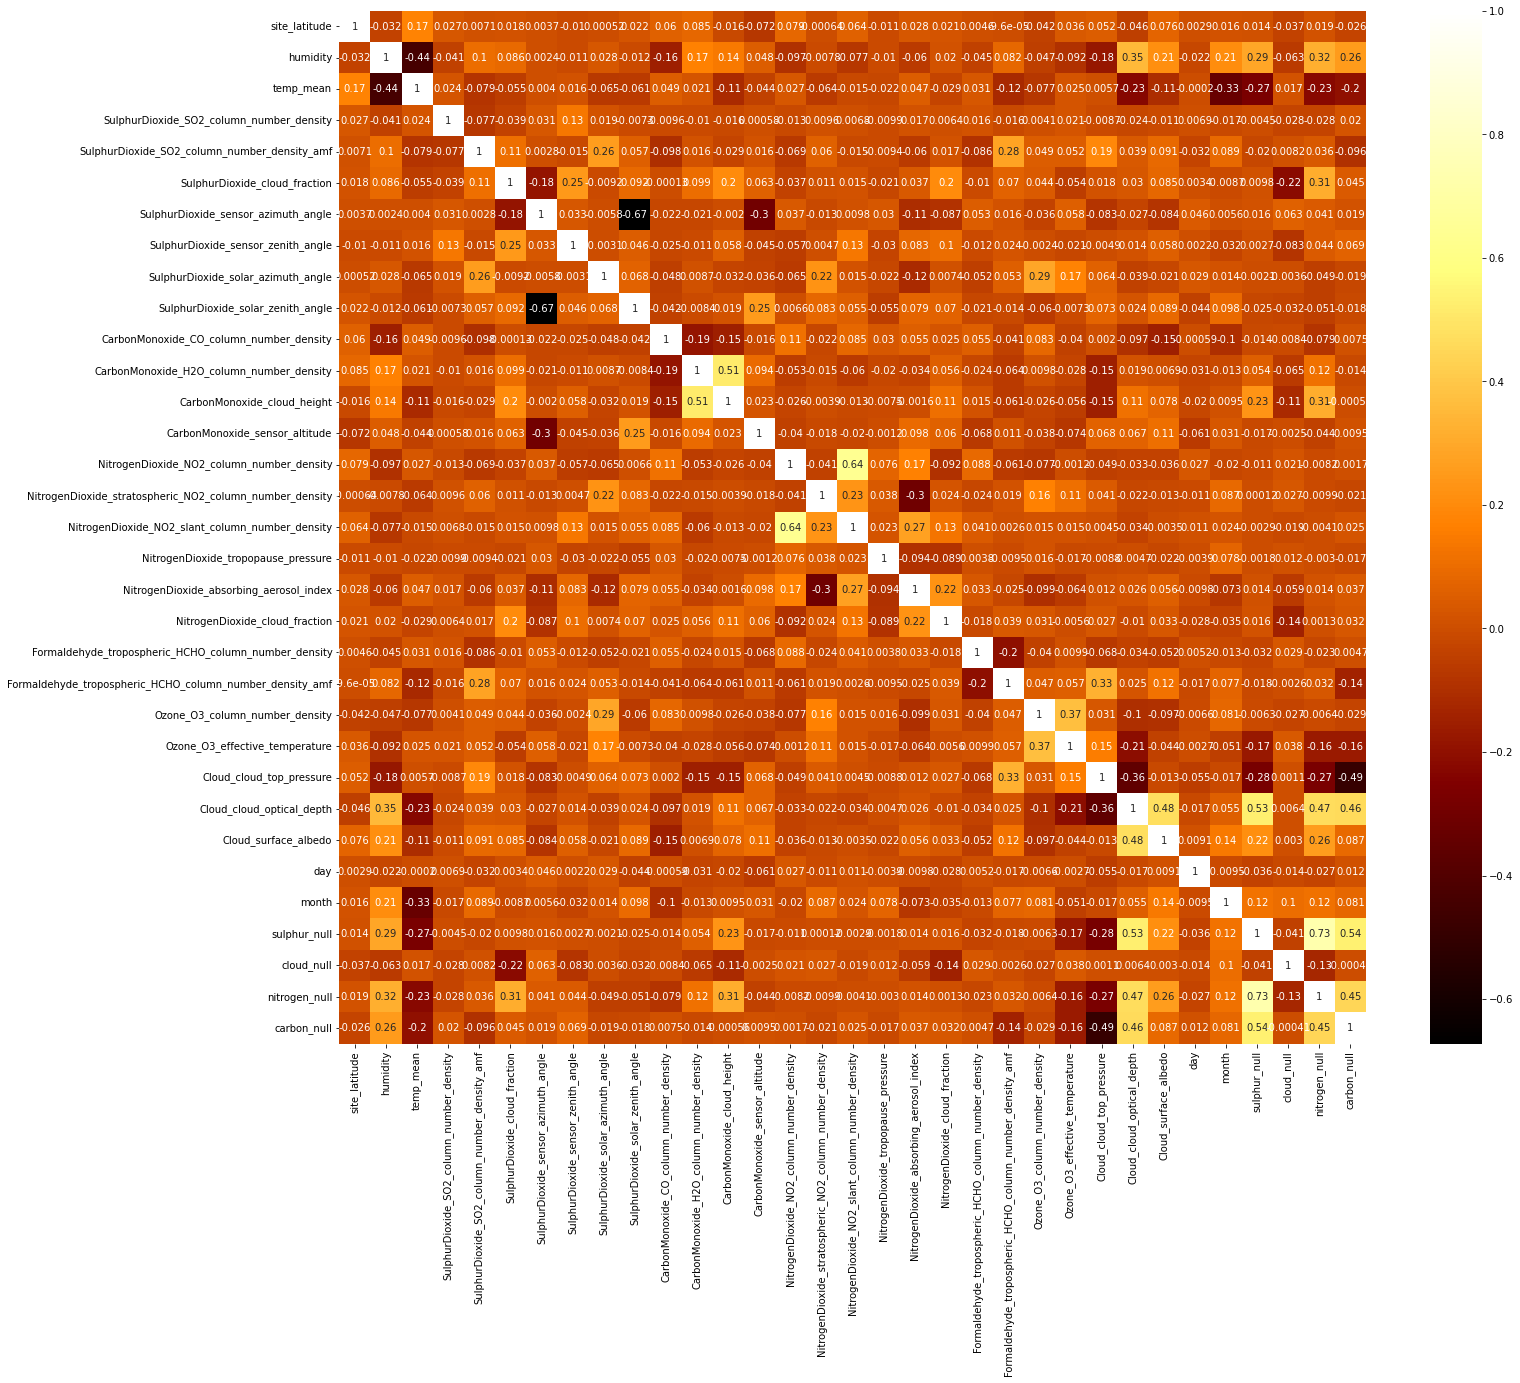

In [110]:
plt.figure(figsize=(23,19))
sns.heatmap(X_trainout.corr(),annot=True,cmap=plt.cm.afmhot)

In [691]:
X_train

site_latitude  humidity  temp_mean  \
8770      -1.088095  0.618110   0.044345   
2315      -1.236069  1.644330  -0.659635   
9457      -0.424306 -0.690714   0.036046   
7561       1.570786  0.620539   0.667903   
1127      -1.474747  0.222520  -0.647894   
...             ...       ...        ...   
9225       1.879911  0.074551   0.798276   
4859       0.815424 -1.493759  -0.988732   
3264      -0.516922 -0.481712   1.034259   
9845       0.887612 -1.075871   0.755718   
2732       0.815424  1.309975  -0.727583   

      SulphurDioxide_SO2_column_number_density_amf  \
8770                                      0.654397   
2315                                      0.941603   
9457                                      0.821581   
7561                                      0.915730   
1127                                      0.603508   
...                                            ...   
9225                                      0.708224   
4859                                      0.816873   
3264                                      0.687493   
9845                                      0.692089   
2732                                      0.504770   

      CarbonMonoxide_CO_column_number_density  \
8770                                 0.034206   
2315                                 0.035033   
9457                                 0.045806   
7561                                 0.030319   
1127                                 0.027074   
...                                       ...   
9225                                 0.037061   
4859                                 0.031967   
3264                                 0.031057   
9845                                 0.047013   
2732                                 0.027409   

      CarbonMonoxide_H2O_column_number_density  Cloud_surface_albedo  \
8770                                 -0.218052              0.230527   
2315                                 -0.973459              0.273963   
9457                                 -0.581175              0.283574   
7561                                  0.105517              0.359705   
1127                                 -0.593114              0.253428   
...                                        ...                   ...   
9225                                  1.644536              0.279331   
4859                                 -1.037246              0.301667   
3264                                  0.226902              0.236432   
9845                                 -0.384341              0.232737   
2732                                  1.328290              0.287606   

            dew  humidity_roll30  dew_roll30  temp_roll30  humidity_roll60  \
8770 -14.091060              NaN         NaN          NaN              NaN   
2315 -13.486772              NaN         NaN          NaN              NaN   
9457        NaN              NaN         NaN          NaN              NaN   
7561 -14.063119              NaN         NaN          NaN              NaN   
1127 -14.602676              NaN         NaN          NaN              NaN   
...         ...              ...         ...          ...              ...   
9225 -14.958253         0.046254         NaN    -0.164894         0.075324   
4859        NaN         0.010570         NaN    -0.167368         0.051096   
3264        NaN         0.009994         NaN    -0.149227         0.046710   
9845        NaN         0.001620         NaN    -0.076662         0.024183   
2732 -13.656902        -0.009525         NaN    -0.046105         0.073414   

      dew_roll60  temp_roll60  
8770         NaN          NaN  
2315         NaN          NaN  
9457         NaN          NaN  
7561         NaN          NaN  
1127         NaN          NaN  
...          ...          ...  
9225         NaN    -0.040376  
4859         NaN    -0.080745  
3264         NaN    -0.076352  
9845         NaN    -0.062293  
2732         NaN    -0.083017  

[7938 rows x 14 columns]

In [837]:
cols = ['temp_roll30','humidity_roll60','humidity_roll30','temp_roll60']

X_train = random_input(X_train,cols)
X_test = random_input(X_test,cols)
quality_randomtest = random_input(quality_randomtest,cols)

## Feature Selection

In [396]:
# X = df_.drop(columns=['pm2_5','date','ID','device'])
# y = df_['pm2_5']

In [164]:
from sklearn.feature_selection import VarianceThreshold,mutual_info_regression

var_thresh = VarianceThreshold(0.05)
var_thresh.fit(X_trainout[cont_cols])
mutual_info = mutual_info_regression(X_trainout[cont_cols],y_train)

In [165]:
var_cols = [col for col in X_trainout[cont_cols].columns if col not in X_trainout[cont_cols].columns[var_thresh.get_support()]]

In [166]:
var_cols

['SulphurDioxide_SO2_column_number_density',
 'SulphurDioxide_SO2_column_number_density_amf',
 'SulphurDioxide_cloud_fraction',
 'CarbonMonoxide_CO_column_number_density',
 'NitrogenDioxide_NO2_column_number_density',
 'NitrogenDioxide_stratospheric_NO2_column_number_density',
 'NitrogenDioxide_NO2_slant_column_number_density',
 'NitrogenDioxide_cloud_fraction',
 'Formaldehyde_tropospheric_HCHO_column_number_density',
 'Ozone_O3_column_number_density',
 'Cloud_surface_albedo']

<AxesSubplot:>

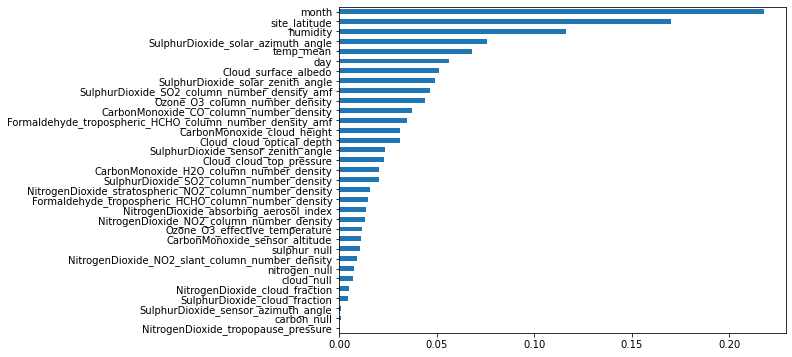

In [124]:
pd.Series(mutual_info,index=X_trainout.columns).sort_values(ascending=True).plot(kind='barh')

<AxesSubplot:>

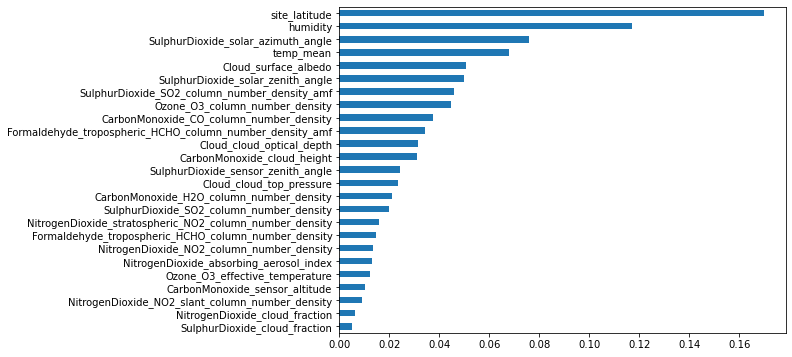

In [167]:
pd.Series(mutual_info,index=X_trainout[cont_cols].columns).sort_values(ascending=True).plot(kind='barh')

In [172]:
mi_cols = ['temp_roll30','humidity_roll60','humidity_roll30','temp_roll60','NitrogenDioxide_cloud_fraction',
           'SulphurDioxide_cloud_fraction','Formaldehyde_tropospheric_HCHO_column_number_density',
          'Ozone_O3_column_number_density','SulphurDioxide_SO2_column_number_density',
          'NitrogenDioxide_stratospheric_NO2_column_number_density','NitrogenDioxide_cloud_fraction']

In [125]:
X_trainout.drop(columns='NitrogenDioxide_tropopause_pressure',inplace=True)
X_testout.drop(columns='NitrogenDioxide_tropopause_pressure',inplace=True)
quality_testout.drop(columns='NitrogenDioxide_tropopause_pressure',inplace=True)

#NitrogenDioxide_tropopause_pressure is dropped

In [485]:
# X_trainoutlier.drop(columns='SulphurDioxide_cloud_fraction',inplace=True)
# X_testoutlier.drop(columns='SulphurDioxide_cloud_fraction',inplace=True)
# quality_test.drop(columns='SulphurDioxide_cloud_fraction',inplace=True)

# X_trainoutlier.drop(columns='SulphurDioxide_sensor_azimuth_angle',inplace=True)
# X_testoutlier.drop(columns='SulphurDioxide_sensor_azimuth_angle',inplace=True)
# quality_test.drop(columns='SulphurDioxide_sensor_azimuth_angle',inplace=True)

# #SulphurDioxide_cloud_fraction dropped,
# #SulphurDioxide_sensor_azimuth_angle dropped 

In [174]:
X_trainselect = X_trainout.drop(columns=mi_cols)
X_testselect = X_testout.drop(columns=mi_cols)
quality_testselect = quality_testout.drop(columns=mi_cols)

In [620]:
catB_columns = [ 'NitrogenDioxide_NO2_column_number_density','NitrogenDioxide_NO2_slant_column_number_density','NitrogenDioxide_absorbing_aerosol_index']

In [621]:
X_traincat = X_trainselect.drop(columns=catB_columns)
X_testcat = X_testselect.drop(columns=catB_columns)
quality_testcat = quality_testselect.drop(columns=catB_columns)

In [855]:
X_trainselect

site_latitude  humidity  temp_mean  \
8770      -1.088095  0.618110   0.044345   
2315      -1.236069  1.752695  -0.659909   
9457      -0.424306 -0.690714   0.036046   
7561       1.570786  0.620539   0.666726   
1127      -1.474747  0.222520  -0.648610   
...             ...       ...        ...   
9225       1.879911  0.074551   0.798276   
4859       0.815424 -1.493759  -0.988001   
3264      -0.516922 -0.481712   1.034024   
9845       0.887612 -1.075871   0.755868   
2732       0.815424  1.309975  -0.728636   

      SulphurDioxide_SO2_column_number_density  \
8770                                 -0.000186   
2315                                 -0.000373   
9457                                  0.000208   
7561                                  0.000640   
1127                                 -0.000168   
...                                        ...   
9225                                  0.000164   
4859                                 -0.000102   
3264                                 -0.000060   
9845                                 -0.000088   
2732                                 -0.000122   

      SulphurDioxide_SO2_column_number_density_amf  \
8770                                      0.654397   
2315                                      0.941603   
9457                                      0.821581   
7561                                      0.915730   
1127                                      0.603508   
...                                            ...   
9225                                      0.708224   
4859                                      0.816873   
3264                                      0.687493   
9845                                      0.692089   
2732                                      0.491367   

      SulphurDioxide_sensor_zenith_angle  SulphurDioxide_solar_azimuth_angle  \
8770                           37.599557                         -123.063684   
2315                           50.516903                          -30.598022   
9457                           26.927464                          -48.830185   
7561                           64.089508                          -66.555481   
1127                           62.364143                         -147.214279   
...                                  ...                                 ...   
9225                           38.508659                          -51.251522   
4859                           58.838600                         -129.657327   
3264                            2.435565                         -127.517225   
9845                           36.992992                          -52.291325   
2732                           63.687691                         -109.542725   

      SulphurDioxide_solar_zenith_angle  \
8770                          36.020879   
2315                          27.053802   
9457                          30.700247   
7561                          36.701077   
1127                          25.867939   
...                                 ...   
9225                          34.481312   
4859                          38.370484   
3264                          32.275908   
9845                          31.211508   
2732                          31.864271   

      CarbonMonoxide_CO_column_number_density  \
8770                                 0.034206   
2315                                 0.035033   
9457                                 0.045806   
7561                                 0.030319   
1127                                 0.027074   
...                                       ...   
9225                                 0.037061   
4859                                 0.031967   
3264                                 0.031057   
9845                                 0.050610   
2732                                 0.027409   

      CarbonMonoxide_H2O_column_number_density  ...  \
8770                                 -0.218162  ...   
2315                                 -0.973492  ..

In [168]:
from sklearn.feature_selection import SelectKBest,f_regression

selection = SelectKBest(f_regression,k=10)
selection.fit(X_trainout[cont_cols],y_train)

SelectKBest(score_func=<function f_regression at 0x000001B57FA551F0>)

In [170]:
selectk = [col for col in X_trainout[cont_cols].columns if col not in X_trainout[cont_cols].columns[selection.get_support()]]

In [171]:
selectk

['SulphurDioxide_SO2_column_number_density',
 'SulphurDioxide_cloud_fraction',
 'SulphurDioxide_sensor_zenith_angle',
 'SulphurDioxide_solar_azimuth_angle',
 'SulphurDioxide_solar_zenith_angle',
 'CarbonMonoxide_cloud_height',
 'CarbonMonoxide_sensor_altitude',
 'NitrogenDioxide_stratospheric_NO2_column_number_density',
 'NitrogenDioxide_cloud_fraction',
 'Formaldehyde_tropospheric_HCHO_column_number_density',
 'Formaldehyde_tropospheric_HCHO_column_number_density_amf',
 'Ozone_O3_column_number_density',
 'Ozone_O3_effective_temperature',
 'Cloud_cloud_top_pressure',
 'Cloud_cloud_optical_depth']

In [ ]:
"""from sklearn.decomposition import PCA
from skelearn.preprocessing import MinMaxScaler,StandardScaler

pca = PCA()
scaler_s = StandardScaler()
scaler_m = MinMaxScaler()

X_trainscaled = scaler_s.fit_transform(X_trainoutlier)
X_testscaled = scaler_s.transform(X_testoutlier)


pca.fit_transform()"""

In [ ]:
sns.heatmap(X_trainoutlier.corr(),annot=True,cmap=plt.cm.cividis)

<AxesSubplot:xlabel='pm2_5', ylabel='Density'>

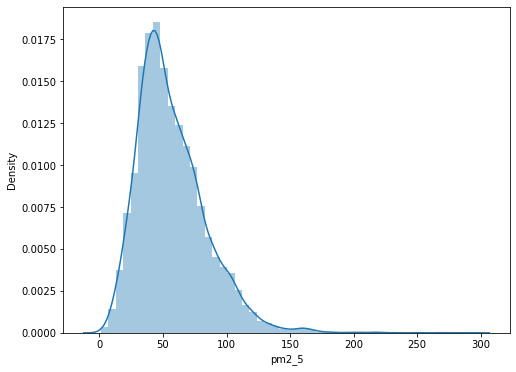

In [677]:
sns.distplot(y_train)

## Algorithm Training and Model Building

In [191]:
X_traintry = X_trainselect.drop(columns=['carbon_null','cloud_null','nitrogen_null','sulphur_null'])
X_testtry = X_testselect.drop(columns=['carbon_null','cloud_null','nitrogen_null','sulphur_null'])
qualityt = quality_testselect.drop(columns=['carbon_null','cloud_null','nitrogen_null','sulphur_null'])

In [192]:
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor

cv = cross_val_score(CatBoostRegressor(),X_traintry,y_train,cv=10,n_jobs=-1,verbose=True,scoring='neg_mean_absolute_error')


# ‘accuracy’
# ‘balanced_accuracy’
# ‘roc_auc’
# ‘f1’
# ‘neg_mean_absolute_error’
# ‘neg_root_mean_squared_error’
# ‘r2’

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.4min finished


In [193]:
cv.mean()

-9.643106888907516

In [183]:
from sklearn.metrics import mean_absolute_error

errcb2=[]
y_pred_totcb2=[]
from sklearn.model_selection import KFold
fold = KFold(n_splits=10)#15#5#10
i=1
for train_index, test_index in fold.split(X_trainselect,y_train):
    X_train_, X_test_ = X_trainselect.iloc[train_index], X_trainselect.iloc[test_index]
    y_train_, y_test_ = y_train.iloc[train_index], y_train.iloc[test_index]
    m2  = CatBoostRegressor()
    m2.fit(X_train_,y_train_,eval_set=[(X_train_,y_train_),(X_test_, y_test_)])
    preds=m2.predict(X_test_)
    print(f'MAE : {mean_absolute_error(y_test_,preds)}')
    errcb2.append((mean_absolute_error(y_test_,preds)))
#     p2 = m2.predict(df_test)
#     y_pred_totcb2.append(p2)
np.mean(errcb2)

Learning rate set to 0.069337
0:	learn: 27.0203480	test: 27.0203480	test1: 25.5552982	best: 25.5552982 (0)	total: 11.1ms	remaining: 11.1s
1:	learn: 26.5332869	test: 26.5332869	test1: 25.0745347	best: 25.0745347 (1)	total: 21.9ms	remaining: 11s
2:	learn: 26.0899639	test: 26.0899639	test1: 24.5914835	best: 24.5914835 (2)	total: 30.2ms	remaining: 10s
3:	learn: 25.7647682	test: 25.7647682	test1: 24.2598254	best: 24.2598254 (3)	total: 41.4ms	remaining: 10.3s
4:	learn: 25.4757115	test: 25.4757115	test1: 23.9429756	best: 23.9429756 (4)	total: 50.7ms	remaining: 10.1s
5:	learn: 25.1914104	test: 25.1914104	test1: 23.6304909	best: 23.6304909 (5)	total: 59.9ms	remaining: 9.92s
6:	learn: 24.8756264	test: 24.8756264	test1: 23.2927176	best: 23.2927176 (6)	total: 70.9ms	remaining: 10.1s
7:	learn: 24.5512191	test: 24.5512191	test1: 22.9312222	best: 22.9312222 (7)	total: 81.4ms	remaining: 10.1s
8:	learn: 24.2634785	test: 24.2634785	test1: 22.6602887	best: 22.6602887 (8)	total: 91.4ms	remaining: 10.1s
9:

76:	learn: 18.2619280	test: 18.2619280	test1: 18.0466068	best: 18.0466068 (76)	total: 741ms	remaining: 8.88s
77:	learn: 18.2235397	test: 18.2235397	test1: 18.0128432	best: 18.0128432 (77)	total: 748ms	remaining: 8.84s
78:	learn: 18.1849011	test: 18.1849011	test1: 17.9843376	best: 17.9843376 (78)	total: 755ms	remaining: 8.8s
79:	learn: 18.1115836	test: 18.1115836	test1: 17.9542528	best: 17.9542528 (79)	total: 764ms	remaining: 8.79s
80:	learn: 18.0796781	test: 18.0796781	test1: 17.9297691	best: 17.9297691 (80)	total: 774ms	remaining: 8.78s
81:	learn: 18.0480328	test: 18.0480328	test1: 17.9237861	best: 17.9237861 (81)	total: 782ms	remaining: 8.75s
82:	learn: 18.0120791	test: 18.0120791	test1: 17.9037413	best: 17.9037413 (82)	total: 790ms	remaining: 8.73s
83:	learn: 17.9777505	test: 17.9777505	test1: 17.8829281	best: 17.8829281 (83)	total: 800ms	remaining: 8.72s
84:	learn: 17.9341822	test: 17.9341822	test1: 17.8657784	best: 17.8657784 (84)	total: 809ms	remaining: 8.71s
85:	learn: 17.905775

158:	learn: 15.3909812	test: 15.3909812	test1: 16.4781602	best: 16.4781602 (158)	total: 1.48s	remaining: 7.81s
159:	learn: 15.3584922	test: 15.3584922	test1: 16.4485008	best: 16.4485008 (159)	total: 1.49s	remaining: 7.81s
160:	learn: 15.3318675	test: 15.3318675	test1: 16.4270632	best: 16.4270632 (160)	total: 1.5s	remaining: 7.79s
161:	learn: 15.3133186	test: 15.3133186	test1: 16.4255124	best: 16.4255124 (161)	total: 1.51s	remaining: 7.79s
162:	learn: 15.2875502	test: 15.2875502	test1: 16.4009764	best: 16.4009764 (162)	total: 1.52s	remaining: 7.79s
163:	learn: 15.2648986	test: 15.2648986	test1: 16.3927188	best: 16.3927188 (163)	total: 1.52s	remaining: 7.78s
164:	learn: 15.2458987	test: 15.2458987	test1: 16.3886173	best: 16.3886173 (164)	total: 1.53s	remaining: 7.77s
165:	learn: 15.2044118	test: 15.2044118	test1: 16.3562911	best: 16.3562911 (165)	total: 1.54s	remaining: 7.75s
166:	learn: 15.1903191	test: 15.1903191	test1: 16.3438834	best: 16.3438834 (166)	total: 1.55s	remaining: 7.74s
16

236:	learn: 13.6696534	test: 13.6696534	test1: 15.5641152	best: 15.5641152 (236)	total: 2.22s	remaining: 7.16s
237:	learn: 13.6479550	test: 13.6479550	test1: 15.5439922	best: 15.5439922 (237)	total: 2.23s	remaining: 7.15s
238:	learn: 13.6293449	test: 13.6293449	test1: 15.5315811	best: 15.5315811 (238)	total: 2.24s	remaining: 7.14s
239:	learn: 13.6147159	test: 13.6147159	test1: 15.5206346	best: 15.5206346 (239)	total: 2.25s	remaining: 7.14s
240:	learn: 13.5997237	test: 13.5997237	test1: 15.5242934	best: 15.5206346 (239)	total: 2.26s	remaining: 7.13s
241:	learn: 13.5707428	test: 13.5707428	test1: 15.5138655	best: 15.5138655 (241)	total: 2.27s	remaining: 7.12s
242:	learn: 13.5580886	test: 13.5580886	test1: 15.5045602	best: 15.5045602 (242)	total: 2.28s	remaining: 7.1s
243:	learn: 13.5434693	test: 13.5434693	test1: 15.5023683	best: 15.5023683 (243)	total: 2.29s	remaining: 7.09s
244:	learn: 13.5324977	test: 13.5324977	test1: 15.5001306	best: 15.5001306 (244)	total: 2.3s	remaining: 7.08s
245

310:	learn: 12.4060053	test: 12.4060053	test1: 15.0325521	best: 15.0325521 (310)	total: 2.95s	remaining: 6.53s
311:	learn: 12.3910082	test: 12.3910082	test1: 15.0186388	best: 15.0186388 (311)	total: 2.96s	remaining: 6.53s
312:	learn: 12.3752779	test: 12.3752779	test1: 15.0116212	best: 15.0116212 (312)	total: 2.97s	remaining: 6.52s
313:	learn: 12.3476339	test: 12.3476339	test1: 15.0021407	best: 15.0021407 (313)	total: 2.98s	remaining: 6.51s
314:	learn: 12.3315593	test: 12.3315593	test1: 15.0007675	best: 15.0007675 (314)	total: 2.99s	remaining: 6.5s
315:	learn: 12.3221177	test: 12.3221177	test1: 14.9995342	best: 14.9995342 (315)	total: 3s	remaining: 6.49s
316:	learn: 12.3073037	test: 12.3073037	test1: 14.9897928	best: 14.9897928 (316)	total: 3.01s	remaining: 6.48s
317:	learn: 12.2965239	test: 12.2965239	test1: 14.9842613	best: 14.9842613 (317)	total: 3.02s	remaining: 6.47s
318:	learn: 12.2847262	test: 12.2847262	test1: 14.9826681	best: 14.9826681 (318)	total: 3.03s	remaining: 6.46s
319:	

391:	learn: 11.3077220	test: 11.3077220	test1: 14.6505926	best: 14.6505926 (391)	total: 3.7s	remaining: 5.73s
392:	learn: 11.2989177	test: 11.2989177	test1: 14.6517169	best: 14.6505926 (391)	total: 3.7s	remaining: 5.72s
393:	learn: 11.2811606	test: 11.2811606	test1: 14.6315899	best: 14.6315899 (393)	total: 3.71s	remaining: 5.71s
394:	learn: 11.2672759	test: 11.2672759	test1: 14.6260633	best: 14.6260633 (394)	total: 3.72s	remaining: 5.7s
395:	learn: 11.2566965	test: 11.2566965	test1: 14.6268942	best: 14.6260633 (394)	total: 3.73s	remaining: 5.69s
396:	learn: 11.2394579	test: 11.2394579	test1: 14.6148818	best: 14.6148818 (396)	total: 3.74s	remaining: 5.68s
397:	learn: 11.2297390	test: 11.2297390	test1: 14.6090365	best: 14.6090365 (397)	total: 3.75s	remaining: 5.67s
398:	learn: 11.2221653	test: 11.2221653	test1: 14.6103609	best: 14.6090365 (397)	total: 3.76s	remaining: 5.66s
399:	learn: 11.2083224	test: 11.2083224	test1: 14.6034989	best: 14.6034989 (399)	total: 3.77s	remaining: 5.65s
400:

480:	learn: 10.3658715	test: 10.3658715	test1: 14.4661952	best: 14.4564565 (474)	total: 4.64s	remaining: 5.01s
481:	learn: 10.3522773	test: 10.3522773	test1: 14.4567192	best: 14.4564565 (474)	total: 4.66s	remaining: 5.01s
482:	learn: 10.3447745	test: 10.3447745	test1: 14.4545718	best: 14.4545718 (482)	total: 4.67s	remaining: 5s
483:	learn: 10.3365442	test: 10.3365442	test1: 14.4542478	best: 14.4542478 (483)	total: 4.68s	remaining: 4.99s
484:	learn: 10.3228294	test: 10.3228294	test1: 14.4487050	best: 14.4487050 (484)	total: 4.69s	remaining: 4.98s
485:	learn: 10.3107895	test: 10.3107895	test1: 14.4479142	best: 14.4479142 (485)	total: 4.7s	remaining: 4.97s
486:	learn: 10.3000179	test: 10.3000179	test1: 14.4440428	best: 14.4440428 (486)	total: 4.71s	remaining: 4.96s
487:	learn: 10.2916786	test: 10.2916786	test1: 14.4383216	best: 14.4383216 (487)	total: 4.72s	remaining: 4.95s
488:	learn: 10.2862184	test: 10.2862184	test1: 14.4356763	best: 14.4356763 (488)	total: 4.72s	remaining: 4.94s
489:	

557:	learn: 9.7004119	test: 9.7004119	test1: 14.3425745	best: 14.3425745 (557)	total: 5.41s	remaining: 4.28s
558:	learn: 9.6881787	test: 9.6881787	test1: 14.3413939	best: 14.3413939 (558)	total: 5.42s	remaining: 4.28s
559:	learn: 9.6762870	test: 9.6762870	test1: 14.3348192	best: 14.3348192 (559)	total: 5.43s	remaining: 4.26s
560:	learn: 9.6691137	test: 9.6691137	test1: 14.3365178	best: 14.3348192 (559)	total: 5.44s	remaining: 4.26s
561:	learn: 9.6581797	test: 9.6581797	test1: 14.3289924	best: 14.3289924 (561)	total: 5.45s	remaining: 4.25s
562:	learn: 9.6499070	test: 9.6499070	test1: 14.3267898	best: 14.3267898 (562)	total: 5.46s	remaining: 4.24s
563:	learn: 9.6411913	test: 9.6411913	test1: 14.3244383	best: 14.3244383 (563)	total: 5.47s	remaining: 4.23s
564:	learn: 9.6363610	test: 9.6363610	test1: 14.3244506	best: 14.3244383 (563)	total: 5.48s	remaining: 4.22s
565:	learn: 9.6303827	test: 9.6303827	test1: 14.3255059	best: 14.3244383 (563)	total: 5.49s	remaining: 4.21s
566:	learn: 9.62008

639:	learn: 9.0950245	test: 9.0950245	test1: 14.1948465	best: 14.1942118 (638)	total: 6.18s	remaining: 3.47s
640:	learn: 9.0841639	test: 9.0841639	test1: 14.1844082	best: 14.1844082 (640)	total: 6.19s	remaining: 3.46s
641:	learn: 9.0778649	test: 9.0778649	test1: 14.1806452	best: 14.1806452 (641)	total: 6.2s	remaining: 3.45s
642:	learn: 9.0706999	test: 9.0706999	test1: 14.1837906	best: 14.1806452 (641)	total: 6.2s	remaining: 3.44s
643:	learn: 9.0641460	test: 9.0641460	test1: 14.1836517	best: 14.1806452 (641)	total: 6.21s	remaining: 3.44s
644:	learn: 9.0590774	test: 9.0590774	test1: 14.1804039	best: 14.1804039 (644)	total: 6.22s	remaining: 3.42s
645:	learn: 9.0531601	test: 9.0531601	test1: 14.1818544	best: 14.1804039 (644)	total: 6.23s	remaining: 3.42s
646:	learn: 9.0478422	test: 9.0478422	test1: 14.1806032	best: 14.1804039 (644)	total: 6.24s	remaining: 3.41s
647:	learn: 9.0378182	test: 9.0378182	test1: 14.1731345	best: 14.1731345 (647)	total: 6.25s	remaining: 3.4s
648:	learn: 9.0268081	

718:	learn: 8.5414028	test: 8.5414028	test1: 14.0608716	best: 14.0608716 (718)	total: 6.93s	remaining: 2.71s
719:	learn: 8.5346008	test: 8.5346008	test1: 14.0588293	best: 14.0588293 (719)	total: 6.94s	remaining: 2.7s
720:	learn: 8.5306105	test: 8.5306105	test1: 14.0582959	best: 14.0582959 (720)	total: 6.95s	remaining: 2.69s
721:	learn: 8.5234646	test: 8.5234646	test1: 14.0556886	best: 14.0556886 (721)	total: 6.96s	remaining: 2.68s
722:	learn: 8.5185276	test: 8.5185276	test1: 14.0547229	best: 14.0547229 (722)	total: 6.96s	remaining: 2.67s
723:	learn: 8.5095510	test: 8.5095510	test1: 14.0513785	best: 14.0513785 (723)	total: 6.97s	remaining: 2.66s
724:	learn: 8.5029821	test: 8.5029821	test1: 14.0458757	best: 14.0458757 (724)	total: 6.98s	remaining: 2.65s
725:	learn: 8.4956822	test: 8.4956822	test1: 14.0451896	best: 14.0451896 (725)	total: 6.99s	remaining: 2.64s
726:	learn: 8.4881580	test: 8.4881580	test1: 14.0454852	best: 14.0451896 (725)	total: 7s	remaining: 2.63s
727:	learn: 8.4814299	t

813:	learn: 7.9734335	test: 7.9734335	test1: 13.9682119	best: 13.9615543 (797)	total: 7.89s	remaining: 1.8s
814:	learn: 7.9681649	test: 7.9681649	test1: 13.9689227	best: 13.9615543 (797)	total: 7.91s	remaining: 1.79s
815:	learn: 7.9630296	test: 7.9630296	test1: 13.9683610	best: 13.9615543 (797)	total: 7.91s	remaining: 1.78s
816:	learn: 7.9570429	test: 7.9570429	test1: 13.9690480	best: 13.9615543 (797)	total: 7.92s	remaining: 1.77s
817:	learn: 7.9524717	test: 7.9524717	test1: 13.9680418	best: 13.9615543 (797)	total: 7.93s	remaining: 1.76s
818:	learn: 7.9477340	test: 7.9477340	test1: 13.9694248	best: 13.9615543 (797)	total: 7.94s	remaining: 1.75s
819:	learn: 7.9424375	test: 7.9424375	test1: 13.9697557	best: 13.9615543 (797)	total: 7.95s	remaining: 1.74s
820:	learn: 7.9385008	test: 7.9385008	test1: 13.9670429	best: 13.9615543 (797)	total: 7.95s	remaining: 1.73s
821:	learn: 7.9259687	test: 7.9259687	test1: 13.9576563	best: 13.9576563 (821)	total: 7.96s	remaining: 1.72s
822:	learn: 7.920252

897:	learn: 7.5303315	test: 7.5303315	test1: 13.9144268	best: 13.9128584 (891)	total: 8.85s	remaining: 1s
898:	learn: 7.5238244	test: 7.5238244	test1: 13.9190332	best: 13.9128584 (891)	total: 8.86s	remaining: 996ms
899:	learn: 7.5206021	test: 7.5206021	test1: 13.9200120	best: 13.9128584 (891)	total: 8.87s	remaining: 986ms
900:	learn: 7.5156322	test: 7.5156322	test1: 13.9203291	best: 13.9128584 (891)	total: 8.89s	remaining: 977ms
901:	learn: 7.5102611	test: 7.5102611	test1: 13.9203005	best: 13.9128584 (891)	total: 8.9s	remaining: 968ms
902:	learn: 7.5050258	test: 7.5050258	test1: 13.9204536	best: 13.9128584 (891)	total: 8.92s	remaining: 958ms
903:	learn: 7.4996903	test: 7.4996903	test1: 13.9197585	best: 13.9128584 (891)	total: 8.94s	remaining: 949ms
904:	learn: 7.4948223	test: 7.4948223	test1: 13.9196371	best: 13.9128584 (891)	total: 8.95s	remaining: 940ms
905:	learn: 7.4899266	test: 7.4899266	test1: 13.9176295	best: 13.9128584 (891)	total: 8.97s	remaining: 931ms
906:	learn: 7.4843539	t

985:	learn: 7.1232080	test: 7.1232080	test1: 13.8695978	best: 13.8695978 (985)	total: 9.8s	remaining: 139ms
986:	learn: 7.1175759	test: 7.1175759	test1: 13.8695526	best: 13.8695526 (986)	total: 9.8s	remaining: 129ms
987:	learn: 7.1146480	test: 7.1146480	test1: 13.8708591	best: 13.8695526 (986)	total: 9.81s	remaining: 119ms
988:	learn: 7.1101307	test: 7.1101307	test1: 13.8644596	best: 13.8644596 (988)	total: 9.83s	remaining: 109ms
989:	learn: 7.1067969	test: 7.1067969	test1: 13.8633191	best: 13.8633191 (989)	total: 9.84s	remaining: 99.4ms
990:	learn: 7.1019595	test: 7.1019595	test1: 13.8654984	best: 13.8633191 (989)	total: 9.85s	remaining: 89.5ms
991:	learn: 7.0976764	test: 7.0976764	test1: 13.8627786	best: 13.8627786 (991)	total: 9.86s	remaining: 79.5ms
992:	learn: 7.0939412	test: 7.0939412	test1: 13.8615765	best: 13.8615765 (992)	total: 9.87s	remaining: 69.6ms
993:	learn: 7.0920042	test: 7.0920042	test1: 13.8624249	best: 13.8615765 (992)	total: 9.88s	remaining: 59.6ms
994:	learn: 7.08

72:	learn: 18.4214218	test: 18.4214218	test1: 17.7825117	best: 17.7825117 (72)	total: 679ms	remaining: 8.63s
73:	learn: 18.3781826	test: 18.3781826	test1: 17.7517086	best: 17.7517086 (73)	total: 690ms	remaining: 8.63s
74:	learn: 18.3417784	test: 18.3417784	test1: 17.7233498	best: 17.7233498 (74)	total: 700ms	remaining: 8.63s
75:	learn: 18.3136540	test: 18.3136540	test1: 17.7159222	best: 17.7159222 (75)	total: 711ms	remaining: 8.65s
76:	learn: 18.2351503	test: 18.2351503	test1: 17.6234202	best: 17.6234202 (76)	total: 719ms	remaining: 8.62s
77:	learn: 18.1989033	test: 18.1989033	test1: 17.5957216	best: 17.5957216 (77)	total: 729ms	remaining: 8.61s
78:	learn: 18.1386382	test: 18.1386382	test1: 17.5205065	best: 17.5205065 (78)	total: 737ms	remaining: 8.59s
79:	learn: 18.0696172	test: 18.0696172	test1: 17.4727773	best: 17.4727773 (79)	total: 745ms	remaining: 8.57s
80:	learn: 18.0320099	test: 18.0320099	test1: 17.4319963	best: 17.4319963 (80)	total: 753ms	remaining: 8.54s
81:	learn: 17.99953

156:	learn: 15.5586149	test: 15.5586149	test1: 15.6381603	best: 15.6289843 (154)	total: 1.44s	remaining: 7.71s
157:	learn: 15.5348202	test: 15.5348202	test1: 15.6213829	best: 15.6213829 (157)	total: 1.44s	remaining: 7.7s
158:	learn: 15.5106858	test: 15.5106858	test1: 15.6153557	best: 15.6153557 (158)	total: 1.45s	remaining: 7.69s
159:	learn: 15.4660938	test: 15.4660938	test1: 15.5745210	best: 15.5745210 (159)	total: 1.46s	remaining: 7.68s
160:	learn: 15.4512676	test: 15.4512676	test1: 15.5725445	best: 15.5725445 (160)	total: 1.47s	remaining: 7.67s
161:	learn: 15.4285227	test: 15.4285227	test1: 15.5703914	best: 15.5703914 (161)	total: 1.48s	remaining: 7.66s
162:	learn: 15.4039862	test: 15.4039862	test1: 15.5592486	best: 15.5592486 (162)	total: 1.49s	remaining: 7.65s
163:	learn: 15.3798074	test: 15.3798074	test1: 15.5534671	best: 15.5534671 (163)	total: 1.5s	remaining: 7.65s
164:	learn: 15.3517563	test: 15.3517563	test1: 15.5488136	best: 15.5488136 (164)	total: 1.51s	remaining: 7.64s
165

234:	learn: 13.8212045	test: 13.8212045	test1: 14.6722202	best: 14.6722202 (234)	total: 2.21s	remaining: 7.19s
235:	learn: 13.7947224	test: 13.7947224	test1: 14.6606236	best: 14.6606236 (235)	total: 2.22s	remaining: 7.18s
236:	learn: 13.7750468	test: 13.7750468	test1: 14.6499060	best: 14.6499060 (236)	total: 2.24s	remaining: 7.2s
237:	learn: 13.7570260	test: 13.7570260	test1: 14.6418435	best: 14.6418435 (237)	total: 2.25s	remaining: 7.21s
238:	learn: 13.7389190	test: 13.7389190	test1: 14.6324934	best: 14.6324934 (238)	total: 2.27s	remaining: 7.23s
239:	learn: 13.7102311	test: 13.7102311	test1: 14.6007195	best: 14.6007195 (239)	total: 2.28s	remaining: 7.21s
240:	learn: 13.6872464	test: 13.6872464	test1: 14.6019836	best: 14.6007195 (239)	total: 2.29s	remaining: 7.2s
241:	learn: 13.6678592	test: 13.6678592	test1: 14.5931091	best: 14.5931091 (241)	total: 2.29s	remaining: 7.19s
242:	learn: 13.6498527	test: 13.6498527	test1: 14.5747758	best: 14.5747758 (242)	total: 2.3s	remaining: 7.17s
243:

312:	learn: 12.4949408	test: 12.4949408	test1: 14.0060283	best: 14.0022463 (307)	total: 2.98s	remaining: 6.54s
313:	learn: 12.4752909	test: 12.4752909	test1: 14.0038594	best: 14.0022463 (307)	total: 2.99s	remaining: 6.54s
314:	learn: 12.4633372	test: 12.4633372	test1: 14.0052728	best: 14.0022463 (307)	total: 3s	remaining: 6.53s
315:	learn: 12.4513497	test: 12.4513497	test1: 13.9978724	best: 13.9978724 (315)	total: 3.01s	remaining: 6.52s
316:	learn: 12.4392553	test: 12.4392553	test1: 13.9875520	best: 13.9875520 (316)	total: 3.02s	remaining: 6.51s
317:	learn: 12.4252769	test: 12.4252769	test1: 13.9850332	best: 13.9850332 (317)	total: 3.03s	remaining: 6.49s
318:	learn: 12.4086882	test: 12.4086882	test1: 13.9772474	best: 13.9772474 (318)	total: 3.04s	remaining: 6.48s
319:	learn: 12.3924573	test: 12.3924573	test1: 13.9725370	best: 13.9725370 (319)	total: 3.05s	remaining: 6.47s
320:	learn: 12.3768630	test: 12.3768630	test1: 13.9679524	best: 13.9679524 (320)	total: 3.06s	remaining: 6.46s
321:

392:	learn: 11.4599951	test: 11.4599951	test1: 13.6441159	best: 13.6416743 (391)	total: 3.75s	remaining: 5.79s
393:	learn: 11.4464843	test: 11.4464843	test1: 13.6416166	best: 13.6416166 (393)	total: 3.76s	remaining: 5.78s
394:	learn: 11.4345709	test: 11.4345709	test1: 13.6363546	best: 13.6363546 (394)	total: 3.77s	remaining: 5.77s
395:	learn: 11.4224209	test: 11.4224209	test1: 13.6249001	best: 13.6249001 (395)	total: 3.78s	remaining: 5.76s
396:	learn: 11.4136803	test: 11.4136803	test1: 13.6264494	best: 13.6249001 (395)	total: 3.79s	remaining: 5.75s
397:	learn: 11.4043318	test: 11.4043318	test1: 13.6231358	best: 13.6231358 (397)	total: 3.8s	remaining: 5.74s
398:	learn: 11.3922538	test: 11.3922538	test1: 13.6206011	best: 13.6206011 (398)	total: 3.81s	remaining: 5.74s
399:	learn: 11.3727040	test: 11.3727040	test1: 13.5973648	best: 13.5973648 (399)	total: 3.82s	remaining: 5.73s
400:	learn: 11.3593846	test: 11.3593846	test1: 13.5976138	best: 13.5973648 (399)	total: 3.83s	remaining: 5.72s
40

476:	learn: 10.5790977	test: 10.5790977	test1: 13.2985316	best: 13.2985316 (476)	total: 4.5s	remaining: 4.94s
477:	learn: 10.5713450	test: 10.5713450	test1: 13.2972211	best: 13.2972211 (477)	total: 4.52s	remaining: 4.93s
478:	learn: 10.5612234	test: 10.5612234	test1: 13.2969698	best: 13.2969698 (478)	total: 4.53s	remaining: 4.92s
479:	learn: 10.5453520	test: 10.5453520	test1: 13.2938673	best: 13.2938673 (479)	total: 4.54s	remaining: 4.91s
480:	learn: 10.5362326	test: 10.5362326	test1: 13.2919497	best: 13.2919497 (480)	total: 4.55s	remaining: 4.91s
481:	learn: 10.5248078	test: 10.5248078	test1: 13.2854512	best: 13.2854512 (481)	total: 4.56s	remaining: 4.9s
482:	learn: 10.5186633	test: 10.5186633	test1: 13.2852082	best: 13.2852082 (482)	total: 4.57s	remaining: 4.89s
483:	learn: 10.5077828	test: 10.5077828	test1: 13.2779123	best: 13.2779123 (483)	total: 4.57s	remaining: 4.88s
484:	learn: 10.5025019	test: 10.5025019	test1: 13.2795585	best: 13.2779123 (483)	total: 4.58s	remaining: 4.87s
485

554:	learn: 9.8892247	test: 9.8892247	test1: 13.0809880	best: 13.0791560 (553)	total: 5.24s	remaining: 4.2s
555:	learn: 9.8752413	test: 9.8752413	test1: 13.0784861	best: 13.0784861 (555)	total: 5.25s	remaining: 4.19s
556:	learn: 9.8686588	test: 9.8686588	test1: 13.0747452	best: 13.0747452 (556)	total: 5.26s	remaining: 4.18s
557:	learn: 9.8611091	test: 9.8611091	test1: 13.0748716	best: 13.0747452 (556)	total: 5.26s	remaining: 4.17s
558:	learn: 9.8535402	test: 9.8535402	test1: 13.0718002	best: 13.0718002 (558)	total: 5.28s	remaining: 4.16s
559:	learn: 9.8454198	test: 9.8454198	test1: 13.0691492	best: 13.0691492 (559)	total: 5.29s	remaining: 4.15s
560:	learn: 9.8372855	test: 9.8372855	test1: 13.0704298	best: 13.0691492 (559)	total: 5.3s	remaining: 4.14s
561:	learn: 9.8291856	test: 9.8291856	test1: 13.0620450	best: 13.0620450 (561)	total: 5.3s	remaining: 4.13s
562:	learn: 9.8207429	test: 9.8207429	test1: 13.0621279	best: 13.0620450 (561)	total: 5.32s	remaining: 4.13s
563:	learn: 9.8125896	

636:	learn: 9.2412428	test: 9.2412428	test1: 12.8718432	best: 12.8718432 (636)	total: 5.98s	remaining: 3.4s
637:	learn: 9.2352912	test: 9.2352912	test1: 12.8722047	best: 12.8718432 (636)	total: 5.99s	remaining: 3.4s
638:	learn: 9.2304918	test: 9.2304918	test1: 12.8731429	best: 12.8718432 (636)	total: 5.99s	remaining: 3.39s
639:	learn: 9.2249218	test: 9.2249218	test1: 12.8731602	best: 12.8718432 (636)	total: 6s	remaining: 3.38s
640:	learn: 9.2172151	test: 9.2172151	test1: 12.8757253	best: 12.8718432 (636)	total: 6.01s	remaining: 3.37s
641:	learn: 9.2090769	test: 9.2090769	test1: 12.8669234	best: 12.8669234 (641)	total: 6.02s	remaining: 3.36s
642:	learn: 9.2021278	test: 9.2021278	test1: 12.8635603	best: 12.8635603 (642)	total: 6.03s	remaining: 3.35s
643:	learn: 9.1972632	test: 9.1972632	test1: 12.8636925	best: 12.8635603 (642)	total: 6.04s	remaining: 3.34s
644:	learn: 9.1921140	test: 9.1921140	test1: 12.8652349	best: 12.8635603 (642)	total: 6.05s	remaining: 3.33s
645:	learn: 9.1838532	te

720:	learn: 8.6803129	test: 8.6803129	test1: 12.7504964	best: 12.7449736 (717)	total: 6.93s	remaining: 2.68s
721:	learn: 8.6720296	test: 8.6720296	test1: 12.7403633	best: 12.7403633 (721)	total: 6.94s	remaining: 2.67s
722:	learn: 8.6666208	test: 8.6666208	test1: 12.7398448	best: 12.7398448 (722)	total: 6.95s	remaining: 2.66s
723:	learn: 8.6595781	test: 8.6595781	test1: 12.7388444	best: 12.7388444 (723)	total: 6.97s	remaining: 2.65s
724:	learn: 8.6536046	test: 8.6536046	test1: 12.7379439	best: 12.7379439 (724)	total: 6.97s	remaining: 2.65s
725:	learn: 8.6494043	test: 8.6494043	test1: 12.7372808	best: 12.7372808 (725)	total: 6.98s	remaining: 2.63s
726:	learn: 8.6436895	test: 8.6436895	test1: 12.7367939	best: 12.7367939 (726)	total: 6.99s	remaining: 2.62s
727:	learn: 8.6401625	test: 8.6401625	test1: 12.7373903	best: 12.7367939 (726)	total: 7s	remaining: 2.61s
728:	learn: 8.6356837	test: 8.6356837	test1: 12.7389345	best: 12.7367939 (726)	total: 7s	remaining: 2.6s
729:	learn: 8.6303120	test

807:	learn: 8.1689983	test: 8.1689983	test1: 12.6324947	best: 12.6324947 (807)	total: 7.87s	remaining: 1.87s
808:	learn: 8.1635599	test: 8.1635599	test1: 12.6312252	best: 12.6312252 (808)	total: 7.88s	remaining: 1.86s
809:	learn: 8.1595423	test: 8.1595423	test1: 12.6293327	best: 12.6293327 (809)	total: 7.89s	remaining: 1.85s
810:	learn: 8.1545156	test: 8.1545156	test1: 12.6287194	best: 12.6287194 (810)	total: 7.91s	remaining: 1.84s
811:	learn: 8.1462532	test: 8.1462532	test1: 12.6318714	best: 12.6287194 (810)	total: 7.92s	remaining: 1.83s
812:	learn: 8.1415102	test: 8.1415102	test1: 12.6302413	best: 12.6287194 (810)	total: 7.94s	remaining: 1.83s
813:	learn: 8.1369852	test: 8.1369852	test1: 12.6287208	best: 12.6287194 (810)	total: 7.95s	remaining: 1.82s
814:	learn: 8.1300791	test: 8.1300791	test1: 12.6262405	best: 12.6262405 (814)	total: 7.96s	remaining: 1.81s
815:	learn: 8.1220867	test: 8.1220867	test1: 12.6289813	best: 12.6262405 (814)	total: 7.97s	remaining: 1.8s
816:	learn: 8.117003

898:	learn: 7.6876255	test: 7.6876255	test1: 12.5638482	best: 12.5621276 (874)	total: 8.82s	remaining: 992ms
899:	learn: 7.6822754	test: 7.6822754	test1: 12.5592511	best: 12.5592511 (899)	total: 8.84s	remaining: 982ms
900:	learn: 7.6782253	test: 7.6782253	test1: 12.5592721	best: 12.5592511 (899)	total: 8.86s	remaining: 973ms
901:	learn: 7.6746694	test: 7.6746694	test1: 12.5597993	best: 12.5592511 (899)	total: 8.88s	remaining: 964ms
902:	learn: 7.6707964	test: 7.6707964	test1: 12.5606634	best: 12.5592511 (899)	total: 8.9s	remaining: 956ms
903:	learn: 7.6657873	test: 7.6657873	test1: 12.5576934	best: 12.5576934 (903)	total: 8.92s	remaining: 947ms
904:	learn: 7.6595494	test: 7.6595494	test1: 12.5585565	best: 12.5576934 (903)	total: 8.93s	remaining: 937ms
905:	learn: 7.6545986	test: 7.6545986	test1: 12.5580647	best: 12.5576934 (903)	total: 8.94s	remaining: 927ms
906:	learn: 7.6504794	test: 7.6504794	test1: 12.5559193	best: 12.5559193 (906)	total: 8.94s	remaining: 917ms
907:	learn: 7.644477

985:	learn: 7.2882893	test: 7.2882893	test1: 12.5087636	best: 12.5049695 (944)	total: 9.76s	remaining: 139ms
986:	learn: 7.2850976	test: 7.2850976	test1: 12.5100233	best: 12.5049695 (944)	total: 9.76s	remaining: 129ms
987:	learn: 7.2797304	test: 7.2797304	test1: 12.5057075	best: 12.5049695 (944)	total: 9.77s	remaining: 119ms
988:	learn: 7.2764387	test: 7.2764387	test1: 12.5070502	best: 12.5049695 (944)	total: 9.78s	remaining: 109ms
989:	learn: 7.2726165	test: 7.2726165	test1: 12.5053207	best: 12.5049695 (944)	total: 9.79s	remaining: 98.9ms
990:	learn: 7.2674460	test: 7.2674460	test1: 12.5031931	best: 12.5031931 (990)	total: 9.79s	remaining: 89ms
991:	learn: 7.2632343	test: 7.2632343	test1: 12.5031133	best: 12.5031133 (991)	total: 9.8s	remaining: 79.1ms
992:	learn: 7.2600140	test: 7.2600140	test1: 12.5016775	best: 12.5016775 (992)	total: 9.81s	remaining: 69.2ms
993:	learn: 7.2570351	test: 7.2570351	test1: 12.5041901	best: 12.5016775 (992)	total: 9.82s	remaining: 59.3ms
994:	learn: 7.252

63:	learn: 18.8877976	test: 18.8877976	test1: 18.3610312	best: 18.3610312 (63)	total: 568ms	remaining: 8.3s
64:	learn: 18.8440328	test: 18.8440328	test1: 18.3118124	best: 18.3118124 (64)	total: 591ms	remaining: 8.51s
65:	learn: 18.8044955	test: 18.8044955	test1: 18.2936547	best: 18.2936547 (65)	total: 601ms	remaining: 8.5s
66:	learn: 18.7730073	test: 18.7730073	test1: 18.2857905	best: 18.2857905 (66)	total: 611ms	remaining: 8.51s
67:	learn: 18.7480990	test: 18.7480990	test1: 18.2783751	best: 18.2783751 (67)	total: 625ms	remaining: 8.57s
68:	learn: 18.7144197	test: 18.7144197	test1: 18.2618301	best: 18.2618301 (68)	total: 643ms	remaining: 8.67s
69:	learn: 18.6722604	test: 18.6722604	test1: 18.2163220	best: 18.2163220 (69)	total: 664ms	remaining: 8.83s
70:	learn: 18.6377922	test: 18.6377922	test1: 18.1982394	best: 18.1982394 (70)	total: 681ms	remaining: 8.9s
71:	learn: 18.6152698	test: 18.6152698	test1: 18.1822295	best: 18.1822295 (71)	total: 692ms	remaining: 8.92s
72:	learn: 18.5882973	

149:	learn: 15.8284415	test: 15.8284415	test1: 16.0517296	best: 16.0517296 (149)	total: 1.53s	remaining: 8.66s
150:	learn: 15.8004820	test: 15.8004820	test1: 16.0156772	best: 16.0156772 (150)	total: 1.54s	remaining: 8.65s
151:	learn: 15.7580478	test: 15.7580478	test1: 15.9985178	best: 15.9985178 (151)	total: 1.55s	remaining: 8.63s
152:	learn: 15.7145471	test: 15.7145471	test1: 15.9770291	best: 15.9770291 (152)	total: 1.56s	remaining: 8.62s
153:	learn: 15.6906935	test: 15.6906935	test1: 15.9561813	best: 15.9561813 (153)	total: 1.56s	remaining: 8.59s
154:	learn: 15.6581231	test: 15.6581231	test1: 15.9201233	best: 15.9201233 (154)	total: 1.57s	remaining: 8.58s
155:	learn: 15.6300582	test: 15.6300582	test1: 15.9023144	best: 15.9023144 (155)	total: 1.59s	remaining: 8.63s
156:	learn: 15.6100362	test: 15.6100362	test1: 15.8934613	best: 15.8934613 (156)	total: 1.61s	remaining: 8.65s
157:	learn: 15.5606814	test: 15.5606814	test1: 15.8479831	best: 15.8479831 (157)	total: 1.62s	remaining: 8.65s
1

227:	learn: 13.9238954	test: 13.9238954	test1: 14.7981778	best: 14.7981778 (227)	total: 2.28s	remaining: 7.71s
228:	learn: 13.9100841	test: 13.9100841	test1: 14.7969818	best: 14.7969818 (228)	total: 2.29s	remaining: 7.7s
229:	learn: 13.8774157	test: 13.8774157	test1: 14.7748127	best: 14.7748127 (229)	total: 2.3s	remaining: 7.69s
230:	learn: 13.8481069	test: 13.8481069	test1: 14.7500196	best: 14.7500196 (230)	total: 2.31s	remaining: 7.68s
231:	learn: 13.8328645	test: 13.8328645	test1: 14.7301760	best: 14.7301760 (231)	total: 2.31s	remaining: 7.67s
232:	learn: 13.8193687	test: 13.8193687	test1: 14.7384704	best: 14.7301760 (231)	total: 2.33s	remaining: 7.66s
233:	learn: 13.7882200	test: 13.7882200	test1: 14.7305637	best: 14.7301760 (231)	total: 2.34s	remaining: 7.65s
234:	learn: 13.7723911	test: 13.7723911	test1: 14.7227631	best: 14.7227631 (234)	total: 2.35s	remaining: 7.64s
235:	learn: 13.7605684	test: 13.7605684	test1: 14.7223931	best: 14.7223931 (235)	total: 2.36s	remaining: 7.63s
236

302:	learn: 12.6382205	test: 12.6382205	test1: 14.1819380	best: 14.1819380 (302)	total: 3s	remaining: 6.91s
303:	learn: 12.6184759	test: 12.6184759	test1: 14.1669127	best: 14.1669127 (303)	total: 3.01s	remaining: 6.89s
304:	learn: 12.6006936	test: 12.6006936	test1: 14.1562967	best: 14.1562967 (304)	total: 3.02s	remaining: 6.88s
305:	learn: 12.5769435	test: 12.5769435	test1: 14.1538542	best: 14.1538542 (305)	total: 3.03s	remaining: 6.87s
306:	learn: 12.5570537	test: 12.5570537	test1: 14.1331394	best: 14.1331394 (306)	total: 3.04s	remaining: 6.86s
307:	learn: 12.5407980	test: 12.5407980	test1: 14.1320437	best: 14.1320437 (307)	total: 3.05s	remaining: 6.85s
308:	learn: 12.5311041	test: 12.5311041	test1: 14.1316350	best: 14.1316350 (308)	total: 3.06s	remaining: 6.84s
309:	learn: 12.5186146	test: 12.5186146	test1: 14.1283748	best: 14.1283748 (309)	total: 3.07s	remaining: 6.82s
310:	learn: 12.5088486	test: 12.5088486	test1: 14.1287332	best: 14.1283748 (309)	total: 3.07s	remaining: 6.81s
311:

380:	learn: 11.5734267	test: 11.5734267	test1: 13.8381000	best: 13.8381000 (380)	total: 3.73s	remaining: 6.06s
381:	learn: 11.5576454	test: 11.5576454	test1: 13.8205133	best: 13.8205133 (381)	total: 3.74s	remaining: 6.05s
382:	learn: 11.5466885	test: 11.5466885	test1: 13.8127508	best: 13.8127508 (382)	total: 3.75s	remaining: 6.04s
383:	learn: 11.5363377	test: 11.5363377	test1: 13.8092739	best: 13.8092739 (383)	total: 3.76s	remaining: 6.03s
384:	learn: 11.5254577	test: 11.5254577	test1: 13.8033761	best: 13.8033761 (384)	total: 3.77s	remaining: 6.02s
385:	learn: 11.5175669	test: 11.5175669	test1: 13.7972030	best: 13.7972030 (385)	total: 3.78s	remaining: 6.01s
386:	learn: 11.5008590	test: 11.5008590	test1: 13.7876319	best: 13.7876319 (386)	total: 3.79s	remaining: 6s
387:	learn: 11.4906603	test: 11.4906603	test1: 13.7865397	best: 13.7865397 (387)	total: 3.8s	remaining: 5.99s
388:	learn: 11.4785818	test: 11.4785818	test1: 13.7805871	best: 13.7805871 (388)	total: 3.81s	remaining: 5.98s
389:	

457:	learn: 10.6737309	test: 10.6737309	test1: 13.4666687	best: 13.4666687 (457)	total: 4.46s	remaining: 5.28s
458:	learn: 10.6644683	test: 10.6644683	test1: 13.4734453	best: 13.4666687 (457)	total: 4.47s	remaining: 5.27s
459:	learn: 10.6532997	test: 10.6532997	test1: 13.4689422	best: 13.4666687 (457)	total: 4.48s	remaining: 5.26s
460:	learn: 10.6452172	test: 10.6452172	test1: 13.4666671	best: 13.4666671 (460)	total: 4.49s	remaining: 5.25s
461:	learn: 10.6403740	test: 10.6403740	test1: 13.4683439	best: 13.4666671 (460)	total: 4.5s	remaining: 5.24s
462:	learn: 10.6230913	test: 10.6230913	test1: 13.4544670	best: 13.4544670 (462)	total: 4.51s	remaining: 5.23s
463:	learn: 10.6156180	test: 10.6156180	test1: 13.4541889	best: 13.4541889 (463)	total: 4.51s	remaining: 5.21s
464:	learn: 10.6048458	test: 10.6048458	test1: 13.4616007	best: 13.4541889 (463)	total: 4.52s	remaining: 5.2s
465:	learn: 10.5969712	test: 10.5969712	test1: 13.4602475	best: 13.4541889 (463)	total: 4.53s	remaining: 5.19s
466

537:	learn: 9.9673435	test: 9.9673435	test1: 13.3213984	best: 13.3185378 (536)	total: 5.22s	remaining: 4.48s
538:	learn: 9.9585448	test: 9.9585448	test1: 13.3210570	best: 13.3185378 (536)	total: 5.23s	remaining: 4.47s
539:	learn: 9.9517725	test: 9.9517725	test1: 13.3222821	best: 13.3185378 (536)	total: 5.24s	remaining: 4.46s
540:	learn: 9.9417431	test: 9.9417431	test1: 13.3195457	best: 13.3185378 (536)	total: 5.25s	remaining: 4.45s
541:	learn: 9.9346964	test: 9.9346964	test1: 13.3169160	best: 13.3169160 (541)	total: 5.25s	remaining: 4.44s
542:	learn: 9.9256709	test: 9.9256709	test1: 13.3161244	best: 13.3161244 (542)	total: 5.26s	remaining: 4.43s
543:	learn: 9.9178428	test: 9.9178428	test1: 13.3151212	best: 13.3151212 (543)	total: 5.27s	remaining: 4.42s
544:	learn: 9.9003086	test: 9.9003086	test1: 13.3064410	best: 13.3064410 (544)	total: 5.28s	remaining: 4.41s
545:	learn: 9.8917921	test: 9.8917921	test1: 13.3068158	best: 13.3064410 (544)	total: 5.29s	remaining: 4.4s
546:	learn: 9.881903

630:	learn: 9.2007503	test: 9.2007503	test1: 13.1410827	best: 13.1382328 (627)	total: 6.14s	remaining: 3.59s
631:	learn: 9.1914702	test: 9.1914702	test1: 13.1298474	best: 13.1298474 (631)	total: 6.15s	remaining: 3.58s
632:	learn: 9.1868873	test: 9.1868873	test1: 13.1311820	best: 13.1298474 (631)	total: 6.16s	remaining: 3.57s
633:	learn: 9.1809017	test: 9.1809017	test1: 13.1309499	best: 13.1298474 (631)	total: 6.17s	remaining: 3.56s
634:	learn: 9.1749414	test: 9.1749414	test1: 13.1323394	best: 13.1298474 (631)	total: 6.18s	remaining: 3.55s
635:	learn: 9.1662937	test: 9.1662937	test1: 13.1314176	best: 13.1298474 (631)	total: 6.19s	remaining: 3.54s
636:	learn: 9.1593357	test: 9.1593357	test1: 13.1259752	best: 13.1259752 (636)	total: 6.2s	remaining: 3.53s
637:	learn: 9.1537835	test: 9.1537835	test1: 13.1227062	best: 13.1227062 (637)	total: 6.21s	remaining: 3.52s
638:	learn: 9.1461123	test: 9.1461123	test1: 13.1238238	best: 13.1227062 (637)	total: 6.22s	remaining: 3.51s
639:	learn: 9.135736

708:	learn: 8.6806369	test: 8.6806369	test1: 13.0476802	best: 13.0476802 (708)	total: 6.87s	remaining: 2.82s
709:	learn: 8.6732157	test: 8.6732157	test1: 13.0452686	best: 13.0452686 (709)	total: 6.88s	remaining: 2.81s
710:	learn: 8.6642976	test: 8.6642976	test1: 13.0439357	best: 13.0439357 (710)	total: 6.89s	remaining: 2.8s
711:	learn: 8.6581722	test: 8.6581722	test1: 13.0414670	best: 13.0414670 (711)	total: 6.9s	remaining: 2.79s
712:	learn: 8.6534989	test: 8.6534989	test1: 13.0425234	best: 13.0414670 (711)	total: 6.91s	remaining: 2.78s
713:	learn: 8.6479715	test: 8.6479715	test1: 13.0450434	best: 13.0414670 (711)	total: 6.92s	remaining: 2.77s
714:	learn: 8.6374578	test: 8.6374578	test1: 13.0314054	best: 13.0314054 (714)	total: 6.93s	remaining: 2.76s
715:	learn: 8.6322407	test: 8.6322407	test1: 13.0293649	best: 13.0293649 (715)	total: 6.95s	remaining: 2.75s
716:	learn: 8.6255778	test: 8.6255778	test1: 13.0252961	best: 13.0252961 (716)	total: 6.95s	remaining: 2.74s
717:	learn: 8.6220397

784:	learn: 8.2090735	test: 8.2090735	test1: 12.9379172	best: 12.9373847 (778)	total: 7.62s	remaining: 2.09s
785:	learn: 8.2022197	test: 8.2022197	test1: 12.9378204	best: 12.9373847 (778)	total: 7.63s	remaining: 2.08s
786:	learn: 8.1954470	test: 8.1954470	test1: 12.9387767	best: 12.9373847 (778)	total: 7.64s	remaining: 2.07s
787:	learn: 8.1918252	test: 8.1918252	test1: 12.9382130	best: 12.9373847 (778)	total: 7.65s	remaining: 2.06s
788:	learn: 8.1852072	test: 8.1852072	test1: 12.9380889	best: 12.9373847 (778)	total: 7.66s	remaining: 2.05s
789:	learn: 8.1787169	test: 8.1787169	test1: 12.9364989	best: 12.9364989 (789)	total: 7.67s	remaining: 2.04s
790:	learn: 8.1695756	test: 8.1695756	test1: 12.9329248	best: 12.9329248 (790)	total: 7.68s	remaining: 2.03s
791:	learn: 8.1636983	test: 8.1636983	test1: 12.9399769	best: 12.9329248 (790)	total: 7.69s	remaining: 2.02s
792:	learn: 8.1584785	test: 8.1584785	test1: 12.9390385	best: 12.9329248 (790)	total: 7.7s	remaining: 2.01s
793:	learn: 8.154892

862:	learn: 7.7750230	test: 7.7750230	test1: 12.8935445	best: 12.8935445 (862)	total: 8.36s	remaining: 1.33s
863:	learn: 7.7710519	test: 7.7710519	test1: 12.8948974	best: 12.8935445 (862)	total: 8.37s	remaining: 1.32s
864:	learn: 7.7657679	test: 7.7657679	test1: 12.8965648	best: 12.8935445 (862)	total: 8.38s	remaining: 1.31s
865:	learn: 7.7608107	test: 7.7608107	test1: 12.8929093	best: 12.8929093 (865)	total: 8.39s	remaining: 1.3s
866:	learn: 7.7576571	test: 7.7576571	test1: 12.8916306	best: 12.8916306 (866)	total: 8.4s	remaining: 1.29s
867:	learn: 7.7530978	test: 7.7530978	test1: 12.8880952	best: 12.8880952 (867)	total: 8.41s	remaining: 1.28s
868:	learn: 7.7482312	test: 7.7482312	test1: 12.8897521	best: 12.8880952 (867)	total: 8.41s	remaining: 1.27s
869:	learn: 7.7428656	test: 7.7428656	test1: 12.8887786	best: 12.8880952 (867)	total: 8.42s	remaining: 1.26s
870:	learn: 7.7385848	test: 7.7385848	test1: 12.8873659	best: 12.8873659 (870)	total: 8.43s	remaining: 1.25s
871:	learn: 7.7341812

941:	learn: 7.3903007	test: 7.3903007	test1: 12.8489387	best: 12.8489387 (941)	total: 9.11s	remaining: 561ms
942:	learn: 7.3847213	test: 7.3847213	test1: 12.8441024	best: 12.8441024 (942)	total: 9.11s	remaining: 551ms
943:	learn: 7.3810566	test: 7.3810566	test1: 12.8423722	best: 12.8423722 (943)	total: 9.12s	remaining: 541ms
944:	learn: 7.3757814	test: 7.3757814	test1: 12.8392668	best: 12.8392668 (944)	total: 9.13s	remaining: 532ms
945:	learn: 7.3725252	test: 7.3725252	test1: 12.8382240	best: 12.8382240 (945)	total: 9.14s	remaining: 522ms
946:	learn: 7.3687854	test: 7.3687854	test1: 12.8351250	best: 12.8351250 (946)	total: 9.15s	remaining: 512ms
947:	learn: 7.3618863	test: 7.3618863	test1: 12.8368185	best: 12.8351250 (946)	total: 9.16s	remaining: 503ms
948:	learn: 7.3584471	test: 7.3584471	test1: 12.8384914	best: 12.8351250 (946)	total: 9.17s	remaining: 493ms
949:	learn: 7.3544483	test: 7.3544483	test1: 12.8412393	best: 12.8351250 (946)	total: 9.18s	remaining: 483ms
950:	learn: 7.35116

25:	learn: 21.3408392	test: 21.3408392	test1: 20.6636776	best: 20.6636776 (25)	total: 245ms	remaining: 9.19s
26:	learn: 21.2138546	test: 21.2138546	test1: 20.5428154	best: 20.5428154 (26)	total: 255ms	remaining: 9.19s
27:	learn: 21.1049493	test: 21.1049493	test1: 20.4509072	best: 20.4509072 (27)	total: 265ms	remaining: 9.21s
28:	learn: 20.9737155	test: 20.9737155	test1: 20.3165717	best: 20.3165717 (28)	total: 274ms	remaining: 9.18s
29:	learn: 20.8579681	test: 20.8579681	test1: 20.2016211	best: 20.2016211 (29)	total: 284ms	remaining: 9.17s
30:	learn: 20.7714267	test: 20.7714267	test1: 20.1365147	best: 20.1365147 (30)	total: 292ms	remaining: 9.12s
31:	learn: 20.6554548	test: 20.6554548	test1: 20.0216080	best: 20.0216080 (31)	total: 301ms	remaining: 9.11s
32:	learn: 20.5383321	test: 20.5383321	test1: 19.8866588	best: 19.8866588 (32)	total: 311ms	remaining: 9.11s
33:	learn: 20.4721730	test: 20.4721730	test1: 19.8417722	best: 19.8417722 (33)	total: 319ms	remaining: 9.07s
34:	learn: 20.40304

104:	learn: 17.2912132	test: 17.2912132	test1: 17.6181148	best: 17.6181148 (104)	total: 1s	remaining: 8.53s
105:	learn: 17.2590869	test: 17.2590869	test1: 17.5978665	best: 17.5978665 (105)	total: 1.01s	remaining: 8.52s
106:	learn: 17.2072578	test: 17.2072578	test1: 17.5583551	best: 17.5583551 (106)	total: 1.02s	remaining: 8.5s
107:	learn: 17.1676096	test: 17.1676096	test1: 17.5166317	best: 17.5166317 (107)	total: 1.03s	remaining: 8.51s
108:	learn: 17.1081663	test: 17.1081663	test1: 17.4950369	best: 17.4950369 (108)	total: 1.04s	remaining: 8.51s
109:	learn: 17.0670628	test: 17.0670628	test1: 17.4670545	best: 17.4670545 (109)	total: 1.05s	remaining: 8.49s
110:	learn: 17.0474350	test: 17.0474350	test1: 17.4584737	best: 17.4584737 (110)	total: 1.06s	remaining: 8.47s
111:	learn: 17.0136445	test: 17.0136445	test1: 17.4353768	best: 17.4353768 (111)	total: 1.07s	remaining: 8.47s
112:	learn: 16.9890024	test: 16.9890024	test1: 17.4244989	best: 17.4244989 (112)	total: 1.08s	remaining: 8.46s
113:	

185:	learn: 14.6957171	test: 14.6957171	test1: 15.8969052	best: 15.8969052 (185)	total: 1.74s	remaining: 7.6s
186:	learn: 14.6736577	test: 14.6736577	test1: 15.8857163	best: 15.8857163 (186)	total: 1.75s	remaining: 7.59s
187:	learn: 14.6546919	test: 14.6546919	test1: 15.8704546	best: 15.8704546 (187)	total: 1.75s	remaining: 7.58s
188:	learn: 14.6362509	test: 14.6362509	test1: 15.8676891	best: 15.8676891 (188)	total: 1.77s	remaining: 7.58s
189:	learn: 14.6141147	test: 14.6141147	test1: 15.8511021	best: 15.8511021 (189)	total: 1.77s	remaining: 7.57s
190:	learn: 14.5798994	test: 14.5798994	test1: 15.8169530	best: 15.8169530 (190)	total: 1.78s	remaining: 7.56s
191:	learn: 14.5659622	test: 14.5659622	test1: 15.8157764	best: 15.8157764 (191)	total: 1.79s	remaining: 7.55s
192:	learn: 14.5477233	test: 14.5477233	test1: 15.8074327	best: 15.8074327 (192)	total: 1.82s	remaining: 7.6s
193:	learn: 14.5139642	test: 14.5139642	test1: 15.7784552	best: 15.7784552 (193)	total: 1.83s	remaining: 7.59s
194

264:	learn: 13.1917934	test: 13.1917934	test1: 15.1142670	best: 15.1142670 (264)	total: 2.5s	remaining: 6.94s
265:	learn: 13.1649533	test: 13.1649533	test1: 15.0956703	best: 15.0956703 (265)	total: 2.51s	remaining: 6.93s
266:	learn: 13.1520680	test: 13.1520680	test1: 15.0896858	best: 15.0896858 (266)	total: 2.52s	remaining: 6.92s
267:	learn: 13.1286688	test: 13.1286688	test1: 15.0735810	best: 15.0735810 (267)	total: 2.53s	remaining: 6.91s
268:	learn: 13.1141700	test: 13.1141700	test1: 15.0671084	best: 15.0671084 (268)	total: 2.54s	remaining: 6.9s
269:	learn: 13.1048092	test: 13.1048092	test1: 15.0478618	best: 15.0478618 (269)	total: 2.55s	remaining: 6.89s
270:	learn: 13.0876945	test: 13.0876945	test1: 15.0401845	best: 15.0401845 (270)	total: 2.56s	remaining: 6.88s
271:	learn: 13.0634009	test: 13.0634009	test1: 15.0354519	best: 15.0354519 (271)	total: 2.57s	remaining: 6.87s
272:	learn: 13.0523992	test: 13.0523992	test1: 15.0367814	best: 15.0354519 (271)	total: 2.58s	remaining: 6.86s
273

344:	learn: 11.9747793	test: 11.9747793	test1: 14.5855601	best: 14.5855601 (344)	total: 3.26s	remaining: 6.18s
345:	learn: 11.9575922	test: 11.9575922	test1: 14.5798016	best: 14.5798016 (345)	total: 3.26s	remaining: 6.17s
346:	learn: 11.9453733	test: 11.9453733	test1: 14.5783224	best: 14.5783224 (346)	total: 3.27s	remaining: 6.16s
347:	learn: 11.9267523	test: 11.9267523	test1: 14.5627707	best: 14.5627707 (347)	total: 3.28s	remaining: 6.15s
348:	learn: 11.9125944	test: 11.9125944	test1: 14.5573194	best: 14.5573194 (348)	total: 3.29s	remaining: 6.14s
349:	learn: 11.9037558	test: 11.9037558	test1: 14.5530132	best: 14.5530132 (349)	total: 3.3s	remaining: 6.13s
350:	learn: 11.8919506	test: 11.8919506	test1: 14.5544579	best: 14.5530132 (349)	total: 3.31s	remaining: 6.12s
351:	learn: 11.8779729	test: 11.8779729	test1: 14.5486147	best: 14.5486147 (351)	total: 3.32s	remaining: 6.11s
352:	learn: 11.8696500	test: 11.8696500	test1: 14.5498636	best: 14.5486147 (351)	total: 3.33s	remaining: 6.1s
353

424:	learn: 11.0907106	test: 11.0907106	test1: 14.2645840	best: 14.2645840 (424)	total: 4.01s	remaining: 5.43s
425:	learn: 11.0794663	test: 11.0794663	test1: 14.2588521	best: 14.2588521 (425)	total: 4.02s	remaining: 5.42s
426:	learn: 11.0688114	test: 11.0688114	test1: 14.2639539	best: 14.2588521 (425)	total: 4.03s	remaining: 5.41s
427:	learn: 11.0521402	test: 11.0521402	test1: 14.2532973	best: 14.2532973 (427)	total: 4.04s	remaining: 5.4s
428:	learn: 11.0419380	test: 11.0419380	test1: 14.2534442	best: 14.2532973 (427)	total: 4.05s	remaining: 5.39s
429:	learn: 11.0216987	test: 11.0216987	test1: 14.2414668	best: 14.2414668 (429)	total: 4.06s	remaining: 5.38s
430:	learn: 11.0088080	test: 11.0088080	test1: 14.2387582	best: 14.2387582 (430)	total: 4.07s	remaining: 5.37s
431:	learn: 11.0048045	test: 11.0048045	test1: 14.2389419	best: 14.2387582 (430)	total: 4.08s	remaining: 5.37s
432:	learn: 10.9952760	test: 10.9952760	test1: 14.2414554	best: 14.2387582 (430)	total: 4.09s	remaining: 5.36s
43

505:	learn: 10.2799974	test: 10.2799974	test1: 13.9409611	best: 13.9409611 (505)	total: 4.78s	remaining: 4.66s
506:	learn: 10.2693885	test: 10.2693885	test1: 13.9268157	best: 13.9268157 (506)	total: 4.78s	remaining: 4.65s
507:	learn: 10.2659145	test: 10.2659145	test1: 13.9270304	best: 13.9268157 (506)	total: 4.79s	remaining: 4.64s
508:	learn: 10.2583469	test: 10.2583469	test1: 13.9227189	best: 13.9227189 (508)	total: 4.8s	remaining: 4.63s
509:	learn: 10.2505500	test: 10.2505500	test1: 13.9231476	best: 13.9227189 (508)	total: 4.81s	remaining: 4.62s
510:	learn: 10.2402107	test: 10.2402107	test1: 13.9237493	best: 13.9227189 (508)	total: 4.82s	remaining: 4.62s
511:	learn: 10.2256849	test: 10.2256849	test1: 13.9132377	best: 13.9132377 (511)	total: 4.83s	remaining: 4.61s
512:	learn: 10.2197672	test: 10.2197672	test1: 13.9133413	best: 13.9132377 (511)	total: 4.84s	remaining: 4.59s
513:	learn: 10.2116266	test: 10.2116266	test1: 13.9093277	best: 13.9093277 (513)	total: 4.85s	remaining: 4.58s
51

582:	learn: 9.6804602	test: 9.6804602	test1: 13.8147115	best: 13.8122450 (580)	total: 5.53s	remaining: 3.96s
583:	learn: 9.6711342	test: 9.6711342	test1: 13.8156337	best: 13.8122450 (580)	total: 5.54s	remaining: 3.95s
584:	learn: 9.6617080	test: 9.6617080	test1: 13.8177542	best: 13.8122450 (580)	total: 5.55s	remaining: 3.94s
585:	learn: 9.6517870	test: 9.6517870	test1: 13.8180695	best: 13.8122450 (580)	total: 5.56s	remaining: 3.93s
586:	learn: 9.6458596	test: 9.6458596	test1: 13.8197823	best: 13.8122450 (580)	total: 5.57s	remaining: 3.92s
587:	learn: 9.6375606	test: 9.6375606	test1: 13.8199750	best: 13.8122450 (580)	total: 5.58s	remaining: 3.91s
588:	learn: 9.6302792	test: 9.6302792	test1: 13.8116375	best: 13.8116375 (588)	total: 5.59s	remaining: 3.9s
589:	learn: 9.6223295	test: 9.6223295	test1: 13.8112446	best: 13.8112446 (589)	total: 5.6s	remaining: 3.89s
590:	learn: 9.6108967	test: 9.6108967	test1: 13.8012171	best: 13.8012171 (590)	total: 5.61s	remaining: 3.88s
591:	learn: 9.6041331

659:	learn: 9.1060257	test: 9.1060257	test1: 13.6449307	best: 13.6449307 (659)	total: 6.28s	remaining: 3.23s
660:	learn: 9.1015289	test: 9.1015289	test1: 13.6440189	best: 13.6440189 (660)	total: 6.29s	remaining: 3.23s
661:	learn: 9.0924119	test: 9.0924119	test1: 13.6418602	best: 13.6418602 (661)	total: 6.3s	remaining: 3.22s
662:	learn: 9.0863100	test: 9.0863100	test1: 13.6415631	best: 13.6415631 (662)	total: 6.31s	remaining: 3.21s
663:	learn: 9.0795591	test: 9.0795591	test1: 13.6424543	best: 13.6415631 (662)	total: 6.32s	remaining: 3.2s
664:	learn: 9.0692765	test: 9.0692765	test1: 13.6386704	best: 13.6386704 (664)	total: 6.33s	remaining: 3.19s
665:	learn: 9.0647342	test: 9.0647342	test1: 13.6338143	best: 13.6338143 (665)	total: 6.34s	remaining: 3.18s
666:	learn: 9.0572344	test: 9.0572344	test1: 13.6326763	best: 13.6326763 (666)	total: 6.35s	remaining: 3.17s
667:	learn: 9.0515677	test: 9.0515677	test1: 13.6295723	best: 13.6295723 (667)	total: 6.36s	remaining: 3.16s
668:	learn: 9.0444156

739:	learn: 8.5935116	test: 8.5935116	test1: 13.5625110	best: 13.5570357 (736)	total: 7.04s	remaining: 2.47s
740:	learn: 8.5882000	test: 8.5882000	test1: 13.5614624	best: 13.5570357 (736)	total: 7.05s	remaining: 2.46s
741:	learn: 8.5839910	test: 8.5839910	test1: 13.5590901	best: 13.5570357 (736)	total: 7.06s	remaining: 2.45s
742:	learn: 8.5788907	test: 8.5788907	test1: 13.5551606	best: 13.5551606 (742)	total: 7.07s	remaining: 2.44s
743:	learn: 8.5738459	test: 8.5738459	test1: 13.5551203	best: 13.5551203 (743)	total: 7.08s	remaining: 2.44s
744:	learn: 8.5690513	test: 8.5690513	test1: 13.5502478	best: 13.5502478 (744)	total: 7.08s	remaining: 2.42s
745:	learn: 8.5639549	test: 8.5639549	test1: 13.5513491	best: 13.5502478 (744)	total: 7.09s	remaining: 2.42s
746:	learn: 8.5585278	test: 8.5585278	test1: 13.5530802	best: 13.5502478 (744)	total: 7.1s	remaining: 2.4s
747:	learn: 8.5520834	test: 8.5520834	test1: 13.5496004	best: 13.5496004 (747)	total: 7.11s	remaining: 2.4s
748:	learn: 8.5469636	

834:	learn: 8.0465680	test: 8.0465680	test1: 13.4455585	best: 13.4455585 (834)	total: 7.96s	remaining: 1.57s
835:	learn: 8.0402718	test: 8.0402718	test1: 13.4462216	best: 13.4455585 (834)	total: 7.97s	remaining: 1.56s
836:	learn: 8.0340148	test: 8.0340148	test1: 13.4407265	best: 13.4407265 (836)	total: 7.98s	remaining: 1.55s
837:	learn: 8.0297882	test: 8.0297882	test1: 13.4422148	best: 13.4407265 (836)	total: 7.99s	remaining: 1.54s
838:	learn: 8.0244647	test: 8.0244647	test1: 13.4400141	best: 13.4400141 (838)	total: 8s	remaining: 1.53s
839:	learn: 8.0204061	test: 8.0204061	test1: 13.4385175	best: 13.4385175 (839)	total: 8.01s	remaining: 1.52s
840:	learn: 8.0159389	test: 8.0159389	test1: 13.4388417	best: 13.4385175 (839)	total: 8.01s	remaining: 1.51s
841:	learn: 8.0106386	test: 8.0106386	test1: 13.4392269	best: 13.4385175 (839)	total: 8.02s	remaining: 1.5s
842:	learn: 8.0043566	test: 8.0043566	test1: 13.4423239	best: 13.4385175 (839)	total: 8.03s	remaining: 1.5s
843:	learn: 7.9991624	te

915:	learn: 7.6137021	test: 7.6137021	test1: 13.3810543	best: 13.3810543 (915)	total: 8.72s	remaining: 799ms
916:	learn: 7.6095187	test: 7.6095187	test1: 13.3809211	best: 13.3809211 (916)	total: 8.73s	remaining: 790ms
917:	learn: 7.6024622	test: 7.6024622	test1: 13.3797815	best: 13.3797815 (917)	total: 8.74s	remaining: 780ms
918:	learn: 7.5986073	test: 7.5986073	test1: 13.3783815	best: 13.3783815 (918)	total: 8.74s	remaining: 771ms
919:	learn: 7.5948249	test: 7.5948249	test1: 13.3752847	best: 13.3752847 (919)	total: 8.76s	remaining: 761ms
920:	learn: 7.5877968	test: 7.5877968	test1: 13.3720470	best: 13.3720470 (920)	total: 8.76s	remaining: 752ms
921:	learn: 7.5822180	test: 7.5822180	test1: 13.3724589	best: 13.3720470 (920)	total: 8.77s	remaining: 742ms
922:	learn: 7.5755572	test: 7.5755572	test1: 13.3681317	best: 13.3681317 (922)	total: 8.78s	remaining: 733ms
923:	learn: 7.5709505	test: 7.5709505	test1: 13.3729753	best: 13.3681317 (922)	total: 8.79s	remaining: 723ms
924:	learn: 7.56880

996:	learn: 7.2487997	test: 7.2487997	test1: 13.3377736	best: 13.3326277 (987)	total: 9.48s	remaining: 28.5ms
997:	learn: 7.2441708	test: 7.2441708	test1: 13.3393164	best: 13.3326277 (987)	total: 9.49s	remaining: 19ms
998:	learn: 7.2387369	test: 7.2387369	test1: 13.3428485	best: 13.3326277 (987)	total: 9.5s	remaining: 9.51ms
999:	learn: 7.2328345	test: 7.2328345	test1: 13.3406739	best: 13.3326277 (987)	total: 9.51s	remaining: 0us

bestTest = 13.33262772
bestIteration = 987

Shrink model to first 988 iterations.
MAE : 9.384356298823361
Learning rate set to 0.069337
0:	learn: 26.5325082	test: 26.5325082	test1: 29.7700298	best: 29.7700298 (0)	total: 11.3ms	remaining: 11.3s
1:	learn: 25.9953114	test: 25.9953114	test1: 29.2865900	best: 29.2865900 (1)	total: 20.9ms	remaining: 10.4s
2:	learn: 25.5113941	test: 25.5113941	test1: 28.8580702	best: 28.8580702 (2)	total: 31.2ms	remaining: 10.4s
3:	learn: 25.1294829	test: 25.1294829	test1: 28.5021562	best: 28.5021562 (3)	total: 41.2ms	remaining: 10.

78:	learn: 17.8194756	test: 17.8194756	test1: 22.1278229	best: 22.1278229 (78)	total: 770ms	remaining: 8.98s
79:	learn: 17.7437291	test: 17.7437291	test1: 22.0428277	best: 22.0428277 (79)	total: 780ms	remaining: 8.97s
80:	learn: 17.7171566	test: 17.7171566	test1: 22.0430692	best: 22.0428277 (79)	total: 790ms	remaining: 8.96s
81:	learn: 17.6909507	test: 17.6909507	test1: 22.0197267	best: 22.0197267 (81)	total: 799ms	remaining: 8.94s
82:	learn: 17.6230637	test: 17.6230637	test1: 21.9468807	best: 21.9468807 (82)	total: 809ms	remaining: 8.93s
83:	learn: 17.5938305	test: 17.5938305	test1: 21.9158719	best: 21.9158719 (83)	total: 816ms	remaining: 8.9s
84:	learn: 17.5546834	test: 17.5546834	test1: 21.8633201	best: 21.8633201 (84)	total: 826ms	remaining: 8.89s
85:	learn: 17.5353037	test: 17.5353037	test1: 21.8561133	best: 21.8561133 (85)	total: 835ms	remaining: 8.87s
86:	learn: 17.4928239	test: 17.4928239	test1: 21.8160700	best: 21.8160700 (86)	total: 844ms	remaining: 8.86s
87:	learn: 17.469628

155:	learn: 15.4047127	test: 15.4047127	test1: 20.1165965	best: 20.1165965 (155)	total: 1.5s	remaining: 8.12s
156:	learn: 15.3876506	test: 15.3876506	test1: 20.1089399	best: 20.1089399 (156)	total: 1.51s	remaining: 8.11s
157:	learn: 15.3545221	test: 15.3545221	test1: 20.0851543	best: 20.0851543 (157)	total: 1.52s	remaining: 8.1s
158:	learn: 15.3255478	test: 15.3255478	test1: 20.0654461	best: 20.0654461 (158)	total: 1.53s	remaining: 8.09s
159:	learn: 15.2788451	test: 15.2788451	test1: 20.0359750	best: 20.0359750 (159)	total: 1.54s	remaining: 8.08s
160:	learn: 15.2477132	test: 15.2477132	test1: 20.0156070	best: 20.0156070 (160)	total: 1.55s	remaining: 8.07s
161:	learn: 15.2219763	test: 15.2219763	test1: 20.0120243	best: 20.0120243 (161)	total: 1.56s	remaining: 8.06s
162:	learn: 15.1706574	test: 15.1706574	test1: 19.9664655	best: 19.9664655 (162)	total: 1.57s	remaining: 8.05s
163:	learn: 15.1267549	test: 15.1267549	test1: 19.9281035	best: 19.9281035 (163)	total: 1.58s	remaining: 8.04s
164

231:	learn: 13.6186283	test: 13.6186283	test1: 18.8879680	best: 18.8879680 (231)	total: 2.26s	remaining: 7.47s
232:	learn: 13.5992566	test: 13.5992566	test1: 18.8526619	best: 18.8526619 (232)	total: 2.27s	remaining: 7.46s
233:	learn: 13.5850766	test: 13.5850766	test1: 18.8415513	best: 18.8415513 (233)	total: 2.28s	remaining: 7.45s
234:	learn: 13.5520470	test: 13.5520470	test1: 18.8174113	best: 18.8174113 (234)	total: 2.29s	remaining: 7.44s
235:	learn: 13.5370244	test: 13.5370244	test1: 18.8089099	best: 18.8089099 (235)	total: 2.29s	remaining: 7.43s
236:	learn: 13.5123407	test: 13.5123407	test1: 18.7951753	best: 18.7951753 (236)	total: 2.3s	remaining: 7.42s
237:	learn: 13.4945256	test: 13.4945256	test1: 18.7814662	best: 18.7814662 (237)	total: 2.31s	remaining: 7.41s
238:	learn: 13.4743178	test: 13.4743178	test1: 18.7628665	best: 18.7628665 (238)	total: 2.32s	remaining: 7.39s
239:	learn: 13.4518013	test: 13.4518013	test1: 18.7445414	best: 18.7445414 (239)	total: 2.33s	remaining: 7.38s
24

306:	learn: 12.3191991	test: 12.3191991	test1: 18.1152144	best: 18.1152144 (306)	total: 3s	remaining: 6.78s
307:	learn: 12.3074285	test: 12.3074285	test1: 18.1152283	best: 18.1152144 (306)	total: 3.01s	remaining: 6.76s
308:	learn: 12.2920673	test: 12.2920673	test1: 18.1010144	best: 18.1010144 (308)	total: 3.02s	remaining: 6.75s
309:	learn: 12.2780459	test: 12.2780459	test1: 18.0901748	best: 18.0901748 (309)	total: 3.03s	remaining: 6.74s
310:	learn: 12.2669948	test: 12.2669948	test1: 18.0828715	best: 18.0828715 (310)	total: 3.04s	remaining: 6.73s
311:	learn: 12.2547893	test: 12.2547893	test1: 18.0771622	best: 18.0771622 (311)	total: 3.05s	remaining: 6.72s
312:	learn: 12.2320022	test: 12.2320022	test1: 18.0570975	best: 18.0570975 (312)	total: 3.06s	remaining: 6.71s
313:	learn: 12.2164202	test: 12.2164202	test1: 18.0476445	best: 18.0476445 (313)	total: 3.07s	remaining: 6.7s
314:	learn: 12.2031259	test: 12.2031259	test1: 18.0469104	best: 18.0469104 (314)	total: 3.08s	remaining: 6.69s
315:	

386:	learn: 11.3114655	test: 11.3114655	test1: 17.6936602	best: 17.6936602 (386)	total: 3.74s	remaining: 5.93s
387:	learn: 11.2992063	test: 11.2992063	test1: 17.6726470	best: 17.6726470 (387)	total: 3.75s	remaining: 5.92s
388:	learn: 11.2862941	test: 11.2862941	test1: 17.6667421	best: 17.6667421 (388)	total: 3.76s	remaining: 5.91s
389:	learn: 11.2727451	test: 11.2727451	test1: 17.6670074	best: 17.6667421 (388)	total: 3.77s	remaining: 5.89s
390:	learn: 11.2644855	test: 11.2644855	test1: 17.6645953	best: 17.6645953 (390)	total: 3.78s	remaining: 5.89s
391:	learn: 11.2511776	test: 11.2511776	test1: 17.6553425	best: 17.6553425 (391)	total: 3.79s	remaining: 5.88s
392:	learn: 11.2413852	test: 11.2413852	test1: 17.6487110	best: 17.6487110 (392)	total: 3.8s	remaining: 5.87s
393:	learn: 11.2284254	test: 11.2284254	test1: 17.6521306	best: 17.6487110 (392)	total: 3.81s	remaining: 5.85s
394:	learn: 11.2261970	test: 11.2261970	test1: 17.6514472	best: 17.6487110 (392)	total: 3.81s	remaining: 5.84s
39

463:	learn: 10.5209067	test: 10.5209067	test1: 17.3818506	best: 17.3818506 (463)	total: 4.5s	remaining: 5.2s
464:	learn: 10.5134866	test: 10.5134866	test1: 17.3842517	best: 17.3818506 (463)	total: 4.51s	remaining: 5.19s
465:	learn: 10.5042102	test: 10.5042102	test1: 17.3811339	best: 17.3811339 (465)	total: 4.52s	remaining: 5.18s
466:	learn: 10.4960847	test: 10.4960847	test1: 17.3864582	best: 17.3811339 (465)	total: 4.53s	remaining: 5.17s
467:	learn: 10.4846447	test: 10.4846447	test1: 17.3854561	best: 17.3811339 (465)	total: 4.54s	remaining: 5.16s
468:	learn: 10.4732539	test: 10.4732539	test1: 17.3806711	best: 17.3806711 (468)	total: 4.55s	remaining: 5.15s
469:	learn: 10.4599012	test: 10.4599012	test1: 17.3701244	best: 17.3701244 (469)	total: 4.56s	remaining: 5.14s
470:	learn: 10.4533087	test: 10.4533087	test1: 17.3674561	best: 17.3674561 (470)	total: 4.57s	remaining: 5.13s
471:	learn: 10.4468038	test: 10.4468038	test1: 17.3703346	best: 17.3674561 (470)	total: 4.58s	remaining: 5.12s
472

543:	learn: 9.8015109	test: 9.8015109	test1: 17.2036178	best: 17.2012844 (542)	total: 5.26s	remaining: 4.41s
544:	learn: 9.7937485	test: 9.7937485	test1: 17.2002348	best: 17.2002348 (544)	total: 5.27s	remaining: 4.4s
545:	learn: 9.7859652	test: 9.7859652	test1: 17.2046558	best: 17.2002348 (544)	total: 5.28s	remaining: 4.39s
546:	learn: 9.7751007	test: 9.7751007	test1: 17.2025079	best: 17.2002348 (544)	total: 5.29s	remaining: 4.38s
547:	learn: 9.7572010	test: 9.7572010	test1: 17.1849408	best: 17.1849408 (547)	total: 5.3s	remaining: 4.37s
548:	learn: 9.7415401	test: 9.7415401	test1: 17.1691051	best: 17.1691051 (548)	total: 5.31s	remaining: 4.36s
549:	learn: 9.7290901	test: 9.7290901	test1: 17.1568844	best: 17.1568844 (549)	total: 5.32s	remaining: 4.35s
550:	learn: 9.7232849	test: 9.7232849	test1: 17.1503727	best: 17.1503727 (550)	total: 5.33s	remaining: 4.34s
551:	learn: 9.7158571	test: 9.7158571	test1: 17.1432959	best: 17.1432959 (551)	total: 5.34s	remaining: 4.33s
552:	learn: 9.7088805

620:	learn: 9.1811052	test: 9.1811052	test1: 16.9291356	best: 16.9286129 (616)	total: 6s	remaining: 3.66s
621:	learn: 9.1713675	test: 9.1713675	test1: 16.9299691	best: 16.9286129 (616)	total: 6.01s	remaining: 3.65s
622:	learn: 9.1679028	test: 9.1679028	test1: 16.9302922	best: 16.9286129 (616)	total: 6.02s	remaining: 3.64s
623:	learn: 9.1614295	test: 9.1614295	test1: 16.9283268	best: 16.9283268 (623)	total: 6.03s	remaining: 3.63s
624:	learn: 9.1520521	test: 9.1520521	test1: 16.9204123	best: 16.9204123 (624)	total: 6.04s	remaining: 3.62s
625:	learn: 9.1452466	test: 9.1452466	test1: 16.9157815	best: 16.9157815 (625)	total: 6.05s	remaining: 3.61s
626:	learn: 9.1393615	test: 9.1393615	test1: 16.9165959	best: 16.9157815 (625)	total: 6.06s	remaining: 3.6s
627:	learn: 9.1314697	test: 9.1314697	test1: 16.9145058	best: 16.9145058 (627)	total: 6.07s	remaining: 3.59s
628:	learn: 9.1254099	test: 9.1254099	test1: 16.9112662	best: 16.9112662 (628)	total: 6.08s	remaining: 3.58s
629:	learn: 9.1173922	t

704:	learn: 8.6076794	test: 8.6076794	test1: 16.7989644	best: 16.7989644 (704)	total: 6.74s	remaining: 2.82s
705:	learn: 8.5993691	test: 8.5993691	test1: 16.7921329	best: 16.7921329 (705)	total: 6.75s	remaining: 2.81s
706:	learn: 8.5953761	test: 8.5953761	test1: 16.7930988	best: 16.7921329 (705)	total: 6.75s	remaining: 2.8s
707:	learn: 8.5898800	test: 8.5898800	test1: 16.7918428	best: 16.7918428 (707)	total: 6.76s	remaining: 2.79s
708:	learn: 8.5840041	test: 8.5840041	test1: 16.7916628	best: 16.7916628 (708)	total: 6.77s	remaining: 2.78s
709:	learn: 8.5729518	test: 8.5729518	test1: 16.7839902	best: 16.7839902 (709)	total: 6.78s	remaining: 2.77s
710:	learn: 8.5677350	test: 8.5677350	test1: 16.7845511	best: 16.7839902 (709)	total: 6.79s	remaining: 2.76s
711:	learn: 8.5615092	test: 8.5615092	test1: 16.7844949	best: 16.7839902 (709)	total: 6.8s	remaining: 2.75s
712:	learn: 8.5558382	test: 8.5558382	test1: 16.7852703	best: 16.7839902 (709)	total: 6.81s	remaining: 2.74s
713:	learn: 8.5507401

782:	learn: 8.1339796	test: 8.1339796	test1: 16.7094462	best: 16.7084093 (781)	total: 7.47s	remaining: 2.07s
783:	learn: 8.1287782	test: 8.1287782	test1: 16.7106715	best: 16.7084093 (781)	total: 7.48s	remaining: 2.06s
784:	learn: 8.1227963	test: 8.1227963	test1: 16.7110807	best: 16.7084093 (781)	total: 7.49s	remaining: 2.05s
785:	learn: 8.1169824	test: 8.1169824	test1: 16.7116878	best: 16.7084093 (781)	total: 7.49s	remaining: 2.04s
786:	learn: 8.1126618	test: 8.1126618	test1: 16.7115377	best: 16.7084093 (781)	total: 7.5s	remaining: 2.03s
787:	learn: 8.1049992	test: 8.1049992	test1: 16.7116013	best: 16.7084093 (781)	total: 7.51s	remaining: 2.02s
788:	learn: 8.1025212	test: 8.1025212	test1: 16.7126140	best: 16.7084093 (781)	total: 7.53s	remaining: 2.01s
789:	learn: 8.0970261	test: 8.0970261	test1: 16.7125147	best: 16.7084093 (781)	total: 7.54s	remaining: 2s
790:	learn: 8.0924510	test: 8.0924510	test1: 16.7135249	best: 16.7084093 (781)	total: 7.55s	remaining: 1.99s
791:	learn: 8.0850395	t

859:	learn: 7.7158698	test: 7.7158698	test1: 16.6505561	best: 16.6492966 (858)	total: 8.22s	remaining: 1.34s
860:	learn: 7.7123819	test: 7.7123819	test1: 16.6527804	best: 16.6492966 (858)	total: 8.23s	remaining: 1.33s
861:	learn: 7.7062891	test: 7.7062891	test1: 16.6511336	best: 16.6492966 (858)	total: 8.23s	remaining: 1.32s
862:	learn: 7.7010687	test: 7.7010687	test1: 16.6497999	best: 16.6492966 (858)	total: 8.24s	remaining: 1.31s
863:	learn: 7.6943838	test: 7.6943838	test1: 16.6449680	best: 16.6449680 (863)	total: 8.25s	remaining: 1.3s
864:	learn: 7.6884742	test: 7.6884742	test1: 16.6409374	best: 16.6409374 (864)	total: 8.27s	remaining: 1.29s
865:	learn: 7.6816467	test: 7.6816467	test1: 16.6398717	best: 16.6398717 (865)	total: 8.29s	remaining: 1.28s
866:	learn: 7.6764867	test: 7.6764867	test1: 16.6343794	best: 16.6343794 (866)	total: 8.3s	remaining: 1.27s
867:	learn: 7.6706346	test: 7.6706346	test1: 16.6316671	best: 16.6316671 (867)	total: 8.31s	remaining: 1.26s
868:	learn: 7.6640239

937:	learn: 7.3273200	test: 7.3273200	test1: 16.5748152	best: 16.5748152 (937)	total: 8.95s	remaining: 592ms
938:	learn: 7.3219514	test: 7.3219514	test1: 16.5722828	best: 16.5722828 (938)	total: 8.96s	remaining: 582ms
939:	learn: 7.3157992	test: 7.3157992	test1: 16.5710350	best: 16.5710350 (939)	total: 8.97s	remaining: 573ms
940:	learn: 7.3082873	test: 7.3082873	test1: 16.5662097	best: 16.5662097 (940)	total: 8.98s	remaining: 563ms
941:	learn: 7.3051501	test: 7.3051501	test1: 16.5676732	best: 16.5662097 (940)	total: 8.99s	remaining: 553ms
942:	learn: 7.3000502	test: 7.3000502	test1: 16.5662766	best: 16.5662097 (940)	total: 9s	remaining: 544ms
943:	learn: 7.2955272	test: 7.2955272	test1: 16.5664568	best: 16.5662097 (940)	total: 9.01s	remaining: 534ms
944:	learn: 7.2896615	test: 7.2896615	test1: 16.5630669	best: 16.5630669 (944)	total: 9.01s	remaining: 525ms
945:	learn: 7.2848679	test: 7.2848679	test1: 16.5633215	best: 16.5630669 (944)	total: 9.02s	remaining: 515ms
946:	learn: 7.2800107	

28:	learn: 21.0234265	test: 21.0234265	test1: 21.2673352	best: 21.2673352 (28)	total: 265ms	remaining: 8.88s
29:	learn: 20.9519762	test: 20.9519762	test1: 21.2068252	best: 21.2068252 (29)	total: 274ms	remaining: 8.86s
30:	learn: 20.8686320	test: 20.8686320	test1: 21.1422475	best: 21.1422475 (30)	total: 284ms	remaining: 8.87s
31:	learn: 20.7829540	test: 20.7829540	test1: 21.0602288	best: 21.0602288 (31)	total: 292ms	remaining: 8.85s
32:	learn: 20.6605111	test: 20.6605111	test1: 20.9544801	best: 20.9544801 (32)	total: 302ms	remaining: 8.86s
33:	learn: 20.6053086	test: 20.6053086	test1: 20.9440560	best: 20.9440560 (33)	total: 309ms	remaining: 8.78s
34:	learn: 20.5032356	test: 20.5032356	test1: 20.8573713	best: 20.8573713 (34)	total: 317ms	remaining: 8.73s
35:	learn: 20.4059875	test: 20.4059875	test1: 20.8002741	best: 20.8002741 (35)	total: 325ms	remaining: 8.69s
36:	learn: 20.3435242	test: 20.3435242	test1: 20.7576605	best: 20.7576605 (36)	total: 335ms	remaining: 8.72s
37:	learn: 20.29062

112:	learn: 16.9484241	test: 16.9484241	test1: 18.6134628	best: 18.6134628 (112)	total: 1.03s	remaining: 8.07s
113:	learn: 16.9061144	test: 16.9061144	test1: 18.5777346	best: 18.5777346 (113)	total: 1.04s	remaining: 8.07s
114:	learn: 16.8804937	test: 16.8804937	test1: 18.5638052	best: 18.5638052 (114)	total: 1.05s	remaining: 8.06s
115:	learn: 16.8453007	test: 16.8453007	test1: 18.5308744	best: 18.5308744 (115)	total: 1.06s	remaining: 8.05s
116:	learn: 16.7957938	test: 16.7957938	test1: 18.4965011	best: 18.4965011 (116)	total: 1.06s	remaining: 8.04s
117:	learn: 16.7815404	test: 16.7815404	test1: 18.4934294	best: 18.4934294 (117)	total: 1.07s	remaining: 8.01s
118:	learn: 16.7546668	test: 16.7546668	test1: 18.4936269	best: 18.4934294 (117)	total: 1.08s	remaining: 7.99s
119:	learn: 16.7159208	test: 16.7159208	test1: 18.4560081	best: 18.4560081 (119)	total: 1.09s	remaining: 7.97s
120:	learn: 16.6854686	test: 16.6854686	test1: 18.4271451	best: 18.4271451 (120)	total: 1.09s	remaining: 7.95s
1

194:	learn: 14.5308940	test: 14.5308940	test1: 17.0681597	best: 17.0681597 (194)	total: 1.78s	remaining: 7.35s
195:	learn: 14.5094596	test: 14.5094596	test1: 17.0607214	best: 17.0607214 (195)	total: 1.79s	remaining: 7.34s
196:	learn: 14.4716592	test: 14.4716592	test1: 17.0306465	best: 17.0306465 (196)	total: 1.8s	remaining: 7.34s
197:	learn: 14.4481117	test: 14.4481117	test1: 17.0168595	best: 17.0168595 (197)	total: 1.81s	remaining: 7.33s
198:	learn: 14.4319138	test: 14.4319138	test1: 17.0148192	best: 17.0148192 (198)	total: 1.82s	remaining: 7.32s
199:	learn: 14.4196110	test: 14.4196110	test1: 17.0101527	best: 17.0101527 (199)	total: 1.82s	remaining: 7.3s
200:	learn: 14.4027330	test: 14.4027330	test1: 17.0058554	best: 17.0058554 (200)	total: 1.83s	remaining: 7.29s
201:	learn: 14.3765548	test: 14.3765548	test1: 16.9788416	best: 16.9788416 (201)	total: 1.84s	remaining: 7.28s
202:	learn: 14.3540758	test: 14.3540758	test1: 16.9657318	best: 16.9657318 (202)	total: 1.85s	remaining: 7.26s
203

276:	learn: 12.9893517	test: 12.9893517	test1: 16.2929418	best: 16.2891442 (275)	total: 2.51s	remaining: 6.55s
277:	learn: 12.9806404	test: 12.9806404	test1: 16.2917045	best: 16.2891442 (275)	total: 2.52s	remaining: 6.54s
278:	learn: 12.9636471	test: 12.9636471	test1: 16.2760774	best: 16.2760774 (278)	total: 2.52s	remaining: 6.53s
279:	learn: 12.9470074	test: 12.9470074	test1: 16.2784538	best: 16.2760774 (278)	total: 2.53s	remaining: 6.52s
280:	learn: 12.9336225	test: 12.9336225	test1: 16.2772236	best: 16.2760774 (278)	total: 2.54s	remaining: 6.51s
281:	learn: 12.9125498	test: 12.9125498	test1: 16.2574252	best: 16.2574252 (281)	total: 2.55s	remaining: 6.5s
282:	learn: 12.8985180	test: 12.8985180	test1: 16.2562641	best: 16.2562641 (282)	total: 2.56s	remaining: 6.49s
283:	learn: 12.8874057	test: 12.8874057	test1: 16.2537375	best: 16.2537375 (283)	total: 2.57s	remaining: 6.48s
284:	learn: 12.8707319	test: 12.8707319	test1: 16.2538002	best: 16.2537375 (283)	total: 2.58s	remaining: 6.48s
28

353:	learn: 11.9227405	test: 11.9227405	test1: 15.8826777	best: 15.8826777 (353)	total: 3.24s	remaining: 5.91s
354:	learn: 11.9108568	test: 11.9108568	test1: 15.8774416	best: 15.8774416 (354)	total: 3.25s	remaining: 5.9s
355:	learn: 11.8977570	test: 11.8977570	test1: 15.8781546	best: 15.8774416 (354)	total: 3.26s	remaining: 5.89s
356:	learn: 11.8816184	test: 11.8816184	test1: 15.8629061	best: 15.8629061 (356)	total: 3.27s	remaining: 5.89s
357:	learn: 11.8593251	test: 11.8593251	test1: 15.8401191	best: 15.8401191 (357)	total: 3.28s	remaining: 5.88s
358:	learn: 11.8488413	test: 11.8488413	test1: 15.8331734	best: 15.8331734 (358)	total: 3.29s	remaining: 5.87s
359:	learn: 11.8445829	test: 11.8445829	test1: 15.8339402	best: 15.8331734 (358)	total: 3.3s	remaining: 5.86s
360:	learn: 11.8302230	test: 11.8302230	test1: 15.8317677	best: 15.8317677 (360)	total: 3.31s	remaining: 5.86s
361:	learn: 11.8283832	test: 11.8283832	test1: 15.8335881	best: 15.8317677 (360)	total: 3.31s	remaining: 5.84s
362

441:	learn: 10.9086350	test: 10.9086350	test1: 15.5085853	best: 15.5057638 (440)	total: 4s	remaining: 5.05s
442:	learn: 10.8963049	test: 10.8963049	test1: 15.4959072	best: 15.4959072 (442)	total: 4.01s	remaining: 5.04s
443:	learn: 10.8890754	test: 10.8890754	test1: 15.4934710	best: 15.4934710 (443)	total: 4.02s	remaining: 5.03s
444:	learn: 10.8797037	test: 10.8797037	test1: 15.4925340	best: 15.4925340 (444)	total: 4.03s	remaining: 5.02s
445:	learn: 10.8714209	test: 10.8714209	test1: 15.4891560	best: 15.4891560 (445)	total: 4.03s	remaining: 5.01s
446:	learn: 10.8601311	test: 10.8601311	test1: 15.4844556	best: 15.4844556 (446)	total: 4.04s	remaining: 5s
447:	learn: 10.8531967	test: 10.8531967	test1: 15.4831830	best: 15.4831830 (447)	total: 4.05s	remaining: 4.99s
448:	learn: 10.8427929	test: 10.8427929	test1: 15.4836189	best: 15.4831830 (447)	total: 4.05s	remaining: 4.98s
449:	learn: 10.8300054	test: 10.8300054	test1: 15.4717733	best: 15.4717733 (449)	total: 4.06s	remaining: 4.96s
450:	le

529:	learn: 10.1056354	test: 10.1056354	test1: 15.2599413	best: 15.2595771 (528)	total: 4.75s	remaining: 4.21s
530:	learn: 10.0938667	test: 10.0938667	test1: 15.2556629	best: 15.2556629 (530)	total: 4.76s	remaining: 4.21s
531:	learn: 10.0868184	test: 10.0868184	test1: 15.2492863	best: 15.2492863 (531)	total: 4.77s	remaining: 4.2s
532:	learn: 10.0764256	test: 10.0764256	test1: 15.2507269	best: 15.2492863 (531)	total: 4.78s	remaining: 4.19s
533:	learn: 10.0689436	test: 10.0689436	test1: 15.2466015	best: 15.2466015 (533)	total: 4.79s	remaining: 4.18s
534:	learn: 10.0581233	test: 10.0581233	test1: 15.2492615	best: 15.2466015 (533)	total: 4.79s	remaining: 4.17s
535:	learn: 10.0466984	test: 10.0466984	test1: 15.2512432	best: 15.2466015 (533)	total: 4.8s	remaining: 4.16s
536:	learn: 10.0400819	test: 10.0400819	test1: 15.2514933	best: 15.2466015 (533)	total: 4.81s	remaining: 4.15s
537:	learn: 10.0302749	test: 10.0302749	test1: 15.2467864	best: 15.2466015 (533)	total: 4.82s	remaining: 4.14s
538

613:	learn: 9.4149854	test: 9.4149854	test1: 15.1303457	best: 15.1303457 (613)	total: 5.52s	remaining: 3.47s
614:	learn: 9.4050454	test: 9.4050454	test1: 15.1314768	best: 15.1303457 (613)	total: 5.52s	remaining: 3.46s
615:	learn: 9.3965420	test: 9.3965420	test1: 15.1305155	best: 15.1303457 (613)	total: 5.53s	remaining: 3.45s
616:	learn: 9.3886162	test: 9.3886162	test1: 15.1292136	best: 15.1292136 (616)	total: 5.54s	remaining: 3.44s
617:	learn: 9.3803410	test: 9.3803410	test1: 15.1240814	best: 15.1240814 (617)	total: 5.55s	remaining: 3.43s
618:	learn: 9.3720718	test: 9.3720718	test1: 15.1193587	best: 15.1193587 (618)	total: 5.56s	remaining: 3.42s
619:	learn: 9.3668545	test: 9.3668545	test1: 15.1174925	best: 15.1174925 (619)	total: 5.57s	remaining: 3.41s
620:	learn: 9.3623353	test: 9.3623353	test1: 15.1182633	best: 15.1174925 (619)	total: 5.58s	remaining: 3.4s
621:	learn: 9.3535125	test: 9.3535125	test1: 15.1155404	best: 15.1155404 (621)	total: 5.58s	remaining: 3.39s
622:	learn: 9.341875

696:	learn: 8.8082584	test: 8.8082584	test1: 15.0369494	best: 15.0243475 (669)	total: 6.25s	remaining: 2.71s
697:	learn: 8.8027527	test: 8.8027527	test1: 15.0373488	best: 15.0243475 (669)	total: 6.25s	remaining: 2.71s
698:	learn: 8.7961814	test: 8.7961814	test1: 15.0339771	best: 15.0243475 (669)	total: 6.26s	remaining: 2.7s
699:	learn: 8.7907564	test: 8.7907564	test1: 15.0307261	best: 15.0243475 (669)	total: 6.27s	remaining: 2.69s
700:	learn: 8.7864848	test: 8.7864848	test1: 15.0297077	best: 15.0243475 (669)	total: 6.28s	remaining: 2.68s
701:	learn: 8.7802621	test: 8.7802621	test1: 15.0294837	best: 15.0243475 (669)	total: 6.29s	remaining: 2.67s
702:	learn: 8.7751945	test: 8.7751945	test1: 15.0272018	best: 15.0243475 (669)	total: 6.3s	remaining: 2.66s
703:	learn: 8.7680770	test: 8.7680770	test1: 15.0241391	best: 15.0241391 (703)	total: 6.3s	remaining: 2.65s
704:	learn: 8.7605474	test: 8.7605474	test1: 15.0206470	best: 15.0206470 (704)	total: 6.32s	remaining: 2.64s
705:	learn: 8.7534307	

779:	learn: 8.3112159	test: 8.3112159	test1: 14.9664040	best: 14.9662945 (768)	total: 6.97s	remaining: 1.97s
780:	learn: 8.3072195	test: 8.3072195	test1: 14.9646956	best: 14.9646956 (780)	total: 6.98s	remaining: 1.96s
781:	learn: 8.2977481	test: 8.2977481	test1: 14.9566972	best: 14.9566972 (781)	total: 6.99s	remaining: 1.95s
782:	learn: 8.2910564	test: 8.2910564	test1: 14.9568917	best: 14.9566972 (781)	total: 6.99s	remaining: 1.94s
783:	learn: 8.2843561	test: 8.2843561	test1: 14.9557865	best: 14.9557865 (783)	total: 7s	remaining: 1.93s
784:	learn: 8.2767637	test: 8.2767637	test1: 14.9579201	best: 14.9557865 (783)	total: 7.01s	remaining: 1.92s
785:	learn: 8.2721349	test: 8.2721349	test1: 14.9592455	best: 14.9557865 (783)	total: 7.02s	remaining: 1.91s
786:	learn: 8.2661701	test: 8.2661701	test1: 14.9589106	best: 14.9557865 (783)	total: 7.03s	remaining: 1.9s
787:	learn: 8.2610353	test: 8.2610353	test1: 14.9578476	best: 14.9557865 (783)	total: 7.04s	remaining: 1.89s
788:	learn: 8.2556335	t

864:	learn: 7.8379489	test: 7.8379489	test1: 14.8873860	best: 14.8872743 (855)	total: 7.71s	remaining: 1.2s
865:	learn: 7.8326214	test: 7.8326214	test1: 14.8885945	best: 14.8872743 (855)	total: 7.72s	remaining: 1.19s
866:	learn: 7.8296089	test: 7.8296089	test1: 14.8874609	best: 14.8872743 (855)	total: 7.73s	remaining: 1.19s
867:	learn: 7.8239685	test: 7.8239685	test1: 14.8864977	best: 14.8864977 (867)	total: 7.73s	remaining: 1.18s
868:	learn: 7.8188270	test: 7.8188270	test1: 14.8865288	best: 14.8864977 (867)	total: 7.74s	remaining: 1.17s
869:	learn: 7.8156314	test: 7.8156314	test1: 14.8861749	best: 14.8861749 (869)	total: 7.75s	remaining: 1.16s
870:	learn: 7.8093513	test: 7.8093513	test1: 14.8806603	best: 14.8806603 (870)	total: 7.76s	remaining: 1.15s
871:	learn: 7.8036611	test: 7.8036611	test1: 14.8824098	best: 14.8806603 (870)	total: 7.77s	remaining: 1.14s
872:	learn: 7.7979322	test: 7.7979322	test1: 14.8861662	best: 14.8806603 (870)	total: 7.78s	remaining: 1.13s
873:	learn: 7.790647

945:	learn: 7.4299199	test: 7.4299199	test1: 14.8471283	best: 14.8363443 (936)	total: 8.46s	remaining: 483ms
946:	learn: 7.4246769	test: 7.4246769	test1: 14.8455416	best: 14.8363443 (936)	total: 8.46s	remaining: 474ms
947:	learn: 7.4188900	test: 7.4188900	test1: 14.8420146	best: 14.8363443 (936)	total: 8.47s	remaining: 465ms
948:	learn: 7.4122384	test: 7.4122384	test1: 14.8406036	best: 14.8363443 (936)	total: 8.48s	remaining: 456ms
949:	learn: 7.4078473	test: 7.4078473	test1: 14.8384440	best: 14.8363443 (936)	total: 8.49s	remaining: 447ms
950:	learn: 7.4018242	test: 7.4018242	test1: 14.8421263	best: 14.8363443 (936)	total: 8.5s	remaining: 438ms
951:	learn: 7.3968648	test: 7.3968648	test1: 14.8402050	best: 14.8363443 (936)	total: 8.51s	remaining: 429ms
952:	learn: 7.3931104	test: 7.3931104	test1: 14.8370272	best: 14.8363443 (936)	total: 8.52s	remaining: 420ms
953:	learn: 7.3878865	test: 7.3878865	test1: 14.8403466	best: 14.8363443 (936)	total: 8.53s	remaining: 411ms
954:	learn: 7.382417

37:	learn: 20.2391865	test: 20.2391865	test1: 22.3107911	best: 22.3107911 (37)	total: 383ms	remaining: 9.69s
38:	learn: 20.1500439	test: 20.1500439	test1: 22.2665719	best: 22.2665719 (38)	total: 390ms	remaining: 9.61s
39:	learn: 20.1051877	test: 20.1051877	test1: 22.2105118	best: 22.2105118 (39)	total: 397ms	remaining: 9.53s
40:	learn: 20.0053059	test: 20.0053059	test1: 22.1105224	best: 22.1105224 (40)	total: 404ms	remaining: 9.46s
41:	learn: 19.9572560	test: 19.9572560	test1: 22.0473642	best: 22.0473642 (41)	total: 414ms	remaining: 9.43s
42:	learn: 19.8597325	test: 19.8597325	test1: 21.9638845	best: 21.9638845 (42)	total: 424ms	remaining: 9.43s
43:	learn: 19.7806395	test: 19.7806395	test1: 21.9308362	best: 21.9308362 (43)	total: 434ms	remaining: 9.43s
44:	learn: 19.7147004	test: 19.7147004	test1: 21.9006584	best: 21.9006584 (44)	total: 444ms	remaining: 9.41s
45:	learn: 19.6487510	test: 19.6487510	test1: 21.8017973	best: 21.8017973 (45)	total: 454ms	remaining: 9.41s
46:	learn: 19.59355

115:	learn: 16.6620727	test: 16.6620727	test1: 19.5005102	best: 19.5005102 (115)	total: 1.13s	remaining: 8.59s
116:	learn: 16.6326091	test: 16.6326091	test1: 19.4841727	best: 19.4841727 (116)	total: 1.14s	remaining: 8.62s
117:	learn: 16.5940686	test: 16.5940686	test1: 19.4567886	best: 19.4567886 (117)	total: 1.15s	remaining: 8.59s
118:	learn: 16.5760428	test: 16.5760428	test1: 19.4551847	best: 19.4551847 (118)	total: 1.16s	remaining: 8.58s
119:	learn: 16.5404939	test: 16.5404939	test1: 19.3371713	best: 19.3371713 (119)	total: 1.17s	remaining: 8.57s
120:	learn: 16.5051977	test: 16.5051977	test1: 19.2906490	best: 19.2906490 (120)	total: 1.18s	remaining: 8.56s
121:	learn: 16.4716824	test: 16.4716824	test1: 19.2633174	best: 19.2633174 (121)	total: 1.19s	remaining: 8.55s
122:	learn: 16.4478694	test: 16.4478694	test1: 19.2337763	best: 19.2337763 (122)	total: 1.2s	remaining: 8.55s
123:	learn: 16.4183851	test: 16.4183851	test1: 19.2097589	best: 19.2097589 (123)	total: 1.21s	remaining: 8.54s
12

192:	learn: 14.5659791	test: 14.5659791	test1: 17.9428838	best: 17.9428838 (192)	total: 1.87s	remaining: 7.82s
193:	learn: 14.5476159	test: 14.5476159	test1: 17.9346551	best: 17.9346551 (193)	total: 1.88s	remaining: 7.8s
194:	learn: 14.5265769	test: 14.5265769	test1: 17.9251222	best: 17.9251222 (194)	total: 1.88s	remaining: 7.78s
195:	learn: 14.5025929	test: 14.5025929	test1: 17.9214080	best: 17.9214080 (195)	total: 1.89s	remaining: 7.76s
196:	learn: 14.4804562	test: 14.4804562	test1: 17.9065773	best: 17.9065773 (196)	total: 1.9s	remaining: 7.74s
197:	learn: 14.4581284	test: 14.4581284	test1: 17.8903787	best: 17.8903787 (197)	total: 1.91s	remaining: 7.73s
198:	learn: 14.4377638	test: 14.4377638	test1: 17.8690739	best: 17.8690739 (198)	total: 1.92s	remaining: 7.71s
199:	learn: 14.4182636	test: 14.4182636	test1: 17.8559320	best: 17.8559320 (199)	total: 1.93s	remaining: 7.71s
200:	learn: 14.3895308	test: 14.3895308	test1: 17.8150487	best: 17.8150487 (200)	total: 1.94s	remaining: 7.7s
201:

272:	learn: 12.9852388	test: 12.9852388	test1: 16.9939739	best: 16.9939739 (272)	total: 2.63s	remaining: 6.99s
273:	learn: 12.9725292	test: 12.9725292	test1: 16.9898577	best: 16.9898577 (273)	total: 2.63s	remaining: 6.98s
274:	learn: 12.9537504	test: 12.9537504	test1: 16.9589767	best: 16.9589767 (274)	total: 2.64s	remaining: 6.96s
275:	learn: 12.9381190	test: 12.9381190	test1: 16.9622896	best: 16.9589767 (274)	total: 2.65s	remaining: 6.95s
276:	learn: 12.9164364	test: 12.9164364	test1: 16.9456616	best: 16.9456616 (276)	total: 2.66s	remaining: 6.94s
277:	learn: 12.9003099	test: 12.9003099	test1: 16.9461679	best: 16.9456616 (276)	total: 2.67s	remaining: 6.93s
278:	learn: 12.8882328	test: 12.8882328	test1: 16.9378165	best: 16.9378165 (278)	total: 2.68s	remaining: 6.92s
279:	learn: 12.8689415	test: 12.8689415	test1: 16.9210422	best: 16.9210422 (279)	total: 2.69s	remaining: 6.91s
280:	learn: 12.8528141	test: 12.8528141	test1: 16.9227048	best: 16.9210422 (279)	total: 2.7s	remaining: 6.9s
281

353:	learn: 11.8573396	test: 11.8573396	test1: 16.4623213	best: 16.4617462 (352)	total: 3.37s	remaining: 6.15s
354:	learn: 11.8466317	test: 11.8466317	test1: 16.4622419	best: 16.4617462 (352)	total: 3.38s	remaining: 6.14s
355:	learn: 11.8313523	test: 11.8313523	test1: 16.4484038	best: 16.4484038 (355)	total: 3.38s	remaining: 6.12s
356:	learn: 11.8052238	test: 11.8052238	test1: 16.4325221	best: 16.4325221 (356)	total: 3.39s	remaining: 6.11s
357:	learn: 11.7939746	test: 11.7939746	test1: 16.4266466	best: 16.4266466 (357)	total: 3.4s	remaining: 6.1s
358:	learn: 11.7835085	test: 11.7835085	test1: 16.4242474	best: 16.4242474 (358)	total: 3.41s	remaining: 6.09s
359:	learn: 11.7728552	test: 11.7728552	test1: 16.4254393	best: 16.4242474 (358)	total: 3.42s	remaining: 6.08s
360:	learn: 11.7618981	test: 11.7618981	test1: 16.4246906	best: 16.4242474 (358)	total: 3.43s	remaining: 6.07s
361:	learn: 11.7532815	test: 11.7532815	test1: 16.4236449	best: 16.4236449 (361)	total: 3.44s	remaining: 6.07s
362

433:	learn: 10.9541716	test: 10.9541716	test1: 16.0418172	best: 16.0418172 (433)	total: 4.14s	remaining: 5.39s
434:	learn: 10.9417189	test: 10.9417189	test1: 16.0265293	best: 16.0265293 (434)	total: 4.14s	remaining: 5.38s
435:	learn: 10.9371242	test: 10.9371242	test1: 16.0267788	best: 16.0265293 (434)	total: 4.15s	remaining: 5.37s
436:	learn: 10.9286122	test: 10.9286122	test1: 16.0204073	best: 16.0204073 (436)	total: 4.16s	remaining: 5.36s
437:	learn: 10.9222016	test: 10.9222016	test1: 16.0205186	best: 16.0204073 (436)	total: 4.17s	remaining: 5.34s
438:	learn: 10.9130128	test: 10.9130128	test1: 16.0144462	best: 16.0144462 (438)	total: 4.17s	remaining: 5.34s
439:	learn: 10.8996867	test: 10.8996867	test1: 16.0046522	best: 16.0046522 (439)	total: 4.18s	remaining: 5.33s
440:	learn: 10.8900699	test: 10.8900699	test1: 16.0032599	best: 16.0032599 (440)	total: 4.19s	remaining: 5.32s
441:	learn: 10.8737141	test: 10.8737141	test1: 15.9987434	best: 15.9987434 (441)	total: 4.21s	remaining: 5.31s
4

514:	learn: 10.1872750	test: 10.1872750	test1: 15.8093661	best: 15.8088226 (513)	total: 4.89s	remaining: 4.61s
515:	learn: 10.1816483	test: 10.1816483	test1: 15.8066452	best: 15.8066452 (515)	total: 4.9s	remaining: 4.6s
516:	learn: 10.1744724	test: 10.1744724	test1: 15.8031340	best: 15.8031340 (516)	total: 4.91s	remaining: 4.58s
517:	learn: 10.1610708	test: 10.1610708	test1: 15.8039076	best: 15.8031340 (516)	total: 4.92s	remaining: 4.57s
518:	learn: 10.1574839	test: 10.1574839	test1: 15.8023870	best: 15.8023870 (518)	total: 4.93s	remaining: 4.57s
519:	learn: 10.1503670	test: 10.1503670	test1: 15.8001529	best: 15.8001529 (519)	total: 4.94s	remaining: 4.56s
520:	learn: 10.1391131	test: 10.1391131	test1: 15.7952902	best: 15.7952902 (520)	total: 4.95s	remaining: 4.55s
521:	learn: 10.1304248	test: 10.1304248	test1: 15.7954441	best: 15.7952902 (520)	total: 4.96s	remaining: 4.54s
522:	learn: 10.1209036	test: 10.1209036	test1: 15.7953180	best: 15.7952902 (520)	total: 4.96s	remaining: 4.53s
523

596:	learn: 9.5687101	test: 9.5687101	test1: 15.6288016	best: 15.6251655 (591)	total: 5.67s	remaining: 3.83s
597:	learn: 9.5663753	test: 9.5663753	test1: 15.6283188	best: 15.6251655 (591)	total: 5.67s	remaining: 3.81s
598:	learn: 9.5556922	test: 9.5556922	test1: 15.6231268	best: 15.6231268 (598)	total: 5.68s	remaining: 3.8s
599:	learn: 9.5434957	test: 9.5434957	test1: 15.6179633	best: 15.6179633 (599)	total: 5.69s	remaining: 3.79s
600:	learn: 9.5322225	test: 9.5322225	test1: 15.6188858	best: 15.6179633 (599)	total: 5.7s	remaining: 3.79s
601:	learn: 9.5228983	test: 9.5228983	test1: 15.6162854	best: 15.6162854 (601)	total: 5.71s	remaining: 3.78s
602:	learn: 9.5182000	test: 9.5182000	test1: 15.6162306	best: 15.6162306 (602)	total: 5.72s	remaining: 3.77s
603:	learn: 9.5117132	test: 9.5117132	test1: 15.6162744	best: 15.6162306 (602)	total: 5.73s	remaining: 3.76s
604:	learn: 9.5061722	test: 9.5061722	test1: 15.6122836	best: 15.6122836 (604)	total: 5.74s	remaining: 3.75s
605:	learn: 9.4955483

676:	learn: 9.0113282	test: 9.0113282	test1: 15.5021418	best: 15.5021418 (676)	total: 6.42s	remaining: 3.06s
677:	learn: 9.0037946	test: 9.0037946	test1: 15.5005011	best: 15.5005011 (677)	total: 6.43s	remaining: 3.05s
678:	learn: 8.9986710	test: 8.9986710	test1: 15.5025694	best: 15.5005011 (677)	total: 6.43s	remaining: 3.04s
679:	learn: 8.9929551	test: 8.9929551	test1: 15.4980033	best: 15.4980033 (679)	total: 6.44s	remaining: 3.03s
680:	learn: 8.9850524	test: 8.9850524	test1: 15.4995642	best: 15.4980033 (679)	total: 6.45s	remaining: 3.02s
681:	learn: 8.9788616	test: 8.9788616	test1: 15.5034374	best: 15.4980033 (679)	total: 6.46s	remaining: 3.01s
682:	learn: 8.9707251	test: 8.9707251	test1: 15.4910877	best: 15.4910877 (682)	total: 6.47s	remaining: 3s
683:	learn: 8.9648622	test: 8.9648622	test1: 15.4884822	best: 15.4884822 (683)	total: 6.48s	remaining: 2.99s
684:	learn: 8.9573172	test: 8.9573172	test1: 15.4849630	best: 15.4849630 (684)	total: 6.49s	remaining: 2.98s
685:	learn: 8.9492670	

755:	learn: 8.4909368	test: 8.4909368	test1: 15.3336526	best: 15.3336526 (755)	total: 7.18s	remaining: 2.32s
756:	learn: 8.4834691	test: 8.4834691	test1: 15.3317595	best: 15.3317595 (756)	total: 7.18s	remaining: 2.31s
757:	learn: 8.4754163	test: 8.4754163	test1: 15.3305257	best: 15.3305257 (757)	total: 7.19s	remaining: 2.3s
758:	learn: 8.4696270	test: 8.4696270	test1: 15.3267138	best: 15.3267138 (758)	total: 7.2s	remaining: 2.29s
759:	learn: 8.4625117	test: 8.4625117	test1: 15.3254285	best: 15.3254285 (759)	total: 7.21s	remaining: 2.28s
760:	learn: 8.4568964	test: 8.4568964	test1: 15.3276425	best: 15.3254285 (759)	total: 7.22s	remaining: 2.27s
761:	learn: 8.4493438	test: 8.4493438	test1: 15.3271576	best: 15.3254285 (759)	total: 7.23s	remaining: 2.26s
762:	learn: 8.4433811	test: 8.4433811	test1: 15.3302571	best: 15.3254285 (759)	total: 7.24s	remaining: 2.25s
763:	learn: 8.4378705	test: 8.4378705	test1: 15.3321568	best: 15.3254285 (759)	total: 7.25s	remaining: 2.24s
764:	learn: 8.4308319

837:	learn: 8.0151934	test: 8.0151934	test1: 15.2085583	best: 15.2041969 (831)	total: 7.95s	remaining: 1.53s
838:	learn: 8.0083766	test: 8.0083766	test1: 15.2062484	best: 15.2041969 (831)	total: 7.95s	remaining: 1.53s
839:	learn: 8.0021895	test: 8.0021895	test1: 15.2051998	best: 15.2041969 (831)	total: 7.96s	remaining: 1.52s
840:	learn: 7.9957983	test: 7.9957983	test1: 15.2102240	best: 15.2041969 (831)	total: 7.97s	remaining: 1.51s
841:	learn: 7.9918872	test: 7.9918872	test1: 15.2083663	best: 15.2041969 (831)	total: 7.98s	remaining: 1.5s
842:	learn: 7.9873335	test: 7.9873335	test1: 15.2078129	best: 15.2041969 (831)	total: 7.99s	remaining: 1.49s
843:	learn: 7.9819935	test: 7.9819935	test1: 15.2071633	best: 15.2041969 (831)	total: 8s	remaining: 1.48s
844:	learn: 7.9758035	test: 7.9758035	test1: 15.2068674	best: 15.2041969 (831)	total: 8.01s	remaining: 1.47s
845:	learn: 7.9703217	test: 7.9703217	test1: 15.2051502	best: 15.2041969 (831)	total: 8.02s	remaining: 1.46s
846:	learn: 7.9629830	t

916:	learn: 7.6010147	test: 7.6010147	test1: 15.1345686	best: 15.1345686 (916)	total: 8.69s	remaining: 787ms
917:	learn: 7.5948564	test: 7.5948564	test1: 15.1362877	best: 15.1345686 (916)	total: 8.71s	remaining: 778ms
918:	learn: 7.5896530	test: 7.5896530	test1: 15.1337862	best: 15.1337862 (918)	total: 8.71s	remaining: 768ms
919:	learn: 7.5840917	test: 7.5840917	test1: 15.1312745	best: 15.1312745 (919)	total: 8.72s	remaining: 759ms
920:	learn: 7.5792188	test: 7.5792188	test1: 15.1329955	best: 15.1312745 (919)	total: 8.73s	remaining: 749ms
921:	learn: 7.5767705	test: 7.5767705	test1: 15.1336341	best: 15.1312745 (919)	total: 8.74s	remaining: 740ms
922:	learn: 7.5726496	test: 7.5726496	test1: 15.1314215	best: 15.1312745 (919)	total: 8.75s	remaining: 730ms
923:	learn: 7.5679816	test: 7.5679816	test1: 15.1335800	best: 15.1312745 (919)	total: 8.76s	remaining: 721ms
924:	learn: 7.5608450	test: 7.5608450	test1: 15.1262581	best: 15.1262581 (924)	total: 8.77s	remaining: 711ms
925:	learn: 7.55449

993:	learn: 7.2536253	test: 7.2536253	test1: 15.0938046	best: 15.0854443 (988)	total: 9.44s	remaining: 57ms
994:	learn: 7.2478451	test: 7.2478451	test1: 15.0920870	best: 15.0854443 (988)	total: 9.44s	remaining: 47.5ms
995:	learn: 7.2431000	test: 7.2431000	test1: 15.0930225	best: 15.0854443 (988)	total: 9.45s	remaining: 38ms
996:	learn: 7.2374010	test: 7.2374010	test1: 15.0945429	best: 15.0854443 (988)	total: 9.46s	remaining: 28.5ms
997:	learn: 7.2337215	test: 7.2337215	test1: 15.0931910	best: 15.0854443 (988)	total: 9.47s	remaining: 19ms
998:	learn: 7.2285660	test: 7.2285660	test1: 15.0925656	best: 15.0854443 (988)	total: 9.47s	remaining: 9.48ms
999:	learn: 7.2258344	test: 7.2258344	test1: 15.0933221	best: 15.0854443 (988)	total: 9.48s	remaining: 0us

bestTest = 15.08544428
bestIteration = 988

Shrink model to first 989 iterations.
MAE : 9.342736890610233
Learning rate set to 0.069337
0:	learn: 26.9734261	test: 26.9734261	test1: 26.1408460	best: 26.1408460 (0)	total: 12.3ms	remaining: 

83:	learn: 18.1225591	test: 18.1225591	test1: 18.4587749	best: 18.4587749 (83)	total: 800ms	remaining: 8.73s
84:	learn: 18.0719561	test: 18.0719561	test1: 18.4094564	best: 18.4094564 (84)	total: 807ms	remaining: 8.69s
85:	learn: 18.0233508	test: 18.0233508	test1: 18.3693866	best: 18.3693866 (85)	total: 814ms	remaining: 8.65s
86:	learn: 17.9929631	test: 17.9929631	test1: 18.3580732	best: 18.3580732 (86)	total: 822ms	remaining: 8.63s
87:	learn: 17.9520232	test: 17.9520232	test1: 18.3173983	best: 18.3173983 (87)	total: 832ms	remaining: 8.62s
88:	learn: 17.8926646	test: 17.8926646	test1: 18.2599940	best: 18.2599940 (88)	total: 842ms	remaining: 8.62s
89:	learn: 17.8548046	test: 17.8548046	test1: 18.2394320	best: 18.2394320 (89)	total: 852ms	remaining: 8.62s
90:	learn: 17.8232508	test: 17.8232508	test1: 18.2157831	best: 18.2157831 (90)	total: 862ms	remaining: 8.61s
91:	learn: 17.7871959	test: 17.7871959	test1: 18.2046230	best: 18.2046230 (91)	total: 873ms	remaining: 8.62s
92:	learn: 17.75330

161:	learn: 15.5087728	test: 15.5087728	test1: 16.4152905	best: 16.4152905 (161)	total: 1.55s	remaining: 8.03s
162:	learn: 15.4702933	test: 15.4702933	test1: 16.3831873	best: 16.3831873 (162)	total: 1.56s	remaining: 8s
163:	learn: 15.4527188	test: 15.4527188	test1: 16.3560871	best: 16.3560871 (163)	total: 1.56s	remaining: 7.98s
164:	learn: 15.4181836	test: 15.4181836	test1: 16.3452615	best: 16.3452615 (164)	total: 1.57s	remaining: 7.96s
165:	learn: 15.3934950	test: 15.3934950	test1: 16.3338047	best: 16.3338047 (165)	total: 1.58s	remaining: 7.95s
166:	learn: 15.3717446	test: 15.3717446	test1: 16.3135341	best: 16.3135341 (166)	total: 1.59s	remaining: 7.95s
167:	learn: 15.3383737	test: 15.3383737	test1: 16.2853709	best: 16.2853709 (167)	total: 1.6s	remaining: 7.94s
168:	learn: 15.3106796	test: 15.3106796	test1: 16.2656778	best: 16.2656778 (168)	total: 1.61s	remaining: 7.93s
169:	learn: 15.2867302	test: 15.2867302	test1: 16.2474423	best: 16.2474423 (169)	total: 1.62s	remaining: 7.92s
170:	

241:	learn: 13.7301628	test: 13.7301628	test1: 15.3832953	best: 15.3832953 (241)	total: 2.33s	remaining: 7.29s
242:	learn: 13.7037885	test: 13.7037885	test1: 15.3610840	best: 15.3610840 (242)	total: 2.33s	remaining: 7.27s
243:	learn: 13.6843593	test: 13.6843593	test1: 15.3505892	best: 15.3505892 (243)	total: 2.34s	remaining: 7.26s
244:	learn: 13.6598087	test: 13.6598087	test1: 15.3328276	best: 15.3328276 (244)	total: 2.35s	remaining: 7.24s
245:	learn: 13.6444987	test: 13.6444987	test1: 15.3305920	best: 15.3305920 (245)	total: 2.36s	remaining: 7.23s
246:	learn: 13.6273027	test: 13.6273027	test1: 15.3244522	best: 15.3244522 (246)	total: 2.37s	remaining: 7.22s
247:	learn: 13.6098875	test: 13.6098875	test1: 15.3269211	best: 15.3244522 (246)	total: 2.38s	remaining: 7.21s
248:	learn: 13.5899347	test: 13.5899347	test1: 15.3141408	best: 15.3141408 (248)	total: 2.39s	remaining: 7.2s
249:	learn: 13.5714674	test: 13.5714674	test1: 15.3130636	best: 15.3130636 (249)	total: 2.4s	remaining: 7.19s
250

324:	learn: 12.4097097	test: 12.4097097	test1: 14.8094507	best: 14.8094507 (324)	total: 3.1s	remaining: 6.45s
325:	learn: 12.3927678	test: 12.3927678	test1: 14.7971670	best: 14.7971670 (325)	total: 3.11s	remaining: 6.43s
326:	learn: 12.3791607	test: 12.3791607	test1: 14.7927406	best: 14.7927406 (326)	total: 3.12s	remaining: 6.42s
327:	learn: 12.3663779	test: 12.3663779	test1: 14.7803365	best: 14.7803365 (327)	total: 3.13s	remaining: 6.41s
328:	learn: 12.3555111	test: 12.3555111	test1: 14.7767397	best: 14.7767397 (328)	total: 3.13s	remaining: 6.39s
329:	learn: 12.3388852	test: 12.3388852	test1: 14.7620811	best: 14.7620811 (329)	total: 3.14s	remaining: 6.38s
330:	learn: 12.3283446	test: 12.3283446	test1: 14.7552179	best: 14.7552179 (330)	total: 3.15s	remaining: 6.38s
331:	learn: 12.3139889	test: 12.3139889	test1: 14.7511195	best: 14.7511195 (331)	total: 3.16s	remaining: 6.37s
332:	learn: 12.2977907	test: 12.2977907	test1: 14.7400540	best: 14.7400540 (332)	total: 3.17s	remaining: 6.35s
33

406:	learn: 11.4044864	test: 11.4044864	test1: 14.4991075	best: 14.4967812 (405)	total: 3.87s	remaining: 5.64s
407:	learn: 11.3913065	test: 11.3913065	test1: 14.4975502	best: 14.4967812 (405)	total: 3.88s	remaining: 5.63s
408:	learn: 11.3796988	test: 11.3796988	test1: 14.4990452	best: 14.4967812 (405)	total: 3.88s	remaining: 5.61s
409:	learn: 11.3695520	test: 11.3695520	test1: 14.4979093	best: 14.4967812 (405)	total: 3.89s	remaining: 5.6s
410:	learn: 11.3602468	test: 11.3602468	test1: 14.4904847	best: 14.4904847 (410)	total: 3.9s	remaining: 5.59s
411:	learn: 11.3562174	test: 11.3562174	test1: 14.4901805	best: 14.4901805 (411)	total: 3.91s	remaining: 5.58s
412:	learn: 11.3393671	test: 11.3393671	test1: 14.4856538	best: 14.4856538 (412)	total: 3.92s	remaining: 5.57s
413:	learn: 11.3280356	test: 11.3280356	test1: 14.4903884	best: 14.4856538 (412)	total: 3.93s	remaining: 5.56s
414:	learn: 11.3181713	test: 11.3181713	test1: 14.4876396	best: 14.4856538 (412)	total: 3.94s	remaining: 5.55s
415

489:	learn: 10.5672788	test: 10.5672788	test1: 14.3471527	best: 14.3445813 (482)	total: 4.65s	remaining: 4.84s
490:	learn: 10.5602956	test: 10.5602956	test1: 14.3462706	best: 14.3445813 (482)	total: 4.66s	remaining: 4.83s
491:	learn: 10.5466993	test: 10.5466993	test1: 14.3360774	best: 14.3360774 (491)	total: 4.66s	remaining: 4.82s
492:	learn: 10.5390139	test: 10.5390139	test1: 14.3399926	best: 14.3360774 (491)	total: 4.67s	remaining: 4.8s
493:	learn: 10.5317323	test: 10.5317323	test1: 14.3387722	best: 14.3360774 (491)	total: 4.68s	remaining: 4.79s
494:	learn: 10.5174782	test: 10.5174782	test1: 14.3316079	best: 14.3316079 (494)	total: 4.69s	remaining: 4.79s
495:	learn: 10.5064035	test: 10.5064035	test1: 14.3191695	best: 14.3191695 (495)	total: 4.7s	remaining: 4.78s
496:	learn: 10.4992837	test: 10.4992837	test1: 14.3225682	best: 14.3191695 (495)	total: 4.71s	remaining: 4.76s
497:	learn: 10.4895057	test: 10.4895057	test1: 14.3227941	best: 14.3191695 (495)	total: 4.72s	remaining: 4.75s
498

568:	learn: 9.8829186	test: 9.8829186	test1: 14.1353174	best: 14.1288972 (565)	total: 5.4s	remaining: 4.09s
569:	learn: 9.8745878	test: 9.8745878	test1: 14.1370375	best: 14.1288972 (565)	total: 5.41s	remaining: 4.08s
570:	learn: 9.8685040	test: 9.8685040	test1: 14.1383480	best: 14.1288972 (565)	total: 5.42s	remaining: 4.07s
571:	learn: 9.8639251	test: 9.8639251	test1: 14.1368221	best: 14.1288972 (565)	total: 5.43s	remaining: 4.06s
572:	learn: 9.8534499	test: 9.8534499	test1: 14.1391838	best: 14.1288972 (565)	total: 5.44s	remaining: 4.05s
573:	learn: 9.8465511	test: 9.8465511	test1: 14.1392141	best: 14.1288972 (565)	total: 5.45s	remaining: 4.04s
574:	learn: 9.8402097	test: 9.8402097	test1: 14.1369794	best: 14.1288972 (565)	total: 5.46s	remaining: 4.03s
575:	learn: 9.8352374	test: 9.8352374	test1: 14.1352935	best: 14.1288972 (565)	total: 5.47s	remaining: 4.02s
576:	learn: 9.8287718	test: 9.8287718	test1: 14.1323774	best: 14.1288972 (565)	total: 5.47s	remaining: 4.01s
577:	learn: 9.820053

646:	learn: 9.3017067	test: 9.3017067	test1: 13.9505575	best: 13.9505575 (646)	total: 6.15s	remaining: 3.35s
647:	learn: 9.2940279	test: 9.2940279	test1: 13.9492102	best: 13.9492102 (647)	total: 6.16s	remaining: 3.34s
648:	learn: 9.2821253	test: 9.2821253	test1: 13.9380315	best: 13.9380315 (648)	total: 6.16s	remaining: 3.33s
649:	learn: 9.2748325	test: 9.2748325	test1: 13.9353093	best: 13.9353093 (649)	total: 6.17s	remaining: 3.33s
650:	learn: 9.2684556	test: 9.2684556	test1: 13.9383695	best: 13.9353093 (649)	total: 6.19s	remaining: 3.32s
651:	learn: 9.2621928	test: 9.2621928	test1: 13.9382711	best: 13.9353093 (649)	total: 6.2s	remaining: 3.31s
652:	learn: 9.2568246	test: 9.2568246	test1: 13.9385062	best: 13.9353093 (649)	total: 6.21s	remaining: 3.3s
653:	learn: 9.2509319	test: 9.2509319	test1: 13.9394548	best: 13.9353093 (649)	total: 6.22s	remaining: 3.29s
654:	learn: 9.2403029	test: 9.2403029	test1: 13.9404590	best: 13.9353093 (649)	total: 6.23s	remaining: 3.28s
655:	learn: 9.2337780

726:	learn: 8.7493304	test: 8.7493304	test1: 13.8115994	best: 13.8115994 (726)	total: 6.91s	remaining: 2.59s
727:	learn: 8.7428137	test: 8.7428137	test1: 13.8094052	best: 13.8094052 (727)	total: 6.92s	remaining: 2.58s
728:	learn: 8.7341806	test: 8.7341806	test1: 13.8086585	best: 13.8086585 (728)	total: 6.93s	remaining: 2.58s
729:	learn: 8.7280128	test: 8.7280128	test1: 13.8063867	best: 13.8063867 (729)	total: 6.94s	remaining: 2.57s
730:	learn: 8.7204087	test: 8.7204087	test1: 13.7993590	best: 13.7993590 (730)	total: 6.95s	remaining: 2.56s
731:	learn: 8.7140766	test: 8.7140766	test1: 13.7968551	best: 13.7968551 (731)	total: 6.96s	remaining: 2.55s
732:	learn: 8.7067775	test: 8.7067775	test1: 13.8004519	best: 13.7968551 (731)	total: 6.97s	remaining: 2.54s
733:	learn: 8.7031273	test: 8.7031273	test1: 13.8009162	best: 13.7968551 (731)	total: 6.98s	remaining: 2.53s
734:	learn: 8.6998054	test: 8.6998054	test1: 13.8000490	best: 13.7968551 (731)	total: 6.99s	remaining: 2.52s
735:	learn: 8.69562

804:	learn: 8.2975637	test: 8.2975637	test1: 13.7451615	best: 13.7338533 (800)	total: 7.67s	remaining: 1.86s
805:	learn: 8.2899750	test: 8.2899750	test1: 13.7359195	best: 13.7338533 (800)	total: 7.67s	remaining: 1.85s
806:	learn: 8.2812476	test: 8.2812476	test1: 13.7236775	best: 13.7236775 (806)	total: 7.68s	remaining: 1.84s
807:	learn: 8.2734240	test: 8.2734240	test1: 13.7211999	best: 13.7211999 (807)	total: 7.69s	remaining: 1.83s
808:	learn: 8.2681974	test: 8.2681974	test1: 13.7188964	best: 13.7188964 (808)	total: 7.7s	remaining: 1.82s
809:	learn: 8.2638234	test: 8.2638234	test1: 13.7183359	best: 13.7183359 (809)	total: 7.71s	remaining: 1.81s
810:	learn: 8.2578560	test: 8.2578560	test1: 13.7193169	best: 13.7183359 (809)	total: 7.72s	remaining: 1.8s
811:	learn: 8.2563988	test: 8.2563988	test1: 13.7202287	best: 13.7183359 (809)	total: 7.73s	remaining: 1.79s
812:	learn: 8.2476407	test: 8.2476407	test1: 13.7143474	best: 13.7143474 (812)	total: 7.74s	remaining: 1.78s
813:	learn: 8.2413190

883:	learn: 7.8767716	test: 7.8767716	test1: 13.6330811	best: 13.6330811 (883)	total: 8.4s	remaining: 1.1s
884:	learn: 7.8720779	test: 7.8720779	test1: 13.6295264	best: 13.6295264 (884)	total: 8.41s	remaining: 1.09s
885:	learn: 7.8663374	test: 7.8663374	test1: 13.6282536	best: 13.6282536 (885)	total: 8.42s	remaining: 1.08s
886:	learn: 7.8601610	test: 7.8601610	test1: 13.6280162	best: 13.6280162 (886)	total: 8.43s	remaining: 1.07s
887:	learn: 7.8540732	test: 7.8540732	test1: 13.6270193	best: 13.6270193 (887)	total: 8.44s	remaining: 1.06s
888:	learn: 7.8489345	test: 7.8489345	test1: 13.6284936	best: 13.6270193 (887)	total: 8.45s	remaining: 1.05s
889:	learn: 7.8440936	test: 7.8440936	test1: 13.6272997	best: 13.6270193 (887)	total: 8.46s	remaining: 1.04s
890:	learn: 7.8394992	test: 7.8394992	test1: 13.6282047	best: 13.6270193 (887)	total: 8.47s	remaining: 1.03s
891:	learn: 7.8344213	test: 7.8344213	test1: 13.6255172	best: 13.6255172 (891)	total: 8.48s	remaining: 1.03s
892:	learn: 7.8305615

964:	learn: 7.4639738	test: 7.4639738	test1: 13.5521369	best: 13.5443146 (960)	total: 9.17s	remaining: 333ms
965:	learn: 7.4598571	test: 7.4598571	test1: 13.5518888	best: 13.5443146 (960)	total: 9.17s	remaining: 323ms
966:	learn: 7.4538902	test: 7.4538902	test1: 13.5529183	best: 13.5443146 (960)	total: 9.18s	remaining: 313ms
967:	learn: 7.4491365	test: 7.4491365	test1: 13.5518438	best: 13.5443146 (960)	total: 9.19s	remaining: 304ms
968:	learn: 7.4449485	test: 7.4449485	test1: 13.5525965	best: 13.5443146 (960)	total: 9.2s	remaining: 294ms
969:	learn: 7.4412349	test: 7.4412349	test1: 13.5523857	best: 13.5443146 (960)	total: 9.21s	remaining: 285ms
970:	learn: 7.4386177	test: 7.4386177	test1: 13.5524059	best: 13.5443146 (960)	total: 9.22s	remaining: 275ms
971:	learn: 7.4341970	test: 7.4341970	test1: 13.5555924	best: 13.5443146 (960)	total: 9.23s	remaining: 266ms
972:	learn: 7.4283491	test: 7.4283491	test1: 13.5559541	best: 13.5443146 (960)	total: 9.24s	remaining: 256ms
973:	learn: 7.423062

53:	learn: 19.1148917	test: 19.1148917	test1: 21.4445229	best: 21.4445229 (53)	total: 551ms	remaining: 9.64s
54:	learn: 19.0768568	test: 19.0768568	test1: 21.4116220	best: 21.4116220 (54)	total: 558ms	remaining: 9.59s
55:	learn: 19.0362395	test: 19.0362395	test1: 21.3790968	best: 21.3790968 (55)	total: 565ms	remaining: 9.52s
56:	learn: 18.9803997	test: 18.9803997	test1: 21.3187911	best: 21.3187911 (56)	total: 573ms	remaining: 9.47s
57:	learn: 18.9121256	test: 18.9121256	test1: 21.2319250	best: 21.2319250 (57)	total: 581ms	remaining: 9.43s
58:	learn: 18.8686297	test: 18.8686297	test1: 21.1851077	best: 21.1851077 (58)	total: 592ms	remaining: 9.44s
59:	learn: 18.8332696	test: 18.8332696	test1: 21.1642939	best: 21.1642939 (59)	total: 601ms	remaining: 9.42s
60:	learn: 18.7798695	test: 18.7798695	test1: 21.0858756	best: 21.0858756 (60)	total: 610ms	remaining: 9.4s
61:	learn: 18.7327833	test: 18.7327833	test1: 21.0470935	best: 21.0470935 (61)	total: 620ms	remaining: 9.38s
62:	learn: 18.700177

135:	learn: 16.0657148	test: 16.0657148	test1: 18.6324101	best: 18.6324101 (135)	total: 1.33s	remaining: 8.44s
136:	learn: 16.0330092	test: 16.0330092	test1: 18.6059319	best: 18.6059319 (136)	total: 1.34s	remaining: 8.42s
137:	learn: 16.0003449	test: 16.0003449	test1: 18.5885222	best: 18.5885222 (137)	total: 1.34s	remaining: 8.39s
138:	learn: 15.9674140	test: 15.9674140	test1: 18.5614718	best: 18.5614718 (138)	total: 1.35s	remaining: 8.36s
139:	learn: 15.9402878	test: 15.9402878	test1: 18.5422064	best: 18.5422064 (139)	total: 1.36s	remaining: 8.35s
140:	learn: 15.9106525	test: 15.9106525	test1: 18.5176975	best: 18.5176975 (140)	total: 1.37s	remaining: 8.34s
141:	learn: 15.8807878	test: 15.8807878	test1: 18.5032487	best: 18.5032487 (141)	total: 1.38s	remaining: 8.33s
142:	learn: 15.8532673	test: 15.8532673	test1: 18.4772324	best: 18.4772324 (142)	total: 1.39s	remaining: 8.32s
143:	learn: 15.8055243	test: 15.8055243	test1: 18.4235832	best: 18.4235832 (143)	total: 1.4s	remaining: 8.31s
14

215:	learn: 14.0429802	test: 14.0429802	test1: 17.1502527	best: 17.1502527 (215)	total: 2.1s	remaining: 7.63s
216:	learn: 14.0312259	test: 14.0312259	test1: 17.1421580	best: 17.1421580 (216)	total: 2.11s	remaining: 7.61s
217:	learn: 14.0124523	test: 14.0124523	test1: 17.1319634	best: 17.1319634 (217)	total: 2.11s	remaining: 7.58s
218:	learn: 13.9999180	test: 13.9999180	test1: 17.1273110	best: 17.1273110 (218)	total: 2.12s	remaining: 7.57s
219:	learn: 13.9696818	test: 13.9696818	test1: 17.1045610	best: 17.1045610 (219)	total: 2.13s	remaining: 7.55s
220:	learn: 13.9485960	test: 13.9485960	test1: 17.0945853	best: 17.0945853 (220)	total: 2.14s	remaining: 7.55s
221:	learn: 13.9374970	test: 13.9374970	test1: 17.0929592	best: 17.0929592 (221)	total: 2.15s	remaining: 7.54s
222:	learn: 13.9246555	test: 13.9246555	test1: 17.0937718	best: 17.0929592 (221)	total: 2.16s	remaining: 7.53s
223:	learn: 13.9067175	test: 13.9067175	test1: 17.0712713	best: 17.0712713 (223)	total: 2.17s	remaining: 7.52s
22

293:	learn: 12.6244640	test: 12.6244640	test1: 16.2403358	best: 16.2403358 (293)	total: 2.83s	remaining: 6.8s
294:	learn: 12.6080026	test: 12.6080026	test1: 16.2249876	best: 16.2249876 (294)	total: 2.84s	remaining: 6.79s
295:	learn: 12.5931144	test: 12.5931144	test1: 16.2211686	best: 16.2211686 (295)	total: 2.85s	remaining: 6.77s
296:	learn: 12.5767736	test: 12.5767736	test1: 16.2015181	best: 16.2015181 (296)	total: 2.85s	remaining: 6.75s
297:	learn: 12.5664784	test: 12.5664784	test1: 16.2008772	best: 16.2008772 (297)	total: 2.86s	remaining: 6.75s
298:	learn: 12.5597148	test: 12.5597148	test1: 16.2019950	best: 16.2008772 (297)	total: 2.87s	remaining: 6.74s
299:	learn: 12.5458932	test: 12.5458932	test1: 16.1921895	best: 16.1921895 (299)	total: 2.88s	remaining: 6.73s
300:	learn: 12.5326273	test: 12.5326273	test1: 16.1794802	best: 16.1794802 (300)	total: 2.89s	remaining: 6.72s
301:	learn: 12.5215380	test: 12.5215380	test1: 16.1745869	best: 16.1745869 (301)	total: 2.9s	remaining: 6.71s
302

375:	learn: 11.5013946	test: 11.5013946	test1: 15.6245644	best: 15.6245644 (375)	total: 3.61s	remaining: 5.99s
376:	learn: 11.4887972	test: 11.4887972	test1: 15.6183865	best: 15.6183865 (376)	total: 3.61s	remaining: 5.97s
377:	learn: 11.4743024	test: 11.4743024	test1: 15.6125835	best: 15.6125835 (377)	total: 3.62s	remaining: 5.96s
378:	learn: 11.4641574	test: 11.4641574	test1: 15.6120907	best: 15.6120907 (378)	total: 3.63s	remaining: 5.95s
379:	learn: 11.4529893	test: 11.4529893	test1: 15.5954178	best: 15.5954178 (379)	total: 3.64s	remaining: 5.93s
380:	learn: 11.4434718	test: 11.4434718	test1: 15.5949656	best: 15.5949656 (380)	total: 3.65s	remaining: 5.93s
381:	learn: 11.4361833	test: 11.4361833	test1: 15.5969937	best: 15.5949656 (380)	total: 3.66s	remaining: 5.92s
382:	learn: 11.4279050	test: 11.4279050	test1: 15.5969783	best: 15.5949656 (380)	total: 3.67s	remaining: 5.91s
383:	learn: 11.4159740	test: 11.4159740	test1: 15.5816470	best: 15.5816470 (383)	total: 3.68s	remaining: 5.9s
38

454:	learn: 10.6727634	test: 10.6727634	test1: 15.3019222	best: 15.3013388 (453)	total: 4.35s	remaining: 5.21s
455:	learn: 10.6657494	test: 10.6657494	test1: 15.2966458	best: 15.2966458 (455)	total: 4.36s	remaining: 5.2s
456:	learn: 10.6573425	test: 10.6573425	test1: 15.2940011	best: 15.2940011 (456)	total: 4.37s	remaining: 5.19s
457:	learn: 10.6507510	test: 10.6507510	test1: 15.2943794	best: 15.2940011 (456)	total: 4.38s	remaining: 5.18s
458:	learn: 10.6370249	test: 10.6370249	test1: 15.2899307	best: 15.2899307 (458)	total: 4.39s	remaining: 5.17s
459:	learn: 10.6252416	test: 10.6252416	test1: 15.2859130	best: 15.2859130 (459)	total: 4.4s	remaining: 5.16s
460:	learn: 10.6140429	test: 10.6140429	test1: 15.2753290	best: 15.2753290 (460)	total: 4.41s	remaining: 5.15s
461:	learn: 10.6108744	test: 10.6108744	test1: 15.2749105	best: 15.2749105 (461)	total: 4.42s	remaining: 5.14s
462:	learn: 10.5989022	test: 10.5989022	test1: 15.2678545	best: 15.2678545 (462)	total: 4.43s	remaining: 5.13s
463

536:	learn: 9.9301978	test: 9.9301978	test1: 15.0756434	best: 15.0756434 (536)	total: 5.12s	remaining: 4.41s
537:	learn: 9.9221773	test: 9.9221773	test1: 15.0713763	best: 15.0713763 (537)	total: 5.12s	remaining: 4.4s
538:	learn: 9.9131665	test: 9.9131665	test1: 15.0644297	best: 15.0644297 (538)	total: 5.13s	remaining: 4.39s
539:	learn: 9.9030650	test: 9.9030650	test1: 15.0642890	best: 15.0642890 (539)	total: 5.14s	remaining: 4.38s
540:	learn: 9.8948715	test: 9.8948715	test1: 15.0638991	best: 15.0638991 (540)	total: 5.15s	remaining: 4.37s
541:	learn: 9.8879213	test: 9.8879213	test1: 15.0577950	best: 15.0577950 (541)	total: 5.16s	remaining: 4.36s
542:	learn: 9.8802448	test: 9.8802448	test1: 15.0577021	best: 15.0577021 (542)	total: 5.17s	remaining: 4.35s
543:	learn: 9.8690331	test: 9.8690331	test1: 15.0521017	best: 15.0521017 (543)	total: 5.18s	remaining: 4.34s
544:	learn: 9.8614809	test: 9.8614809	test1: 15.0486202	best: 15.0486202 (544)	total: 5.19s	remaining: 4.33s
545:	learn: 9.856515

618:	learn: 9.2993618	test: 9.2993618	test1: 14.9386191	best: 14.9386191 (618)	total: 5.88s	remaining: 3.62s
619:	learn: 9.2937741	test: 9.2937741	test1: 14.9371059	best: 14.9371059 (619)	total: 5.89s	remaining: 3.61s
620:	learn: 9.2854730	test: 9.2854730	test1: 14.9321169	best: 14.9321169 (620)	total: 5.89s	remaining: 3.6s
621:	learn: 9.2794619	test: 9.2794619	test1: 14.9318892	best: 14.9318892 (621)	total: 5.9s	remaining: 3.59s
622:	learn: 9.2697162	test: 9.2697162	test1: 14.9224583	best: 14.9224583 (622)	total: 5.91s	remaining: 3.58s
623:	learn: 9.2615304	test: 9.2615304	test1: 14.9243745	best: 14.9224583 (622)	total: 5.92s	remaining: 3.57s
624:	learn: 9.2532419	test: 9.2532419	test1: 14.9243516	best: 14.9224583 (622)	total: 5.93s	remaining: 3.56s
625:	learn: 9.2474669	test: 9.2474669	test1: 14.9220614	best: 14.9220614 (625)	total: 5.94s	remaining: 3.55s
626:	learn: 9.2405923	test: 9.2405923	test1: 14.9208909	best: 14.9208909 (626)	total: 5.95s	remaining: 3.54s
627:	learn: 9.2360440

699:	learn: 8.7694451	test: 8.7694451	test1: 14.7934708	best: 14.7934708 (699)	total: 6.64s	remaining: 2.85s
700:	learn: 8.7604790	test: 8.7604790	test1: 14.7858669	best: 14.7858669 (700)	total: 6.65s	remaining: 2.84s
701:	learn: 8.7504755	test: 8.7504755	test1: 14.7812971	best: 14.7812971 (701)	total: 6.66s	remaining: 2.83s
702:	learn: 8.7446558	test: 8.7446558	test1: 14.7822881	best: 14.7812971 (701)	total: 6.66s	remaining: 2.81s
703:	learn: 8.7365352	test: 8.7365352	test1: 14.7835017	best: 14.7812971 (701)	total: 6.67s	remaining: 2.81s
704:	learn: 8.7317224	test: 8.7317224	test1: 14.7829349	best: 14.7812971 (701)	total: 6.68s	remaining: 2.8s
705:	learn: 8.7254589	test: 8.7254589	test1: 14.7816740	best: 14.7812971 (701)	total: 6.69s	remaining: 2.79s
706:	learn: 8.7202774	test: 8.7202774	test1: 14.7810711	best: 14.7810711 (706)	total: 6.7s	remaining: 2.78s
707:	learn: 8.7138328	test: 8.7138328	test1: 14.7783594	best: 14.7783594 (707)	total: 6.71s	remaining: 2.77s
708:	learn: 8.7071401

777:	learn: 8.2903769	test: 8.2903769	test1: 14.6721737	best: 14.6710413 (774)	total: 7.39s	remaining: 2.11s
778:	learn: 8.2849604	test: 8.2849604	test1: 14.6724418	best: 14.6710413 (774)	total: 7.4s	remaining: 2.1s
779:	learn: 8.2798929	test: 8.2798929	test1: 14.6725929	best: 14.6710413 (774)	total: 7.41s	remaining: 2.09s
780:	learn: 8.2742113	test: 8.2742113	test1: 14.6684175	best: 14.6684175 (780)	total: 7.42s	remaining: 2.08s
781:	learn: 8.2674374	test: 8.2674374	test1: 14.6697517	best: 14.6684175 (780)	total: 7.42s	remaining: 2.07s
782:	learn: 8.2637890	test: 8.2637890	test1: 14.6700948	best: 14.6684175 (780)	total: 7.43s	remaining: 2.06s
783:	learn: 8.2568584	test: 8.2568584	test1: 14.6676699	best: 14.6676699 (783)	total: 7.44s	remaining: 2.05s
784:	learn: 8.2524591	test: 8.2524591	test1: 14.6686004	best: 14.6676699 (783)	total: 7.45s	remaining: 2.04s
785:	learn: 8.2480277	test: 8.2480277	test1: 14.6688799	best: 14.6676699 (783)	total: 7.46s	remaining: 2.03s
786:	learn: 8.2434879

854:	learn: 7.8893685	test: 7.8893685	test1: 14.5907623	best: 14.5907623 (854)	total: 8.13s	remaining: 1.38s
855:	learn: 7.8824829	test: 7.8824829	test1: 14.5861402	best: 14.5861402 (855)	total: 8.14s	remaining: 1.37s
856:	learn: 7.8765993	test: 7.8765993	test1: 14.5868429	best: 14.5861402 (855)	total: 8.15s	remaining: 1.36s
857:	learn: 7.8718444	test: 7.8718444	test1: 14.5866845	best: 14.5861402 (855)	total: 8.15s	remaining: 1.35s
858:	learn: 7.8671587	test: 7.8671587	test1: 14.5882477	best: 14.5861402 (855)	total: 8.16s	remaining: 1.34s
859:	learn: 7.8627433	test: 7.8627433	test1: 14.5880287	best: 14.5861402 (855)	total: 8.17s	remaining: 1.33s
860:	learn: 7.8567816	test: 7.8567816	test1: 14.5828052	best: 14.5828052 (860)	total: 8.18s	remaining: 1.32s
861:	learn: 7.8515416	test: 7.8515416	test1: 14.5795118	best: 14.5795118 (861)	total: 8.19s	remaining: 1.31s
862:	learn: 7.8447328	test: 7.8447328	test1: 14.5790564	best: 14.5790564 (862)	total: 8.2s	remaining: 1.3s
863:	learn: 7.8413472

935:	learn: 7.4646600	test: 7.4646600	test1: 14.4628118	best: 14.4628118 (935)	total: 8.9s	remaining: 609ms
936:	learn: 7.4607472	test: 7.4607472	test1: 14.4652274	best: 14.4628118 (935)	total: 8.91s	remaining: 599ms
937:	learn: 7.4561445	test: 7.4561445	test1: 14.4627567	best: 14.4627567 (937)	total: 8.91s	remaining: 589ms
938:	learn: 7.4517936	test: 7.4517936	test1: 14.4613909	best: 14.4613909 (938)	total: 8.92s	remaining: 580ms
939:	learn: 7.4452692	test: 7.4452692	test1: 14.4615390	best: 14.4613909 (938)	total: 8.93s	remaining: 570ms
940:	learn: 7.4383876	test: 7.4383876	test1: 14.4608906	best: 14.4608906 (940)	total: 8.94s	remaining: 561ms
941:	learn: 7.4323324	test: 7.4323324	test1: 14.4614504	best: 14.4608906 (940)	total: 8.95s	remaining: 551ms
942:	learn: 7.4275106	test: 7.4275106	test1: 14.4572305	best: 14.4572305 (942)	total: 8.96s	remaining: 542ms
943:	learn: 7.4230950	test: 7.4230950	test1: 14.4583070	best: 14.4572305 (942)	total: 8.97s	remaining: 532ms
944:	learn: 7.418191

26:	learn: 21.2585796	test: 21.2585796	test1: 21.2967395	best: 21.2967395 (26)	total: 259ms	remaining: 9.34s
27:	learn: 21.1613123	test: 21.1613123	test1: 21.2187856	best: 21.2187856 (27)	total: 267ms	remaining: 9.26s
28:	learn: 21.0558145	test: 21.0558145	test1: 21.1139364	best: 21.1139364 (28)	total: 274ms	remaining: 9.16s
29:	learn: 20.9294618	test: 20.9294618	test1: 21.0508213	best: 21.0508213 (29)	total: 307ms	remaining: 9.91s
30:	learn: 20.8430127	test: 20.8430127	test1: 20.9904218	best: 20.9904218 (30)	total: 321ms	remaining: 10s
31:	learn: 20.7606679	test: 20.7606679	test1: 20.8837645	best: 20.8837645 (31)	total: 329ms	remaining: 9.95s
32:	learn: 20.6955282	test: 20.6955282	test1: 20.8000559	best: 20.8000559 (32)	total: 338ms	remaining: 9.91s
33:	learn: 20.6356301	test: 20.6356301	test1: 20.7642758	best: 20.7642758 (33)	total: 348ms	remaining: 9.89s
34:	learn: 20.5838525	test: 20.5838525	test1: 20.7300216	best: 20.7300216 (34)	total: 358ms	remaining: 9.88s
35:	learn: 20.5057805

105:	learn: 17.1795072	test: 17.1795072	test1: 17.8274728	best: 17.8274728 (105)	total: 1.04s	remaining: 8.82s
106:	learn: 17.1350639	test: 17.1350639	test1: 17.7912690	best: 17.7912690 (106)	total: 1.05s	remaining: 8.78s
107:	learn: 17.1068431	test: 17.1068431	test1: 17.7728734	best: 17.7728734 (107)	total: 1.06s	remaining: 8.75s
108:	learn: 17.0612351	test: 17.0612351	test1: 17.7168973	best: 17.7168973 (108)	total: 1.07s	remaining: 8.72s
109:	learn: 17.0347145	test: 17.0347145	test1: 17.7143829	best: 17.7143829 (109)	total: 1.07s	remaining: 8.7s
110:	learn: 17.0203376	test: 17.0203376	test1: 17.7125443	best: 17.7125443 (110)	total: 1.08s	remaining: 8.69s
111:	learn: 16.9730747	test: 16.9730747	test1: 17.6992504	best: 17.6992504 (111)	total: 1.09s	remaining: 8.66s
112:	learn: 16.9408314	test: 16.9408314	test1: 17.6779439	best: 17.6779439 (112)	total: 1.1s	remaining: 8.66s
113:	learn: 16.9082730	test: 16.9082730	test1: 17.6466940	best: 17.6466940 (113)	total: 1.11s	remaining: 8.65s
114

185:	learn: 14.8216637	test: 14.8216637	test1: 16.0350223	best: 16.0350223 (185)	total: 1.8s	remaining: 7.89s
186:	learn: 14.8047327	test: 14.8047327	test1: 16.0313579	best: 16.0313579 (186)	total: 1.81s	remaining: 7.87s
187:	learn: 14.7838273	test: 14.7838273	test1: 16.0227225	best: 16.0227225 (187)	total: 1.82s	remaining: 7.85s
188:	learn: 14.7682874	test: 14.7682874	test1: 16.0183088	best: 16.0183088 (188)	total: 1.82s	remaining: 7.83s
189:	learn: 14.7187299	test: 14.7187299	test1: 15.9559165	best: 15.9559165 (189)	total: 1.83s	remaining: 7.81s
190:	learn: 14.6972221	test: 14.6972221	test1: 15.9258181	best: 15.9258181 (190)	total: 1.84s	remaining: 7.8s
191:	learn: 14.6809237	test: 14.6809237	test1: 15.9213423	best: 15.9213423 (191)	total: 1.85s	remaining: 7.8s
192:	learn: 14.6425742	test: 14.6425742	test1: 15.8800886	best: 15.8800886 (192)	total: 1.86s	remaining: 7.79s
193:	learn: 14.6188881	test: 14.6188881	test1: 15.8723365	best: 15.8723365 (193)	total: 1.87s	remaining: 7.78s
194:

265:	learn: 13.1326645	test: 13.1326645	test1: 14.9748120	best: 14.9748120 (265)	total: 2.56s	remaining: 7.06s
266:	learn: 13.1145086	test: 13.1145086	test1: 14.9725856	best: 14.9725856 (266)	total: 2.57s	remaining: 7.05s
267:	learn: 13.0992463	test: 13.0992463	test1: 14.9690885	best: 14.9690885 (267)	total: 2.57s	remaining: 7.03s
268:	learn: 13.0691703	test: 13.0691703	test1: 14.9662344	best: 14.9662344 (268)	total: 2.58s	remaining: 7.01s
269:	learn: 13.0545081	test: 13.0545081	test1: 14.9537114	best: 14.9537114 (269)	total: 2.59s	remaining: 7.01s
270:	learn: 13.0326043	test: 13.0326043	test1: 14.9278476	best: 14.9278476 (270)	total: 2.6s	remaining: 7s
271:	learn: 13.0214271	test: 13.0214271	test1: 14.9270813	best: 14.9270813 (271)	total: 2.61s	remaining: 6.99s
272:	learn: 13.0054101	test: 13.0054101	test1: 14.9211699	best: 14.9211699 (272)	total: 2.62s	remaining: 6.98s
273:	learn: 12.9767649	test: 12.9767649	test1: 14.8816495	best: 14.8816495 (273)	total: 2.63s	remaining: 6.97s
274:	

344:	learn: 11.9391502	test: 11.9391502	test1: 14.3403070	best: 14.3372373 (343)	total: 3.3s	remaining: 6.27s
345:	learn: 11.9190388	test: 11.9190388	test1: 14.3158820	best: 14.3158820 (345)	total: 3.31s	remaining: 6.25s
346:	learn: 11.9027736	test: 11.9027736	test1: 14.3165522	best: 14.3158820 (345)	total: 3.32s	remaining: 6.24s
347:	learn: 11.8842166	test: 11.8842166	test1: 14.3093949	best: 14.3093949 (347)	total: 3.32s	remaining: 6.23s
348:	learn: 11.8728489	test: 11.8728489	test1: 14.3048588	best: 14.3048588 (348)	total: 3.33s	remaining: 6.21s
349:	learn: 11.8628569	test: 11.8628569	test1: 14.3051566	best: 14.3048588 (348)	total: 3.34s	remaining: 6.21s
350:	learn: 11.8466581	test: 11.8466581	test1: 14.2972297	best: 14.2972297 (350)	total: 3.35s	remaining: 6.2s
351:	learn: 11.8348279	test: 11.8348279	test1: 14.2912502	best: 14.2912502 (351)	total: 3.36s	remaining: 6.19s
352:	learn: 11.8169836	test: 11.8169836	test1: 14.2689880	best: 14.2689880 (352)	total: 3.37s	remaining: 6.18s
353

426:	learn: 10.9771207	test: 10.9771207	test1: 13.9321913	best: 13.9321913 (426)	total: 4.07s	remaining: 5.47s
427:	learn: 10.9663606	test: 10.9663606	test1: 13.9311584	best: 13.9311584 (427)	total: 4.08s	remaining: 5.45s
428:	learn: 10.9553813	test: 10.9553813	test1: 13.9307259	best: 13.9307259 (428)	total: 4.09s	remaining: 5.44s
429:	learn: 10.9480202	test: 10.9480202	test1: 13.9321366	best: 13.9307259 (428)	total: 4.09s	remaining: 5.43s
430:	learn: 10.9412125	test: 10.9412125	test1: 13.9328863	best: 13.9307259 (428)	total: 4.1s	remaining: 5.42s
431:	learn: 10.9285339	test: 10.9285339	test1: 13.9174399	best: 13.9174399 (431)	total: 4.11s	remaining: 5.41s
432:	learn: 10.9150131	test: 10.9150131	test1: 13.9112311	best: 13.9112311 (432)	total: 4.12s	remaining: 5.4s
433:	learn: 10.9043966	test: 10.9043966	test1: 13.9140445	best: 13.9112311 (432)	total: 4.13s	remaining: 5.39s
434:	learn: 10.8916801	test: 10.8916801	test1: 13.9154250	best: 13.9112311 (432)	total: 4.14s	remaining: 5.38s
435

504:	learn: 10.2222965	test: 10.2222965	test1: 13.7207365	best: 13.7207365 (504)	total: 4.81s	remaining: 4.71s
505:	learn: 10.2125009	test: 10.2125009	test1: 13.7217256	best: 13.7207365 (504)	total: 4.82s	remaining: 4.7s
506:	learn: 10.2028514	test: 10.2028514	test1: 13.7219832	best: 13.7207365 (504)	total: 4.83s	remaining: 4.69s
507:	learn: 10.1853002	test: 10.1853002	test1: 13.6938130	best: 13.6938130 (507)	total: 4.83s	remaining: 4.68s
508:	learn: 10.1820441	test: 10.1820441	test1: 13.6959024	best: 13.6938130 (507)	total: 4.85s	remaining: 4.68s
509:	learn: 10.1756262	test: 10.1756262	test1: 13.6958718	best: 13.6938130 (507)	total: 4.86s	remaining: 4.67s
510:	learn: 10.1690571	test: 10.1690571	test1: 13.6942136	best: 13.6938130 (507)	total: 4.87s	remaining: 4.66s
511:	learn: 10.1593844	test: 10.1593844	test1: 13.6991536	best: 13.6938130 (507)	total: 4.88s	remaining: 4.65s
512:	learn: 10.1515463	test: 10.1515463	test1: 13.7022512	best: 13.6938130 (507)	total: 4.89s	remaining: 4.64s
51

582:	learn: 9.6163303	test: 9.6163303	test1: 13.6148897	best: 13.5937356 (574)	total: 5.55s	remaining: 3.97s
583:	learn: 9.6075027	test: 9.6075027	test1: 13.6142811	best: 13.5937356 (574)	total: 5.56s	remaining: 3.96s
584:	learn: 9.5987265	test: 9.5987265	test1: 13.6070365	best: 13.5937356 (574)	total: 5.57s	remaining: 3.95s
585:	learn: 9.5886303	test: 9.5886303	test1: 13.6051719	best: 13.5937356 (574)	total: 5.58s	remaining: 3.94s
586:	learn: 9.5782228	test: 9.5782228	test1: 13.5963289	best: 13.5937356 (574)	total: 5.59s	remaining: 3.93s
587:	learn: 9.5683447	test: 9.5683447	test1: 13.5908826	best: 13.5908826 (587)	total: 5.6s	remaining: 3.92s
588:	learn: 9.5587301	test: 9.5587301	test1: 13.5900339	best: 13.5900339 (588)	total: 5.61s	remaining: 3.91s
589:	learn: 9.5515501	test: 9.5515501	test1: 13.5895379	best: 13.5895379 (589)	total: 5.62s	remaining: 3.9s
590:	learn: 9.5435446	test: 9.5435446	test1: 13.5884275	best: 13.5884275 (590)	total: 5.63s	remaining: 3.89s
591:	learn: 9.5357966

663:	learn: 9.0246090	test: 9.0246090	test1: 13.4211441	best: 13.4211441 (663)	total: 6.32s	remaining: 3.2s
664:	learn: 9.0176967	test: 9.0176967	test1: 13.4207715	best: 13.4207715 (664)	total: 6.33s	remaining: 3.19s
665:	learn: 9.0127609	test: 9.0127609	test1: 13.4216352	best: 13.4207715 (664)	total: 6.33s	remaining: 3.17s
666:	learn: 9.0042942	test: 9.0042942	test1: 13.4176055	best: 13.4176055 (666)	total: 6.34s	remaining: 3.17s
667:	learn: 8.9894369	test: 8.9894369	test1: 13.3962753	best: 13.3962753 (667)	total: 6.35s	remaining: 3.15s
668:	learn: 8.9807200	test: 8.9807200	test1: 13.3934627	best: 13.3934627 (668)	total: 6.36s	remaining: 3.15s
669:	learn: 8.9749687	test: 8.9749687	test1: 13.3923702	best: 13.3923702 (669)	total: 6.37s	remaining: 3.14s
670:	learn: 8.9676266	test: 8.9676266	test1: 13.3952499	best: 13.3923702 (669)	total: 6.38s	remaining: 3.13s
671:	learn: 8.9610325	test: 8.9610325	test1: 13.3962931	best: 13.3923702 (669)	total: 6.39s	remaining: 3.12s
672:	learn: 8.951357

744:	learn: 8.4523939	test: 8.4523939	test1: 13.2714477	best: 13.2714477 (744)	total: 7.09s	remaining: 2.43s
745:	learn: 8.4451744	test: 8.4451744	test1: 13.2647172	best: 13.2647172 (745)	total: 7.09s	remaining: 2.42s
746:	learn: 8.4394705	test: 8.4394705	test1: 13.2597710	best: 13.2597710 (746)	total: 7.1s	remaining: 2.4s
747:	learn: 8.4312859	test: 8.4312859	test1: 13.2562432	best: 13.2562432 (747)	total: 7.11s	remaining: 2.4s
748:	learn: 8.4268877	test: 8.4268877	test1: 13.2569218	best: 13.2562432 (747)	total: 7.12s	remaining: 2.38s
749:	learn: 8.4225341	test: 8.4225341	test1: 13.2572103	best: 13.2562432 (747)	total: 7.13s	remaining: 2.38s
750:	learn: 8.4173660	test: 8.4173660	test1: 13.2572326	best: 13.2562432 (747)	total: 7.14s	remaining: 2.37s
751:	learn: 8.4121508	test: 8.4121508	test1: 13.2584161	best: 13.2562432 (747)	total: 7.15s	remaining: 2.36s
752:	learn: 8.4078899	test: 8.4078899	test1: 13.2577014	best: 13.2562432 (747)	total: 7.16s	remaining: 2.35s
753:	learn: 8.4029390	

825:	learn: 7.9719948	test: 7.9719948	test1: 13.1993039	best: 13.1993039 (825)	total: 7.86s	remaining: 1.66s
826:	learn: 7.9664274	test: 7.9664274	test1: 13.2000846	best: 13.1993039 (825)	total: 7.86s	remaining: 1.65s
827:	learn: 7.9598670	test: 7.9598670	test1: 13.1952615	best: 13.1952615 (827)	total: 7.87s	remaining: 1.64s
828:	learn: 7.9555394	test: 7.9555394	test1: 13.1972367	best: 13.1952615 (827)	total: 7.88s	remaining: 1.63s
829:	learn: 7.9511353	test: 7.9511353	test1: 13.1959478	best: 13.1952615 (827)	total: 7.89s	remaining: 1.62s
830:	learn: 7.9443856	test: 7.9443856	test1: 13.1937440	best: 13.1937440 (830)	total: 7.9s	remaining: 1.61s
831:	learn: 7.9379076	test: 7.9379076	test1: 13.1933188	best: 13.1933188 (831)	total: 7.91s	remaining: 1.6s
832:	learn: 7.9336352	test: 7.9336352	test1: 13.1917797	best: 13.1917797 (832)	total: 7.92s	remaining: 1.59s
833:	learn: 7.9281118	test: 7.9281118	test1: 13.1902010	best: 13.1902010 (833)	total: 7.93s	remaining: 1.58s
834:	learn: 7.9222642

902:	learn: 7.5769900	test: 7.5769900	test1: 13.1194847	best: 13.1194847 (902)	total: 8.59s	remaining: 923ms
903:	learn: 7.5698904	test: 7.5698904	test1: 13.1187691	best: 13.1187691 (903)	total: 8.6s	remaining: 913ms
904:	learn: 7.5658343	test: 7.5658343	test1: 13.1186516	best: 13.1186516 (904)	total: 8.6s	remaining: 903ms
905:	learn: 7.5617754	test: 7.5617754	test1: 13.1162099	best: 13.1162099 (905)	total: 8.61s	remaining: 893ms
906:	learn: 7.5559016	test: 7.5559016	test1: 13.1140915	best: 13.1140915 (906)	total: 8.62s	remaining: 884ms
907:	learn: 7.5506017	test: 7.5506017	test1: 13.1100126	best: 13.1100126 (907)	total: 8.63s	remaining: 875ms
908:	learn: 7.5447180	test: 7.5447180	test1: 13.1083774	best: 13.1083774 (908)	total: 8.64s	remaining: 865ms
909:	learn: 7.5414187	test: 7.5414187	test1: 13.1107346	best: 13.1083774 (908)	total: 8.65s	remaining: 855ms
910:	learn: 7.5369841	test: 7.5369841	test1: 13.1100817	best: 13.1083774 (908)	total: 8.66s	remaining: 846ms
911:	learn: 7.5328937

980:	learn: 7.2209077	test: 7.2209077	test1: 13.0608418	best: 13.0574894 (975)	total: 9.33s	remaining: 181ms
981:	learn: 7.2178470	test: 7.2178470	test1: 13.0616085	best: 13.0574894 (975)	total: 9.35s	remaining: 171ms
982:	learn: 7.2139524	test: 7.2139524	test1: 13.0615057	best: 13.0574894 (975)	total: 9.35s	remaining: 162ms
983:	learn: 7.2098693	test: 7.2098693	test1: 13.0668520	best: 13.0574894 (975)	total: 9.36s	remaining: 152ms
984:	learn: 7.2045398	test: 7.2045398	test1: 13.0677550	best: 13.0574894 (975)	total: 9.37s	remaining: 143ms
985:	learn: 7.1996015	test: 7.1996015	test1: 13.0635307	best: 13.0574894 (975)	total: 9.38s	remaining: 133ms
986:	learn: 7.1941446	test: 7.1941446	test1: 13.0548357	best: 13.0548357 (986)	total: 9.39s	remaining: 124ms
987:	learn: 7.1903122	test: 7.1903122	test1: 13.0562068	best: 13.0548357 (986)	total: 9.4s	remaining: 114ms
988:	learn: 7.1868567	test: 7.1868567	test1: 13.0562287	best: 13.0548357 (986)	total: 9.41s	remaining: 105ms
989:	learn: 7.182581

9.467666480998194

In [818]:
errcb2=[]
y_pred_totcb2=[]
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit
fold = KFold(n_splits=10)#15#5#10
i=1
for train_index, test_index in fold.split(X_train,y_train):
    X_train_, X_test_ = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_, y_test_ = y_train.iloc[train_index], y_train.iloc[test_index]
    m2  = XGBRegressor(max_depth=8)
    m2.fit(X_train_,y_train_,eval_set=[(X_train_,y_train_),(X_test_, y_test_)])
    preds=m2.predict(X_test_)
    print(f'MAE : {mean_absolute_error(y_test_,preds)}')
    errcb2.append((mean_absolute_error(y_test_,preds)))
#     p2 = m2.predict(df_test)
#     y_pred_totcb2.append(p2)
np.mean(errcb2)

[0]	validation_0-rmse:46.15496	validation_1-rmse:44.74040
[1]	validation_0-rmse:34.51281	validation_1-rmse:34.21567
[2]	validation_0-rmse:26.56487	validation_1-rmse:27.53432
[3]	validation_0-rmse:21.15992	validation_1-rmse:23.33607
[4]	validation_0-rmse:17.59962	validation_1-rmse:20.64350
[5]	validation_0-rmse:14.95970	validation_1-rmse:18.91392
[6]	validation_0-rmse:13.17758	validation_1-rmse:17.89460
[7]	validation_0-rmse:12.02126	validation_1-rmse:17.39243
[8]	validation_0-rmse:11.04624	validation_1-rmse:16.99235
[9]	validation_0-rmse:10.16047	validation_1-rmse:16.63244
[10]	validation_0-rmse:9.46357	validation_1-rmse:16.39500
[11]	validation_0-rmse:9.09195	validation_1-rmse:16.25379
[12]	validation_0-rmse:8.70649	validation_1-rmse:16.20835
[13]	validation_0-rmse:8.37998	validation_1-rmse:16.12615
[14]	validation_0-rmse:8.04119	validation_1-rmse:16.07902
[15]	validation_0-rmse:7.85803	validation_1-rmse:16.05324
[16]	validation_0-rmse:7.62081	validation_1-rmse:16.00188
[17]	validatio

[81]	validation_0-rmse:2.21962	validation_1-rmse:13.82796
[82]	validation_0-rmse:2.18473	validation_1-rmse:13.81663
[83]	validation_0-rmse:2.14429	validation_1-rmse:13.80814
[84]	validation_0-rmse:2.10955	validation_1-rmse:13.80164
[85]	validation_0-rmse:2.08949	validation_1-rmse:13.79644
[86]	validation_0-rmse:2.07686	validation_1-rmse:13.79925
[87]	validation_0-rmse:2.04887	validation_1-rmse:13.79656
[88]	validation_0-rmse:2.00698	validation_1-rmse:13.80959
[89]	validation_0-rmse:1.99094	validation_1-rmse:13.80897
[90]	validation_0-rmse:1.97233	validation_1-rmse:13.80952
[91]	validation_0-rmse:1.92919	validation_1-rmse:13.80385
[92]	validation_0-rmse:1.88916	validation_1-rmse:13.80649
[93]	validation_0-rmse:1.84527	validation_1-rmse:13.80663
[94]	validation_0-rmse:1.78091	validation_1-rmse:13.81144
[95]	validation_0-rmse:1.75512	validation_1-rmse:13.81162
[96]	validation_0-rmse:1.74272	validation_1-rmse:13.81504
[97]	validation_0-rmse:1.71007	validation_1-rmse:13.81703
[98]	validatio

[22]	validation_0-rmse:6.46418	validation_1-rmse:17.97359
[23]	validation_0-rmse:6.25114	validation_1-rmse:17.97272
[24]	validation_0-rmse:6.10664	validation_1-rmse:17.97408
[25]	validation_0-rmse:5.96336	validation_1-rmse:17.98692
[26]	validation_0-rmse:5.81177	validation_1-rmse:17.97200
[27]	validation_0-rmse:5.72910	validation_1-rmse:17.92620
[28]	validation_0-rmse:5.59753	validation_1-rmse:17.92482
[29]	validation_0-rmse:5.42441	validation_1-rmse:17.91985
[30]	validation_0-rmse:5.27111	validation_1-rmse:17.89295
[31]	validation_0-rmse:5.19237	validation_1-rmse:17.84500
[32]	validation_0-rmse:5.15107	validation_1-rmse:17.84693
[33]	validation_0-rmse:5.06390	validation_1-rmse:17.85127
[34]	validation_0-rmse:4.85027	validation_1-rmse:17.82163
[35]	validation_0-rmse:4.81146	validation_1-rmse:17.83071
[36]	validation_0-rmse:4.69697	validation_1-rmse:17.79245
[37]	validation_0-rmse:4.58543	validation_1-rmse:17.81175
[38]	validation_0-rmse:4.45805	validation_1-rmse:17.83293
[39]	validatio

[63]	validation_0-rmse:3.03708	validation_1-rmse:15.68131
[64]	validation_0-rmse:2.97325	validation_1-rmse:15.69469
[65]	validation_0-rmse:2.95576	validation_1-rmse:15.68618
[66]	validation_0-rmse:2.93097	validation_1-rmse:15.68599
[67]	validation_0-rmse:2.92269	validation_1-rmse:15.68511
[68]	validation_0-rmse:2.89815	validation_1-rmse:15.68477
[69]	validation_0-rmse:2.82794	validation_1-rmse:15.68396
[70]	validation_0-rmse:2.78035	validation_1-rmse:15.66131
[71]	validation_0-rmse:2.74627	validation_1-rmse:15.66249
[72]	validation_0-rmse:2.68242	validation_1-rmse:15.64639
[73]	validation_0-rmse:2.65686	validation_1-rmse:15.65408
[74]	validation_0-rmse:2.64003	validation_1-rmse:15.64733
[75]	validation_0-rmse:2.61490	validation_1-rmse:15.64693
[76]	validation_0-rmse:2.55282	validation_1-rmse:15.65693
[77]	validation_0-rmse:2.52578	validation_1-rmse:15.66194
[78]	validation_0-rmse:2.50774	validation_1-rmse:15.66006
[79]	validation_0-rmse:2.47048	validation_1-rmse:15.66042
[80]	validatio

[4]	validation_0-rmse:17.78520	validation_1-rmse:19.82138
[5]	validation_0-rmse:15.46088	validation_1-rmse:18.41268
[6]	validation_0-rmse:13.53512	validation_1-rmse:17.11321
[7]	validation_0-rmse:12.10522	validation_1-rmse:16.25992
[8]	validation_0-rmse:11.27213	validation_1-rmse:15.73057
[9]	validation_0-rmse:10.54484	validation_1-rmse:15.50478
[10]	validation_0-rmse:10.01145	validation_1-rmse:15.35261
[11]	validation_0-rmse:9.49526	validation_1-rmse:15.31397
[12]	validation_0-rmse:9.31180	validation_1-rmse:15.30324
[13]	validation_0-rmse:8.94200	validation_1-rmse:15.25570
[14]	validation_0-rmse:8.74593	validation_1-rmse:15.24851
[15]	validation_0-rmse:8.55025	validation_1-rmse:15.16215
[16]	validation_0-rmse:8.15703	validation_1-rmse:15.14917
[17]	validation_0-rmse:7.88352	validation_1-rmse:15.14218
[18]	validation_0-rmse:7.66689	validation_1-rmse:15.10929
[19]	validation_0-rmse:7.43760	validation_1-rmse:15.11304
[20]	validation_0-rmse:7.24355	validation_1-rmse:15.08816
[21]	validati

[45]	validation_0-rmse:4.35235	validation_1-rmse:16.31479
[46]	validation_0-rmse:4.30935	validation_1-rmse:16.30517
[47]	validation_0-rmse:4.25813	validation_1-rmse:16.29740
[48]	validation_0-rmse:4.19559	validation_1-rmse:16.31000
[49]	validation_0-rmse:4.04806	validation_1-rmse:16.31898
[50]	validation_0-rmse:3.94553	validation_1-rmse:16.30287
[51]	validation_0-rmse:3.88278	validation_1-rmse:16.29918
[52]	validation_0-rmse:3.74651	validation_1-rmse:16.28419
[53]	validation_0-rmse:3.61701	validation_1-rmse:16.21568
[54]	validation_0-rmse:3.58778	validation_1-rmse:16.20609
[55]	validation_0-rmse:3.57914	validation_1-rmse:16.20741
[56]	validation_0-rmse:3.45887	validation_1-rmse:16.20756
[57]	validation_0-rmse:3.34721	validation_1-rmse:16.16815
[58]	validation_0-rmse:3.31053	validation_1-rmse:16.15457
[59]	validation_0-rmse:3.29793	validation_1-rmse:16.15205
[60]	validation_0-rmse:3.19263	validation_1-rmse:16.14317
[61]	validation_0-rmse:3.09725	validation_1-rmse:16.12395
[62]	validatio

[86]	validation_0-rmse:2.46374	validation_1-rmse:14.46098
[87]	validation_0-rmse:2.40668	validation_1-rmse:14.45379
[88]	validation_0-rmse:2.38536	validation_1-rmse:14.46092
[89]	validation_0-rmse:2.31804	validation_1-rmse:14.46060
[90]	validation_0-rmse:2.30383	validation_1-rmse:14.45343
[91]	validation_0-rmse:2.29077	validation_1-rmse:14.45933
[92]	validation_0-rmse:2.27126	validation_1-rmse:14.45803
[93]	validation_0-rmse:2.24492	validation_1-rmse:14.45466
[94]	validation_0-rmse:2.23772	validation_1-rmse:14.45131
[95]	validation_0-rmse:2.21099	validation_1-rmse:14.45265
[96]	validation_0-rmse:2.17553	validation_1-rmse:14.45917
[97]	validation_0-rmse:2.14184	validation_1-rmse:14.46164
[98]	validation_0-rmse:2.08844	validation_1-rmse:14.46735
[99]	validation_0-rmse:2.06390	validation_1-rmse:14.46588
MAE : 10.173695125469122


10.557032637565786

In [195]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

catB = CatBoostRegressor(max_depth=4)

catB.fit(X_traintry,y_train)

y_predF = catB.predict(X_traintry)
y_predFtest = catB.predict(X_testtry)

print("xgboost")
print(f'MAE : {mean_absolute_error(y_train,y_predF)}')
print(f'r2_score : {r2_score(y_train,y_predF)}')
print(f'MAE test : {mean_absolute_error(y_test,y_predFtest)}')
print(f'r2_score test : {r2_score(y_test,y_predFtest)}')   

Learning rate set to 0.056798
0:	learn: 27.0572272	total: 4.25ms	remaining: 4.25s
1:	learn: 26.7569573	total: 8.1ms	remaining: 4.04s
2:	learn: 26.4566610	total: 11.8ms	remaining: 3.92s
3:	learn: 26.1867863	total: 16ms	remaining: 3.98s
4:	learn: 25.9391914	total: 19.8ms	remaining: 3.94s
5:	learn: 25.6930365	total: 23.4ms	remaining: 3.87s
6:	learn: 25.5034805	total: 28.7ms	remaining: 4.07s
7:	learn: 25.3081596	total: 33.2ms	remaining: 4.12s
8:	learn: 25.0870743	total: 38.5ms	remaining: 4.24s
9:	learn: 24.9444425	total: 41.9ms	remaining: 4.15s
10:	learn: 24.8046456	total: 45.9ms	remaining: 4.13s
11:	learn: 24.6610823	total: 50.2ms	remaining: 4.13s
12:	learn: 24.4878892	total: 54.9ms	remaining: 4.16s
13:	learn: 24.3256961	total: 59.3ms	remaining: 4.18s
14:	learn: 24.2186935	total: 62.8ms	remaining: 4.12s
15:	learn: 24.0676146	total: 67.1ms	remaining: 4.13s
16:	learn: 23.9350265	total: 72.3ms	remaining: 4.18s
17:	learn: 23.7827107	total: 77.4ms	remaining: 4.22s
18:	learn: 23.6807194	total: 

186:	learn: 17.9525918	total: 894ms	remaining: 3.89s
187:	learn: 17.9371537	total: 899ms	remaining: 3.88s
188:	learn: 17.9280906	total: 902ms	remaining: 3.87s
189:	learn: 17.9135891	total: 906ms	remaining: 3.86s
190:	learn: 17.8959472	total: 909ms	remaining: 3.85s
191:	learn: 17.8734103	total: 913ms	remaining: 3.84s
192:	learn: 17.8637906	total: 918ms	remaining: 3.84s
193:	learn: 17.8437131	total: 924ms	remaining: 3.84s
194:	learn: 17.8254949	total: 929ms	remaining: 3.83s
195:	learn: 17.7930382	total: 935ms	remaining: 3.83s
196:	learn: 17.7699916	total: 940ms	remaining: 3.83s
197:	learn: 17.7445581	total: 945ms	remaining: 3.83s
198:	learn: 17.7134870	total: 949ms	remaining: 3.82s
199:	learn: 17.7031912	total: 954ms	remaining: 3.82s
200:	learn: 17.6830811	total: 960ms	remaining: 3.81s
201:	learn: 17.6692996	total: 963ms	remaining: 3.81s
202:	learn: 17.6592850	total: 969ms	remaining: 3.8s
203:	learn: 17.6398602	total: 973ms	remaining: 3.79s
204:	learn: 17.6255811	total: 978ms	remaining: 

343:	learn: 15.8742099	total: 1.61s	remaining: 3.06s
344:	learn: 15.8670089	total: 1.61s	remaining: 3.06s
345:	learn: 15.8598358	total: 1.61s	remaining: 3.05s
346:	learn: 15.8533228	total: 1.62s	remaining: 3.04s
347:	learn: 15.8431400	total: 1.62s	remaining: 3.04s
348:	learn: 15.8297684	total: 1.63s	remaining: 3.03s
349:	learn: 15.8204842	total: 1.63s	remaining: 3.03s
350:	learn: 15.8114801	total: 1.63s	remaining: 3.02s
351:	learn: 15.7880496	total: 1.64s	remaining: 3.02s
352:	learn: 15.7725959	total: 1.64s	remaining: 3.01s
353:	learn: 15.7676741	total: 1.65s	remaining: 3.01s
354:	learn: 15.7542672	total: 1.65s	remaining: 3s
355:	learn: 15.7456360	total: 1.66s	remaining: 3s
356:	learn: 15.7396195	total: 1.66s	remaining: 2.99s
357:	learn: 15.7337662	total: 1.67s	remaining: 2.99s
358:	learn: 15.7232177	total: 1.67s	remaining: 2.98s
359:	learn: 15.7152125	total: 1.67s	remaining: 2.97s
360:	learn: 15.7102463	total: 1.68s	remaining: 2.97s
361:	learn: 15.7057794	total: 1.68s	remaining: 2.96s

506:	learn: 14.4856493	total: 2.31s	remaining: 2.25s
507:	learn: 14.4803266	total: 2.31s	remaining: 2.24s
508:	learn: 14.4761788	total: 2.32s	remaining: 2.24s
509:	learn: 14.4711779	total: 2.32s	remaining: 2.23s
510:	learn: 14.4676576	total: 2.33s	remaining: 2.23s
511:	learn: 14.4609876	total: 2.33s	remaining: 2.22s
512:	learn: 14.4573986	total: 2.33s	remaining: 2.22s
513:	learn: 14.4446030	total: 2.34s	remaining: 2.21s
514:	learn: 14.4396920	total: 2.34s	remaining: 2.21s
515:	learn: 14.4315749	total: 2.35s	remaining: 2.2s
516:	learn: 14.4243230	total: 2.35s	remaining: 2.2s
517:	learn: 14.4173074	total: 2.35s	remaining: 2.19s
518:	learn: 14.4129258	total: 2.36s	remaining: 2.19s
519:	learn: 14.4073155	total: 2.36s	remaining: 2.18s
520:	learn: 14.4021001	total: 2.37s	remaining: 2.18s
521:	learn: 14.3951142	total: 2.37s	remaining: 2.17s
522:	learn: 14.3820600	total: 2.38s	remaining: 2.17s
523:	learn: 14.3788884	total: 2.38s	remaining: 2.16s
524:	learn: 14.3733690	total: 2.38s	remaining: 2

696:	learn: 13.3601926	total: 3.2s	remaining: 1.39s
697:	learn: 13.3553566	total: 3.21s	remaining: 1.39s
698:	learn: 13.3524152	total: 3.21s	remaining: 1.38s
699:	learn: 13.3483886	total: 3.21s	remaining: 1.38s
700:	learn: 13.3411522	total: 3.22s	remaining: 1.37s
701:	learn: 13.3376172	total: 3.22s	remaining: 1.37s
702:	learn: 13.3332959	total: 3.22s	remaining: 1.36s
703:	learn: 13.3292613	total: 3.23s	remaining: 1.36s
704:	learn: 13.3225617	total: 3.23s	remaining: 1.35s
705:	learn: 13.3162181	total: 3.24s	remaining: 1.35s
706:	learn: 13.3096613	total: 3.24s	remaining: 1.34s
707:	learn: 13.3076952	total: 3.25s	remaining: 1.34s
708:	learn: 13.3040040	total: 3.25s	remaining: 1.33s
709:	learn: 13.3006593	total: 3.26s	remaining: 1.33s
710:	learn: 13.2953389	total: 3.26s	remaining: 1.33s
711:	learn: 13.2921463	total: 3.27s	remaining: 1.32s
712:	learn: 13.2894273	total: 3.27s	remaining: 1.32s
713:	learn: 13.2844337	total: 3.28s	remaining: 1.31s
714:	learn: 13.2807633	total: 3.28s	remaining: 

886:	learn: 12.5316702	total: 4.1s	remaining: 522ms
887:	learn: 12.5285888	total: 4.1s	remaining: 517ms
888:	learn: 12.5262834	total: 4.1s	remaining: 513ms
889:	learn: 12.5224861	total: 4.11s	remaining: 508ms
890:	learn: 12.5198429	total: 4.11s	remaining: 503ms
891:	learn: 12.5151619	total: 4.12s	remaining: 498ms
892:	learn: 12.5111864	total: 4.12s	remaining: 494ms
893:	learn: 12.5059900	total: 4.12s	remaining: 489ms
894:	learn: 12.4963092	total: 4.13s	remaining: 484ms
895:	learn: 12.4942752	total: 4.13s	remaining: 480ms
896:	learn: 12.4904250	total: 4.14s	remaining: 475ms
897:	learn: 12.4887173	total: 4.14s	remaining: 471ms
898:	learn: 12.4857663	total: 4.15s	remaining: 466ms
899:	learn: 12.4808983	total: 4.15s	remaining: 461ms
900:	learn: 12.4747073	total: 4.16s	remaining: 457ms
901:	learn: 12.4697166	total: 4.16s	remaining: 452ms
902:	learn: 12.4661115	total: 4.17s	remaining: 448ms
903:	learn: 12.4611945	total: 4.17s	remaining: 443ms
904:	learn: 12.4545383	total: 4.18s	remaining: 43

In [585]:
X_trainselect.columns

Index(['site_latitude', 'humidity', 'temp_mean',
       'SulphurDioxide_SO2_column_number_density_amf',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_NO2_slant_column_number_density',
       'NitrogenDioxide_absorbing_aerosol_index', 'Cloud_surface_albedo'],
      dtype='object')

In [584]:
catB.feature_importances_

array([27.23593308, 16.94397427, 12.75105632,  6.31155192,  9.91818084,
        6.02069351,  4.22551026,  3.51255634,  4.54833562,  8.53220785])

In [182]:
from xgboost import XGBRegressor

xgb = XGBRegressor(subsample=1,max_depth=5,sampling_method='gradient_based')

xgb.fit(X_trainselect,y_train)

y_predF = xgb.predict(X_trainselect)
y_predFtest = xgb.predict(X_testselect)

print("xgboost")
print(f'MAE : {mean_absolute_error(y_train,y_predF)}')
print(f'r2_score : {r2_score(y_train,y_predF)}')
print(f'MAE test : {mean_absolute_error(y_test,y_predFtest)}')
print(f'r2_score test : {r2_score(y_test,y_predFtest)}')   

xgboost
MAE : 5.655211199993525
r2_score : 0.9207289406034755
MAE test : 10.096703980427952
r2_score test : 0.6503019845292957


In [861]:
from sklearn.ensemble import RandomForestRegressor
decisionT = RandomForestRegressor()

decisionT.fit(X_trainselect,y_train)

y_predF = decisionT.predict(X_trainselect)
y_predFtest = decisionT.predict(X_testselect)

print("xgboost")
print(f'MAE : {mean_absolute_error(y_train,y_predF)}')
print(f'r2_score : {r2_score(y_train,y_predF)}')
print(f'MAE test : {mean_absolute_error(y_test,y_predFtest)}')
print(f'r2_score test : {r2_score(y_test,y_predFtest)}')   

xgboost
MAE : 4.211699302066021
r2_score : 0.9507810081389938
MAE test : 11.387039182394503
r2_score test : 0.5884106950319291


In [648]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(),SVR())

pipe.fit(X_trainselect,y_train)

y_predF = pipe.predict(X_trainselect)
y_predFtest = pipe.predict(X_testselect)

print("xgboost")
print(f'MAE : {mean_absolute_error(y_train,y_predF)}')
print(f'r2_score : {r2_score(y_train,y_predF)}')
print(f'MAE test : {mean_absolute_error(y_test,y_predFtest)}')
print(f'r2_score test : {r2_score(y_test,y_predFtest)}')   

xgboost
MAE : 16.92288515467035
r2_score : 0.2392280631622683
MAE test : 17.646520395348595
r2_score test : 0.18917564604285553


In [543]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR 

randomF = RandomForestRegressor()
#pipe = make_pipeline(StandardScaler(),RandomForestRegressor())
svm = SVR()


randomF.fit(X_trainselect,y_train)
# svm.fit(X_trainoutlier,y_train)
#pipe.fit(X_trainoutlier,y_train)

RandomForestRegressor()

In [544]:
from sklearn.metrics import mean_absolute_error,r2_score

y_predF = randomF.predict(X_trainselect)
y_predFtest = randomF.predict(X_testselect)
# y_predB = pipe.predict(X_trainoutlier)
# y_predBtest = pipe.predict(X_testoutlier)
# y_predP = pipe.predict(X_train)
# y_predPtest = pipe.predict(X_test)

print("random forest")
print(f'MAE : {mean_absolute_error(y_train,y_predF)}')
print(f'r2_score : {r2_score(y_train,y_predF)}')
print(f'MAE test : {mean_absolute_error(y_test,y_predFtest)}')
print(f'r2_score test : {r2_score(y_test,y_predFtest)}')      
print('==============================================')
# print("svm")
# print(f'MAE : {mean_absolute_error(y_train,y_predB)}')
# print(f'r2_score : {r2_score(y_train,y_predB)}')
# print(f'MAE test : {mean_absolute_error(y_test,y_predBtest)}')
# print(f'r2_score test : {r2_score(y_test,y_predBtest)}')  
# print("log reg")
# print(f'MAE : {mean_absolute_error(y_train,y_predP)}')
# print(f'r2_score : {r2_score(y_train,y_predP)}')
# print(f'MAE test : {mean_absolute_error(y_test,y_predPtest)}')
# print(f'r2_score test : {r2_score(y_test,y_predPtest)}')

random forest
MAE : 5.620330011029208
r2_score : 0.9182710086174506
MAE test : 15.06385913399348
r2_score test : 0.37990679236800895


## Hyperparameter Tuning

In [806]:
parameters = {'depth' : [6,8,10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations'    : [30, 50, 100]              }

In [807]:
from sklearn.model_selection import RandomizedSearchCV

randomCV = RandomizedSearchCV(estimator=CatBoostRegressor(),param_distributions=parameters,n_jobs=-1,verbose=True)
randomCV.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 26.5938671	total: 14.1ms	remaining: 1.4s
1:	learn: 26.0672822	total: 26.6ms	remaining: 1.3s
2:	learn: 25.4271734	total: 39.7ms	remaining: 1.28s
3:	learn: 24.9069810	total: 52.1ms	remaining: 1.25s
4:	learn: 24.4430300	total: 64.4ms	remaining: 1.22s
5:	learn: 24.1488946	total: 75.5ms	remaining: 1.18s
6:	learn: 23.7823992	total: 88.1ms	remaining: 1.17s
7:	learn: 23.3650873	total: 99.1ms	remaining: 1.14s
8:	learn: 23.1101192	total: 111ms	remaining: 1.13s
9:	learn: 22.8728166	total: 122ms	remaining: 1.1s
10:	learn: 22.6767808	total: 132ms	remaining: 1.07s
11:	learn: 22.4673760	total: 142ms	remaining: 1.04s
12:	learn: 22.2379686	total: 152ms	remaining: 1.02s
13:	learn: 22.0025732	total: 164ms	remaining: 1.01s
14:	learn: 21.8693247	total: 175ms	remaining: 992ms
15:	learn: 21.6907520	total: 185ms	remaining: 973ms
16:	learn: 21.5570754	total: 197ms	remaining: 964ms
17:	learn: 21.4279428	total: 209ms	remaining: 952ms
18:	lear

RandomizedSearchCV(estimator=<catboost.core.CatBoostRegressor object at 0x0000016D82EA2160>,
                   n_jobs=-1,
                   param_distributions={'depth': [6, 8, 10],
                                        'iterations': [30, 50, 100],
                                        'learning_rate': [0.01, 0.05, 0.1]},
                   verbose=True)

In [815]:
randomCV.best_params_

{'learning_rate': 0.1, 'iterations': 100, 'depth': 6}

## Test Data

In [184]:
quality_test_ = quality_testselect.drop(columns=['ID','date','device'])

In [252]:
def missing_values(data):
    df = data.copy()
    for col in missing_cols:
        df[col].where(df[col].isnull()==False,df[col].median(),inplace=True,axis=0)
    return df

In [251]:
missing_cols.append('Ozone_O3_effective_temperature')

In [253]:
quality_test_ = missing_values(quality_test_)

In [254]:
quality_test_.isna().sum()

site_latitude                                           0
humidity                                                0
temp_mean                                               0
SulphurDioxide_SO2_column_number_density                0
SulphurDioxide_SO2_column_number_density_amf            0
SulphurDioxide_cloud_fraction                           0
SulphurDioxide_sensor_azimuth_angle                     0
SulphurDioxide_sensor_zenith_angle                      0
SulphurDioxide_solar_azimuth_angle                      0
CarbonMonoxide_CO_column_number_density                 0
CarbonMonoxide_H2O_column_number_density                0
CarbonMonoxide_cloud_height                             0
NitrogenDioxide_NO2_column_number_density               0
NitrogenDioxide_NO2_slant_column_number_density         0
NitrogenDioxide_tropopause_pressure                     0
NitrogenDioxide_absorbing_aerosol_index                 0
Formaldehyde_tropospheric_HCHO_column_number_density    0
Ozone_O3_effec

In [185]:
Ytest = catB.predict(quality_test_)

In [153]:
Ytest

array([ 53.46493114, 100.8375085 , 102.83184977, ...,  99.03882815,
        87.74624565,  51.75393409])

In [186]:
quality_test['pm2_5'] = Ytest

In [146]:
quality_test = quality_test[['ID','pm2_5']]

In [188]:
quality_test.to_csv("submissionB.csv")

In [147]:
quality_test.set_index("ID",inplace=True)

In [187]:
quality_test

pm2_5
ID                       
ID_UOH62J0XHX   51.842533
ID_4OPWSB0UHJ  103.750019
ID_3SLMNNG1Z3   93.909686
ID_MFUHTXYPM4   81.596816
ID_TY1DAND8ZP   91.193240
...                   ...
ID_NYKGOYFBKZ   84.520042
ID_IWO4EVLHSQ   98.463157
ID_G1M1IMY9WU   98.420837
ID_DXV65Q1QXI   77.444399
ID_RY4ONQKO9E   55.777303

[4254 rows x 1 columns]

In [293]:
submission.to_csv("makanaki.csv")